Title: large juypter notebook test
Date: 2010-12-03 10:20
Category: Review

In [1]:
%run -i "standard_header.py"
%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

# Working with color in seaborn

## Colors and palettes

Of all the properties that we can set on our charts, color is probably the most complicated. Partly this is due to its flexibility: we can use it to represent both numerical and categorical data, and different color combinations are suitable for different situations. Partly it's due to the many ways that we have of representing colors. And partly it's due to the interaction between individual colors and palettes. 

In this chapter we'll look purely at the ways to use color effectively in seaborn. We'll be using a mixture of all the chart types that we've seen over the last few chapters, since they all interact with color in a different way. And we'll also spend a bit of time discussing best practices when using color. 

### Setting a color

For charts where we're not using color to represent anything, we can generally pass an argument to the function to set the color. For the `relplot` function, the argument is simply `color`, and we can set it either with a named color:

Text(0.5, 1.0, 'Height vs age for Olympic swimmers')

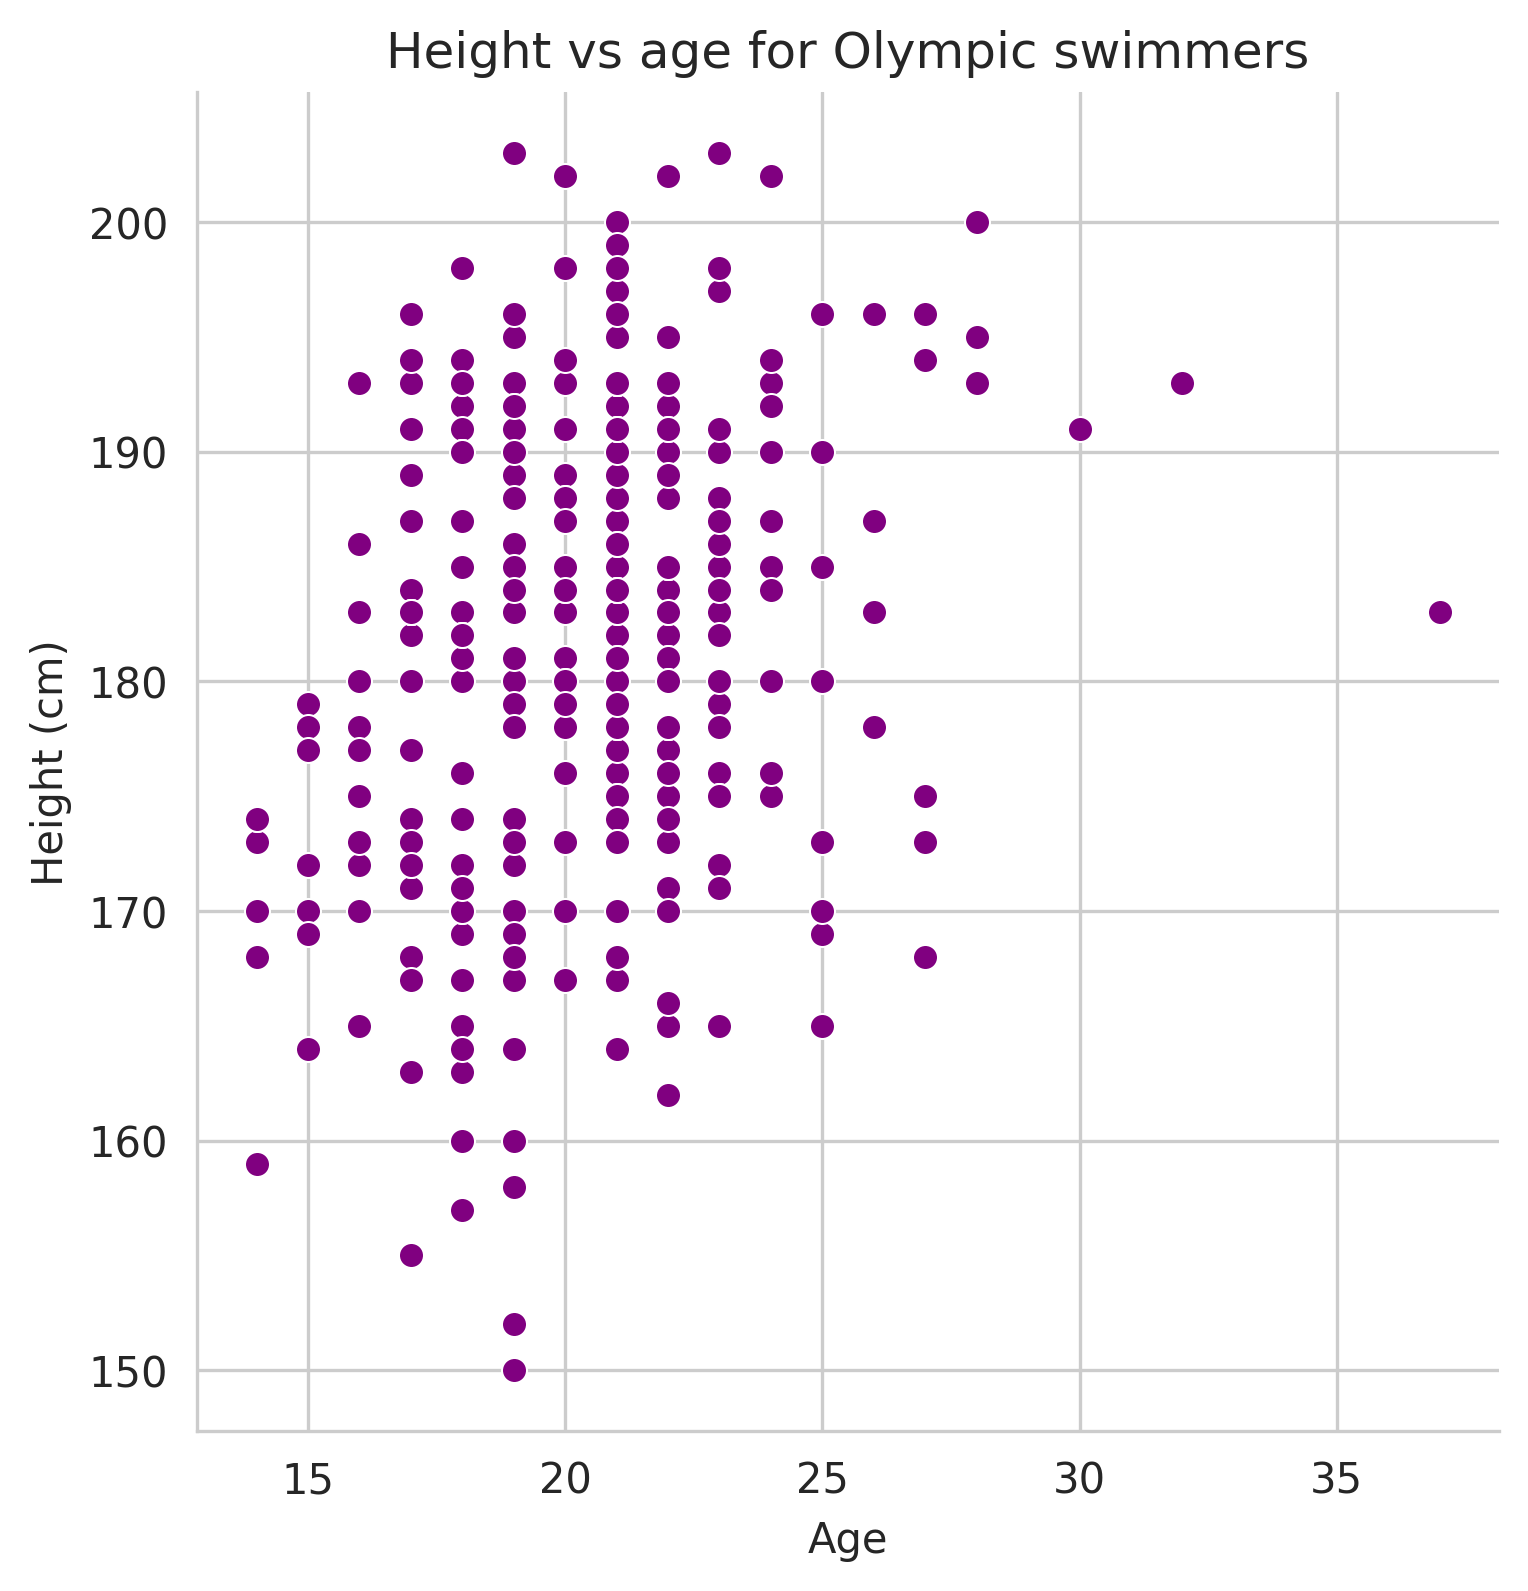

In [3]:
# named_color.py

sns.relplot(
    data=athletes, x="Age", y="Height (cm)", color="purple",
)
plt.title("Height vs age for Olympic swimmers")

or a hexadecimal color code:

Text(0.5, 1.0, 'Height vs age for Olympic swimmers')

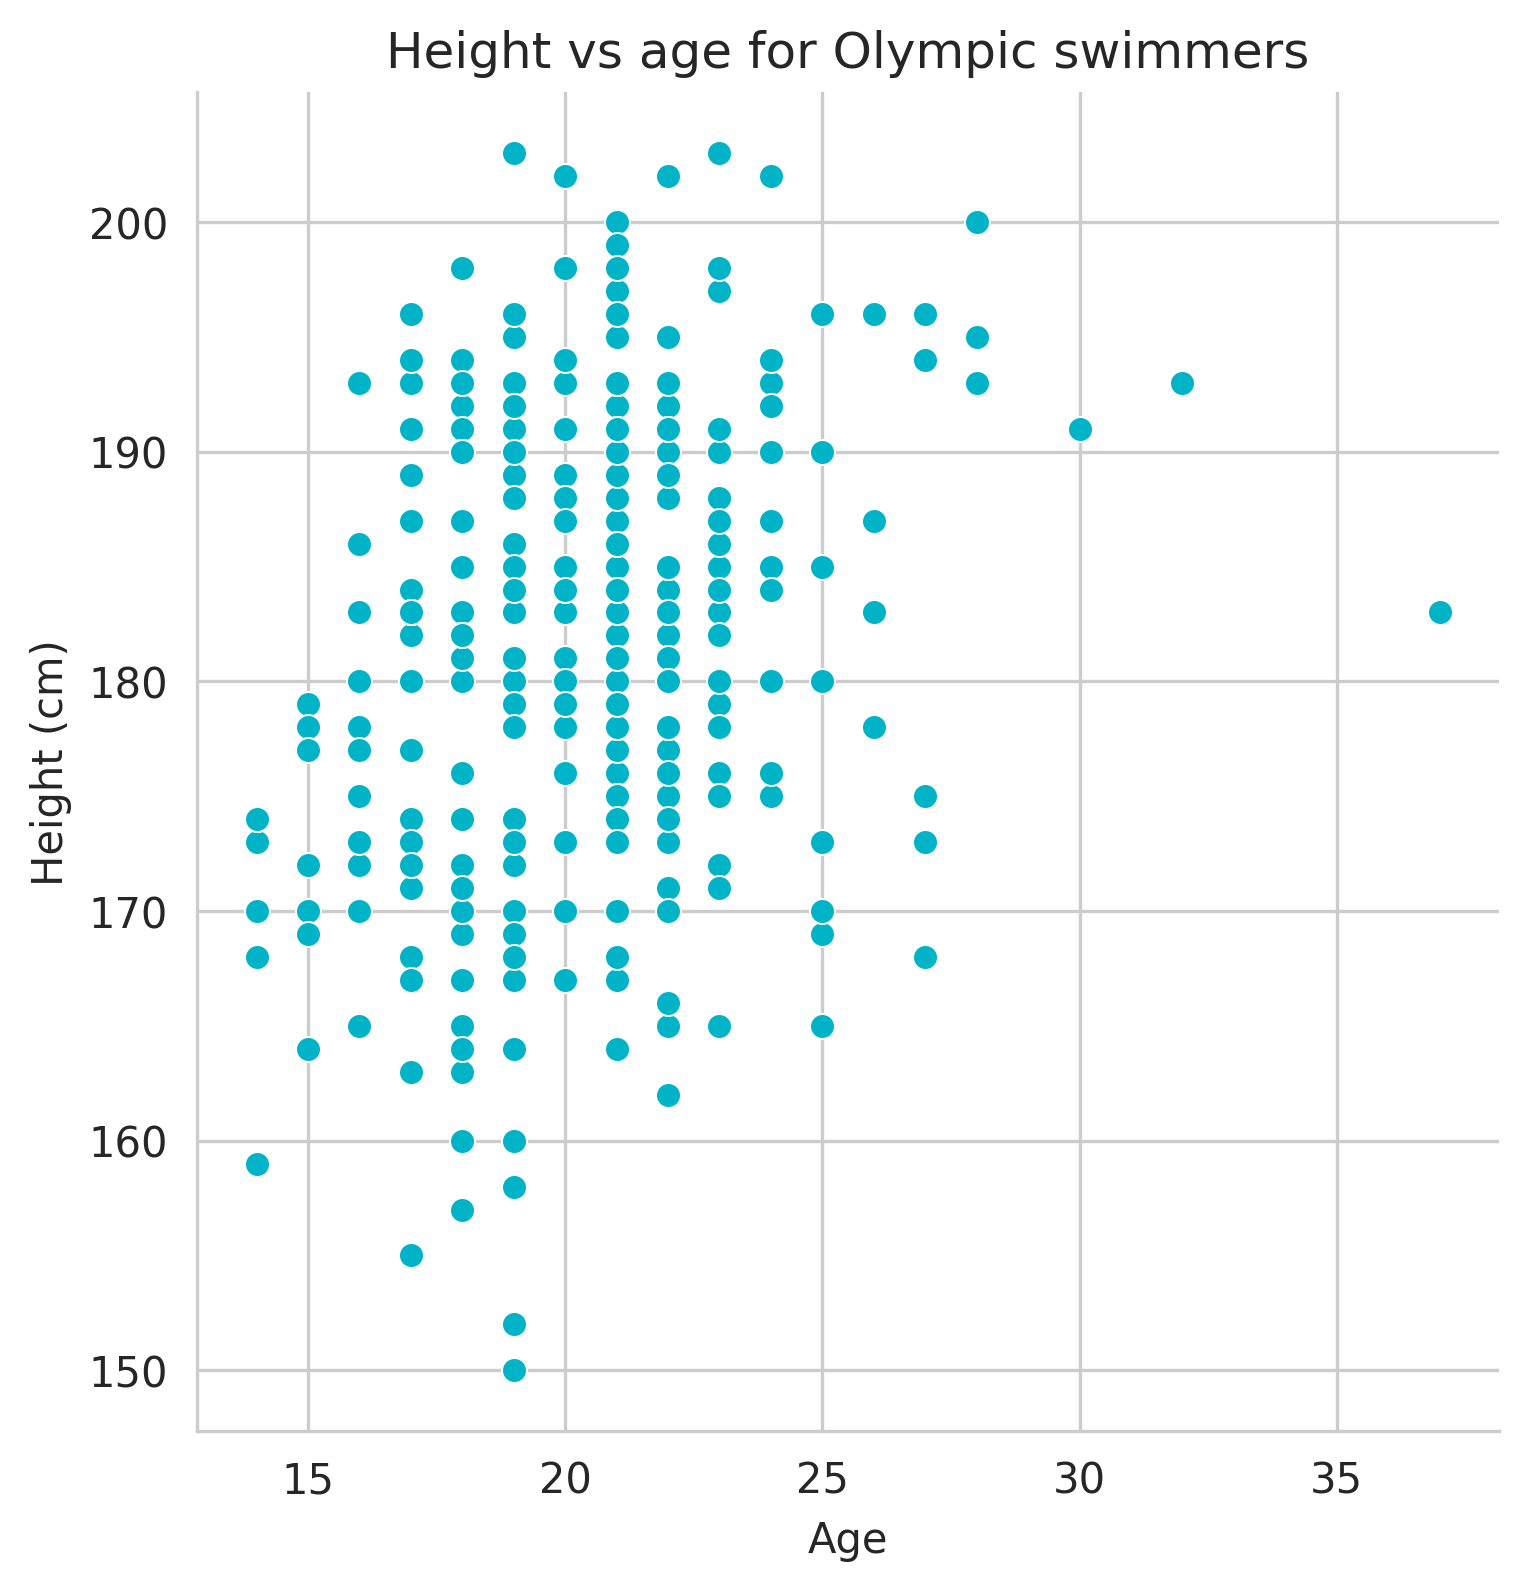

In [4]:
# hex_color.py

sns.relplot(
    data=athletes, x="Age", y="Height (cm)", color="#00b3c7",
)

plt.title("Height vs age for Olympic swimmers")

or a tuple of values between 0 and 1 representing red, green and blue components:

Text(0.5, 1.0, 'Height vs age for Olympic swimmers')

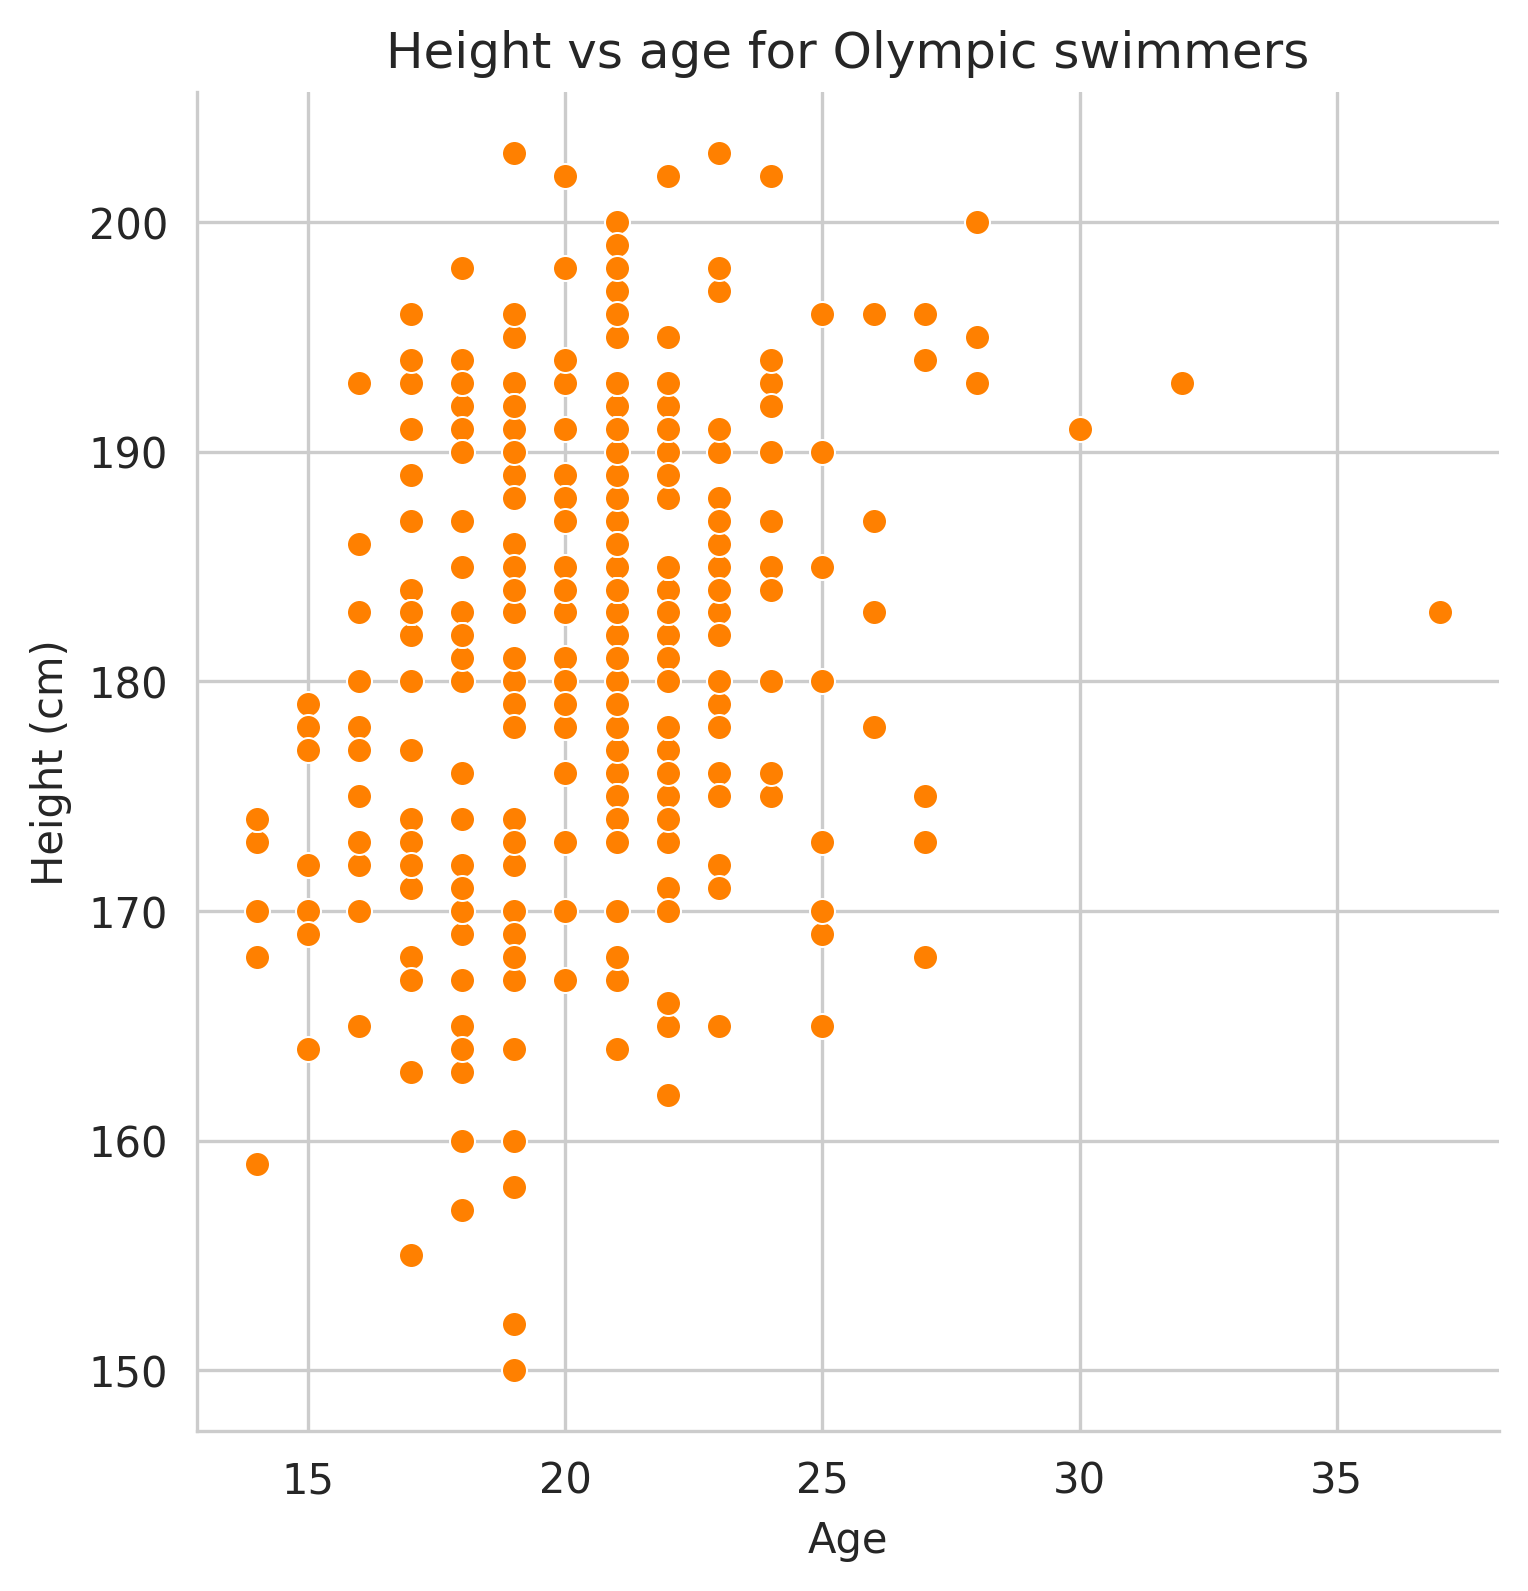

In [5]:
# rgb_color.py

sns.relplot(
    data=athletes, x="Age", y="Height (cm)", color=(1, 0.5, 0),
)

plt.title("Height vs age for Olympic swimmers")

You can easily find online tools to help you pick colors. A useful resource is a list of HTML color names:

https://en.wikipedia.org/wiki/Web_colors#HTML_color_names

## Working with palettes

For single color examples like the ones above, the choice of color doesn't play a huge role in the readability of the chart. As long as we avoid picking colors that are too low contrast to be seen easily:

Text(0.5, 1.0, 'Height vs age for Olympic swimmers')

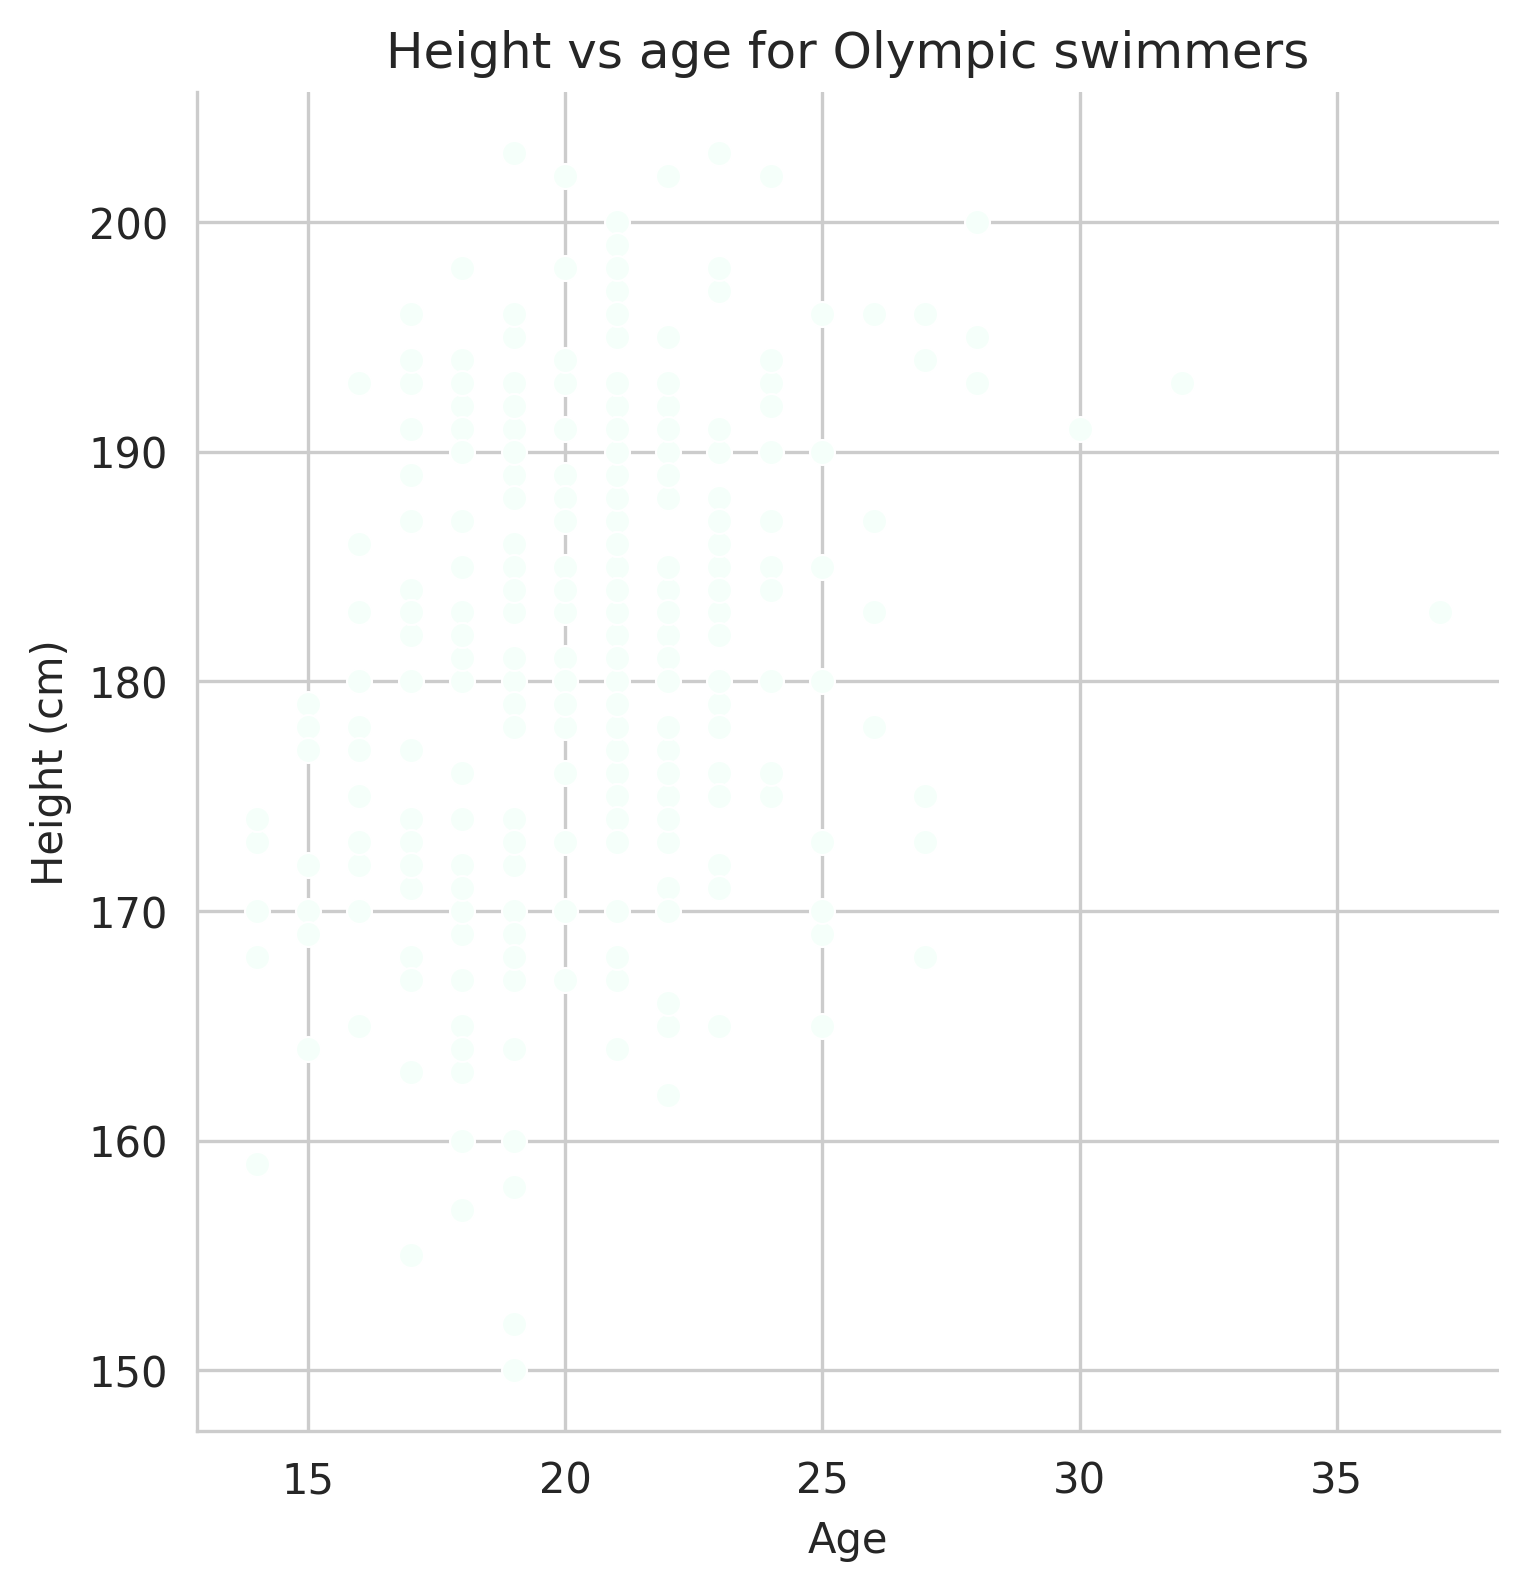

In [6]:
sns.relplot(
    data=athletes, x="Age", y="Height (cm)", color="mintcream",  # too similar to white!
)
plt.title("Height vs age for Olympic swimmers")

we cannot go far wrong. In fact, many simple charts look great without any use of color at all:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

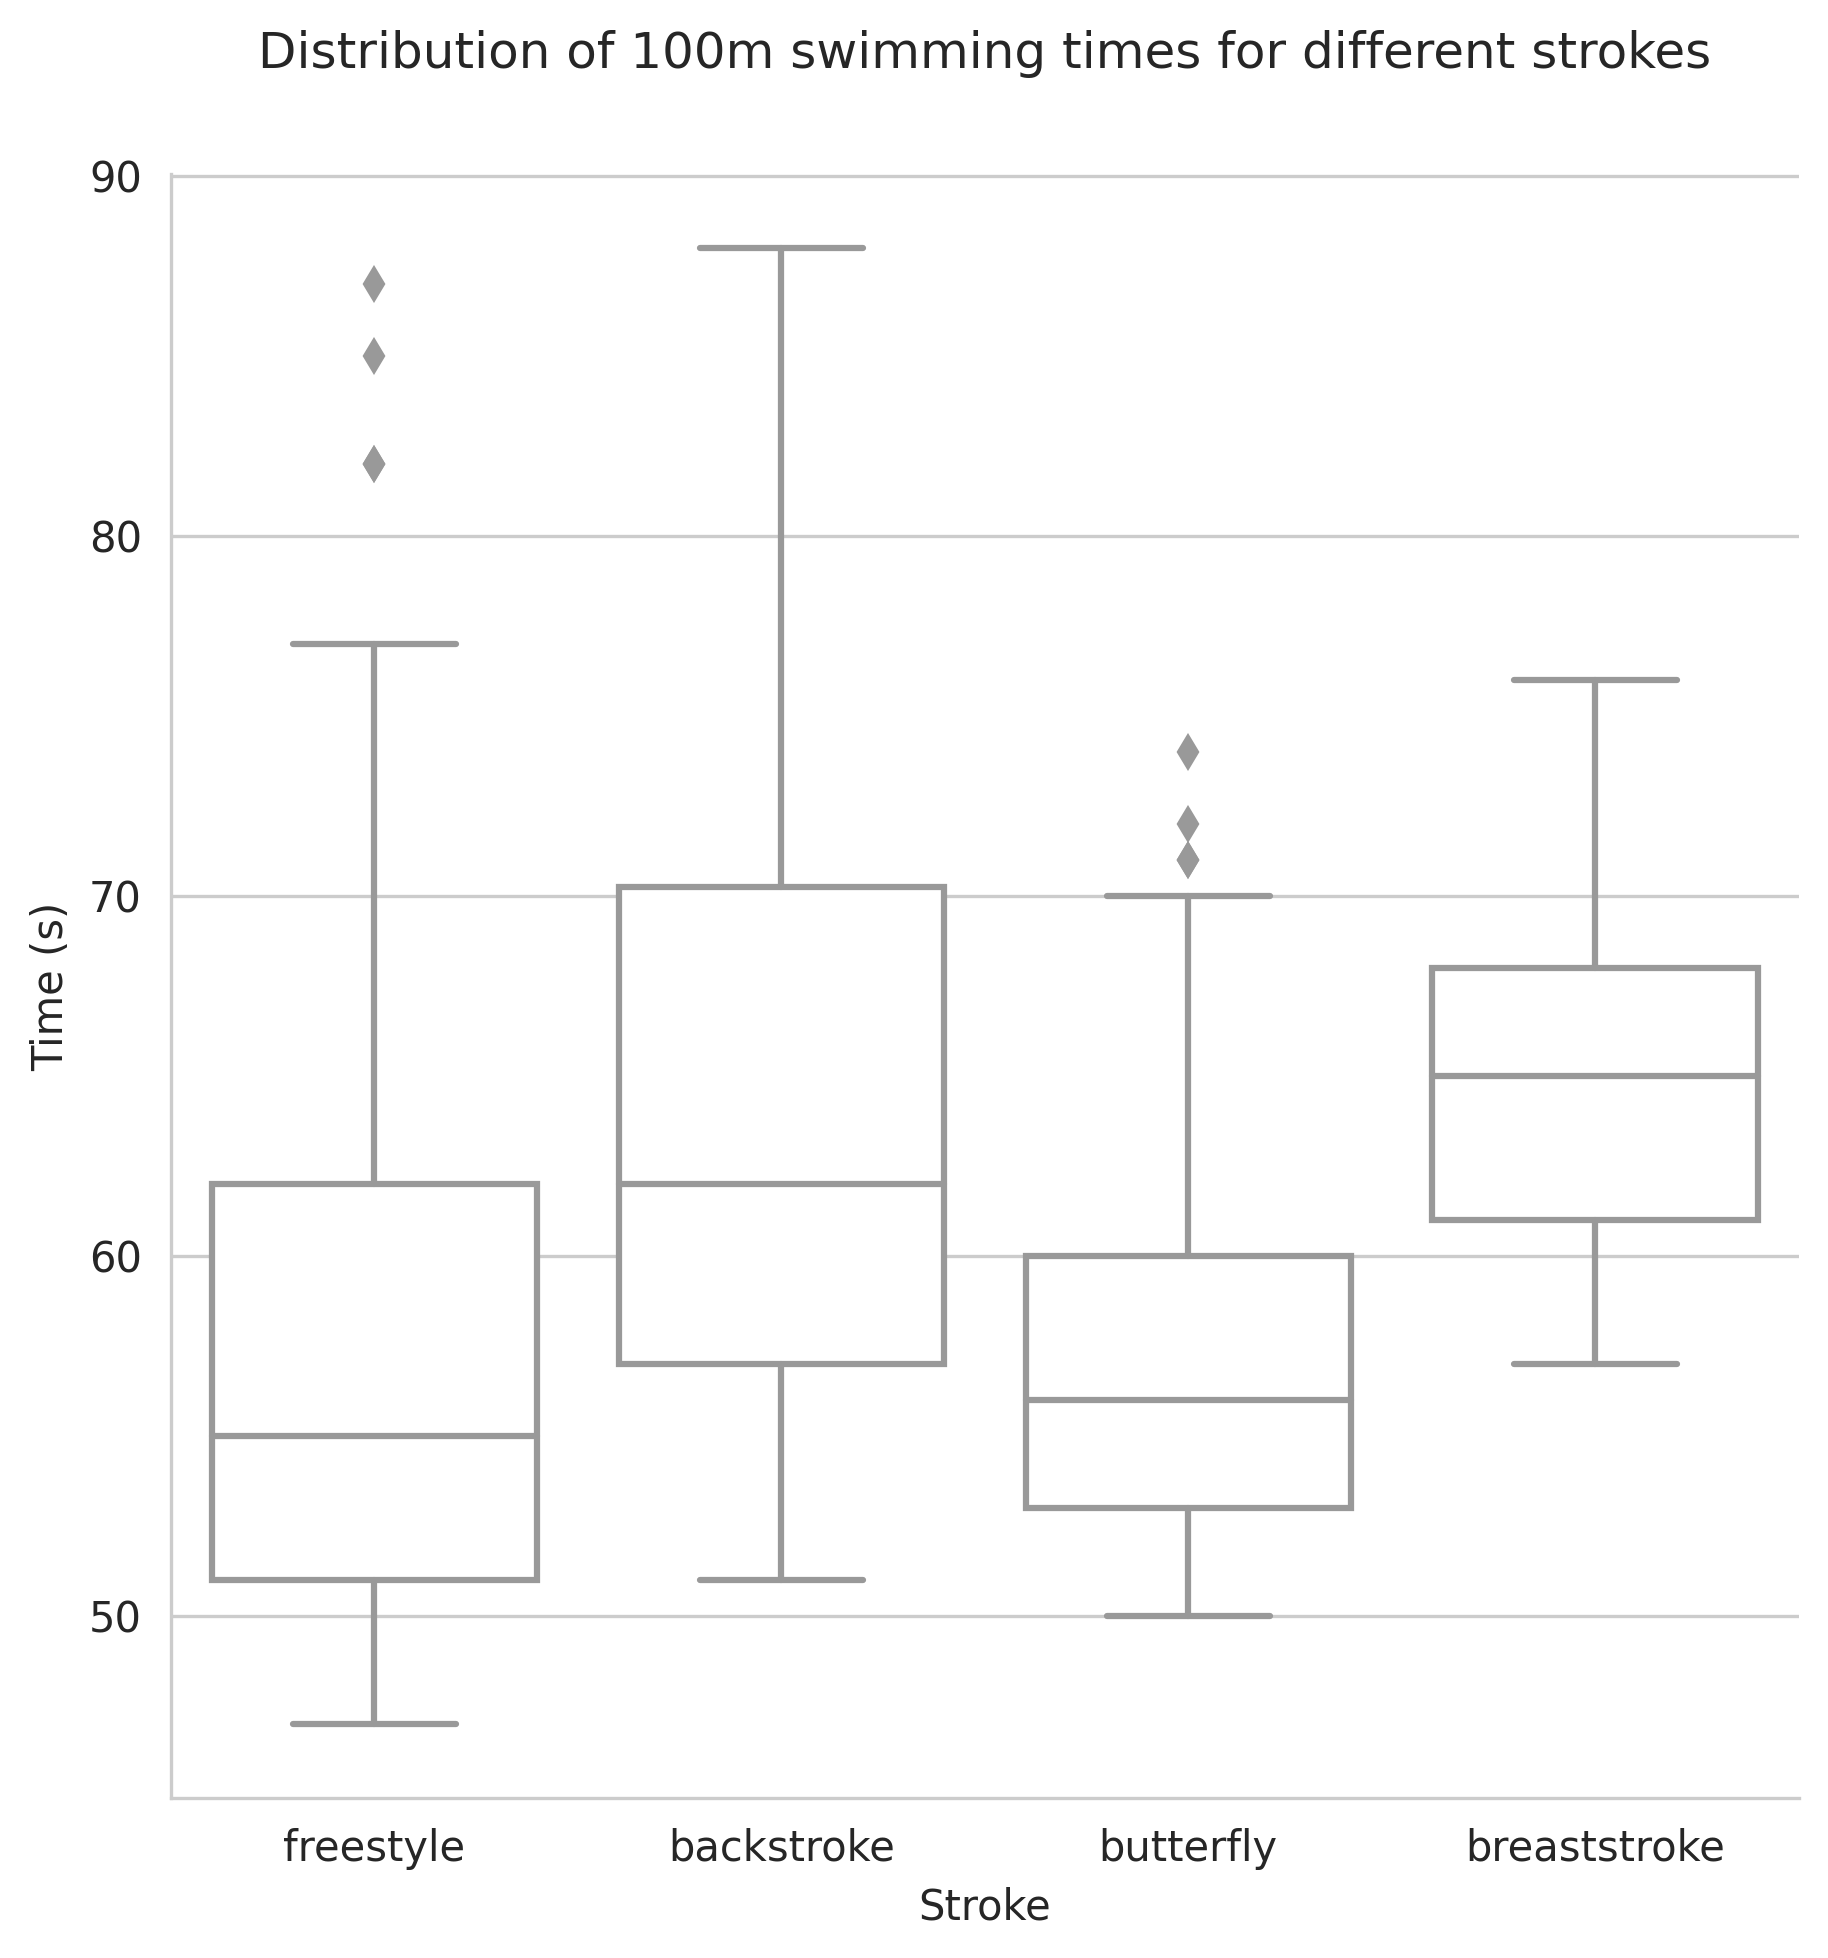

In [7]:
# grey_chart.py

sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    color="white",
    height=6,
)
plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

However, most of the time we will be using color to represent something in our charts - either a numerical variable, or a category. Whenever we are working with more than one color, we are dealing with a *palette*.

## Palettes for sequential data

To change the color scheme for most plots, we use the `palette` argument. There are many different ways to use this argument, but for now the easiest is to pass in the name of an existing matplotlib palette. The matplotlib palettes are divided into different types; for numerical data like we have here, we need a *sequential* palette. 

For convenience, here's a figure showing the most useful sequential palettes - these are the ones where higher values map to more saturated colors, which tend to be easiest to interpret:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1499.5, 2999.5, -0.5)

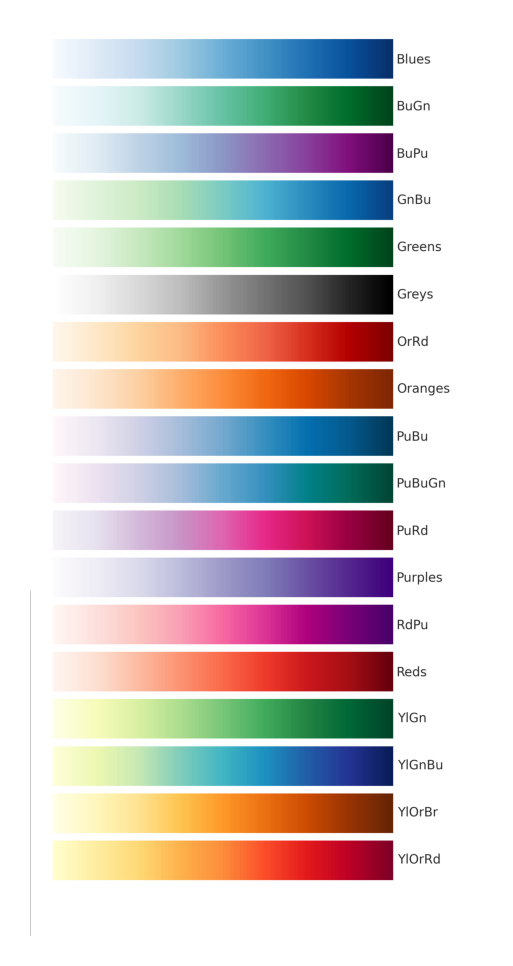

In [8]:
fig, ax = plt.subplots()
from scipy import ndimage

i = plt.imread("colormaps_sequential_1.png")
plt.imshow(ndimage.rotate(i, -90))
ax.axis("off")

Let's take our plot of age versus height, and use color to represent the athlete weight:

Text(0.5, 1.0, 'Age vs height for Olympic swimmers')

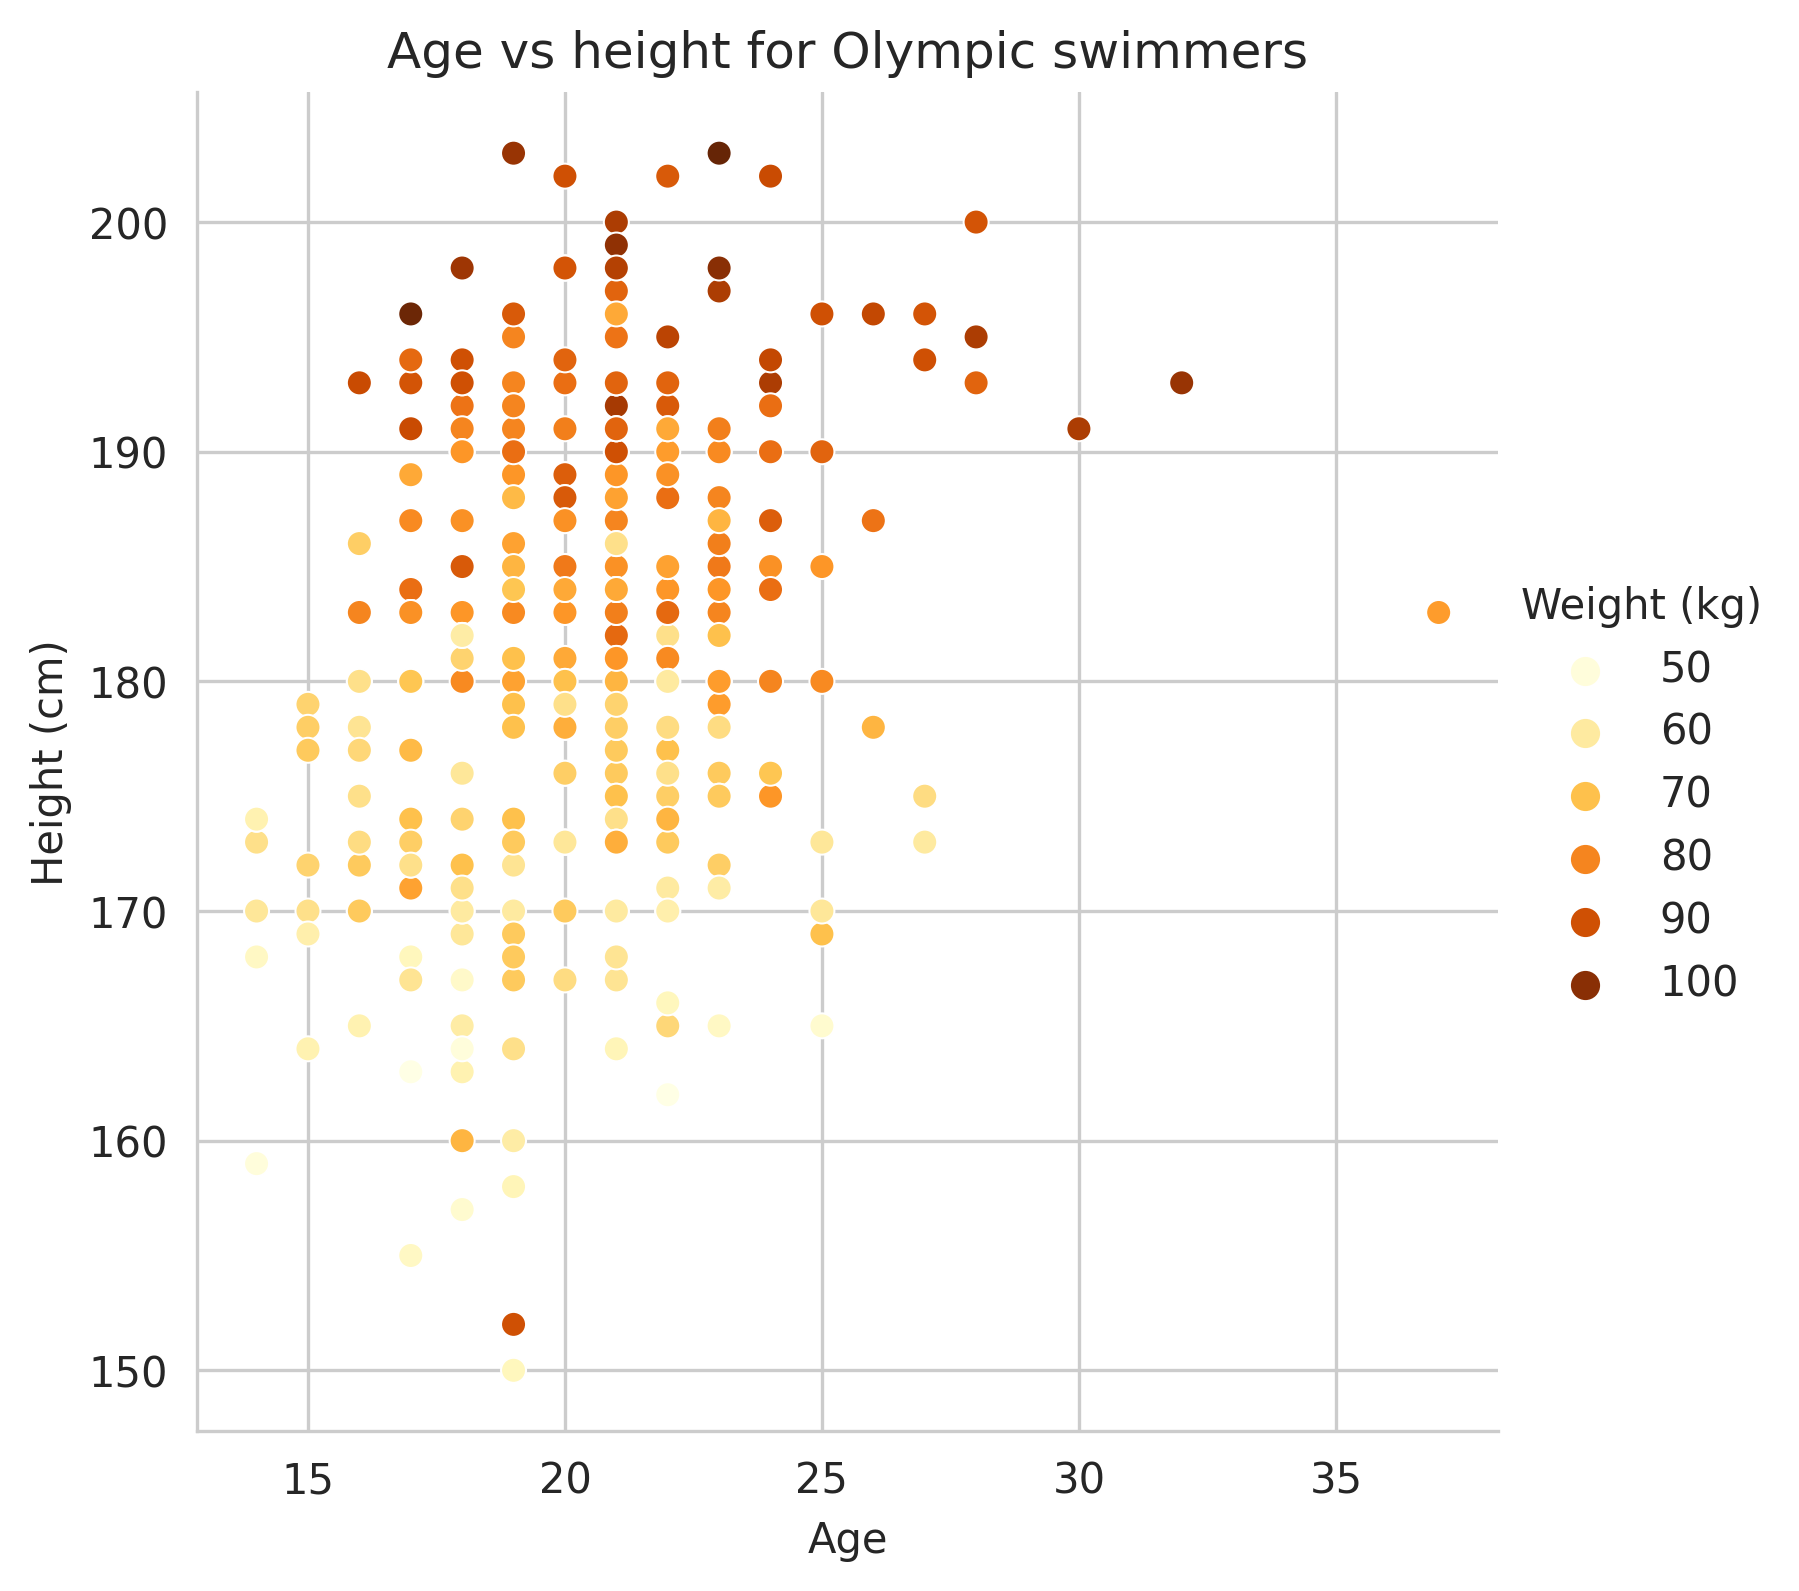

In [9]:
# sequential_palette.py

sns.relplot(
    data=athletes, x="Age", y="Height (cm)", hue="Weight (kg)", palette="YlOrBr",
)
plt.title("Age vs height for Olympic swimmers")

It's often tempting to use one of the various "rainbow" palettes, as they produce very colorful charts:

Text(0.5, 1.0, 'Age vs height for Olympic swimmers')

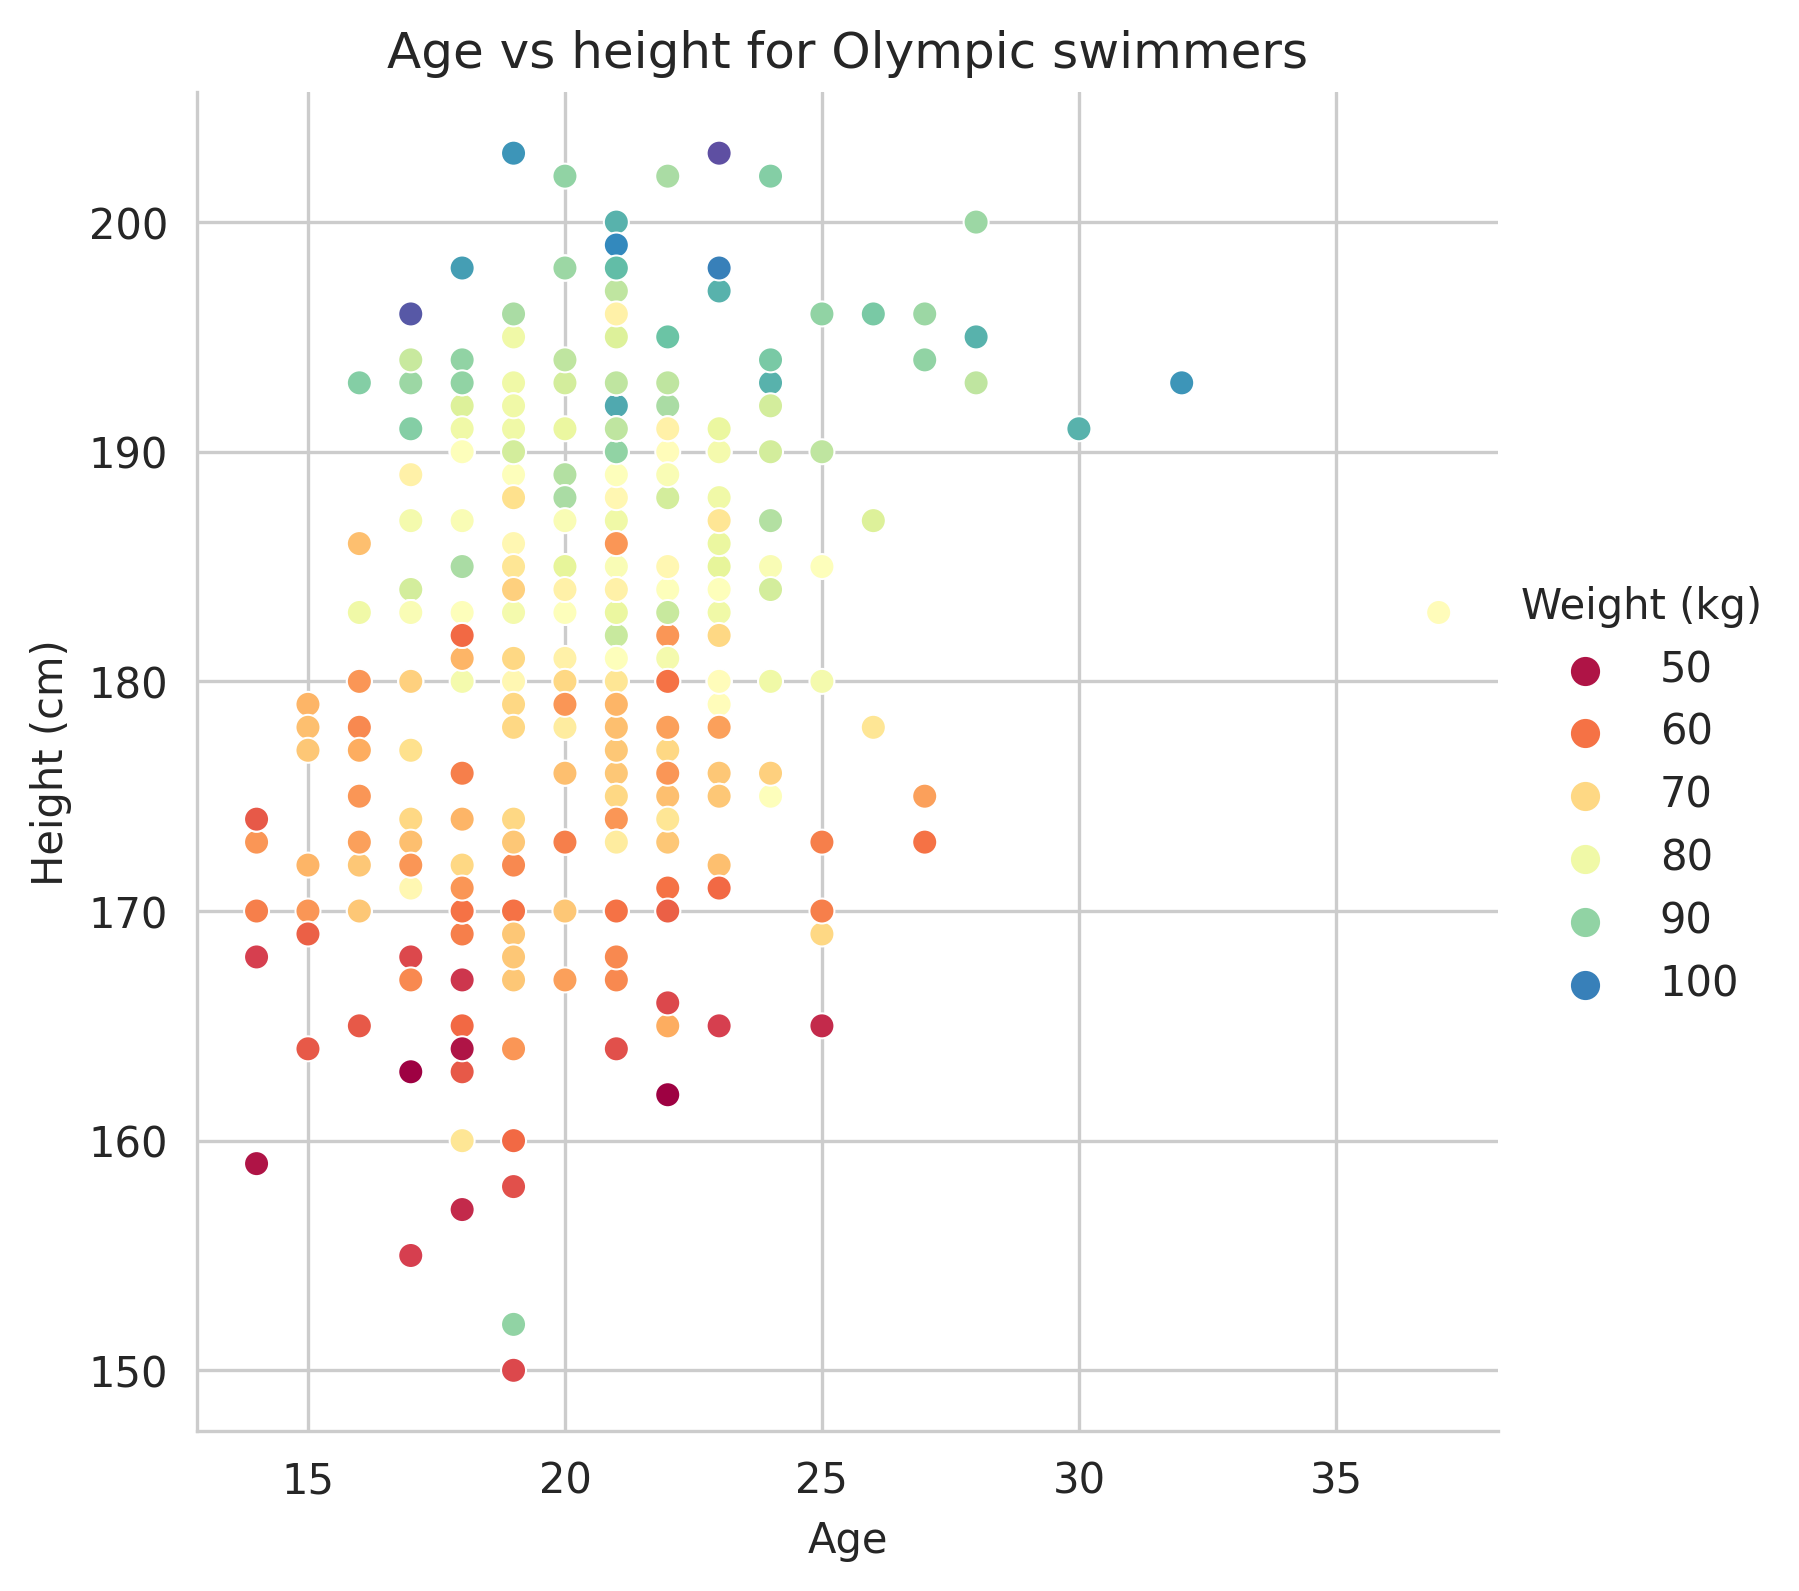

In [10]:
sns.relplot(
    data=athletes, x="Age", y="Height (cm)", hue="Weight (kg)", palette="Spectral",
)
plt.title("Age vs height for Olympic swimmers")

But these tend to make interpretation harder as they represent changes in value with different colors rather than different shades of the same color as in the sequential color maps. 

All of the named sequential palettes in the figure above can be reversed by adding `_r` onto the end of the name. So we can map higher values to lighter colors:

Text(0.5, 1.0, 'Athlete height vs time for 400m freestyle Olympic swimmers')

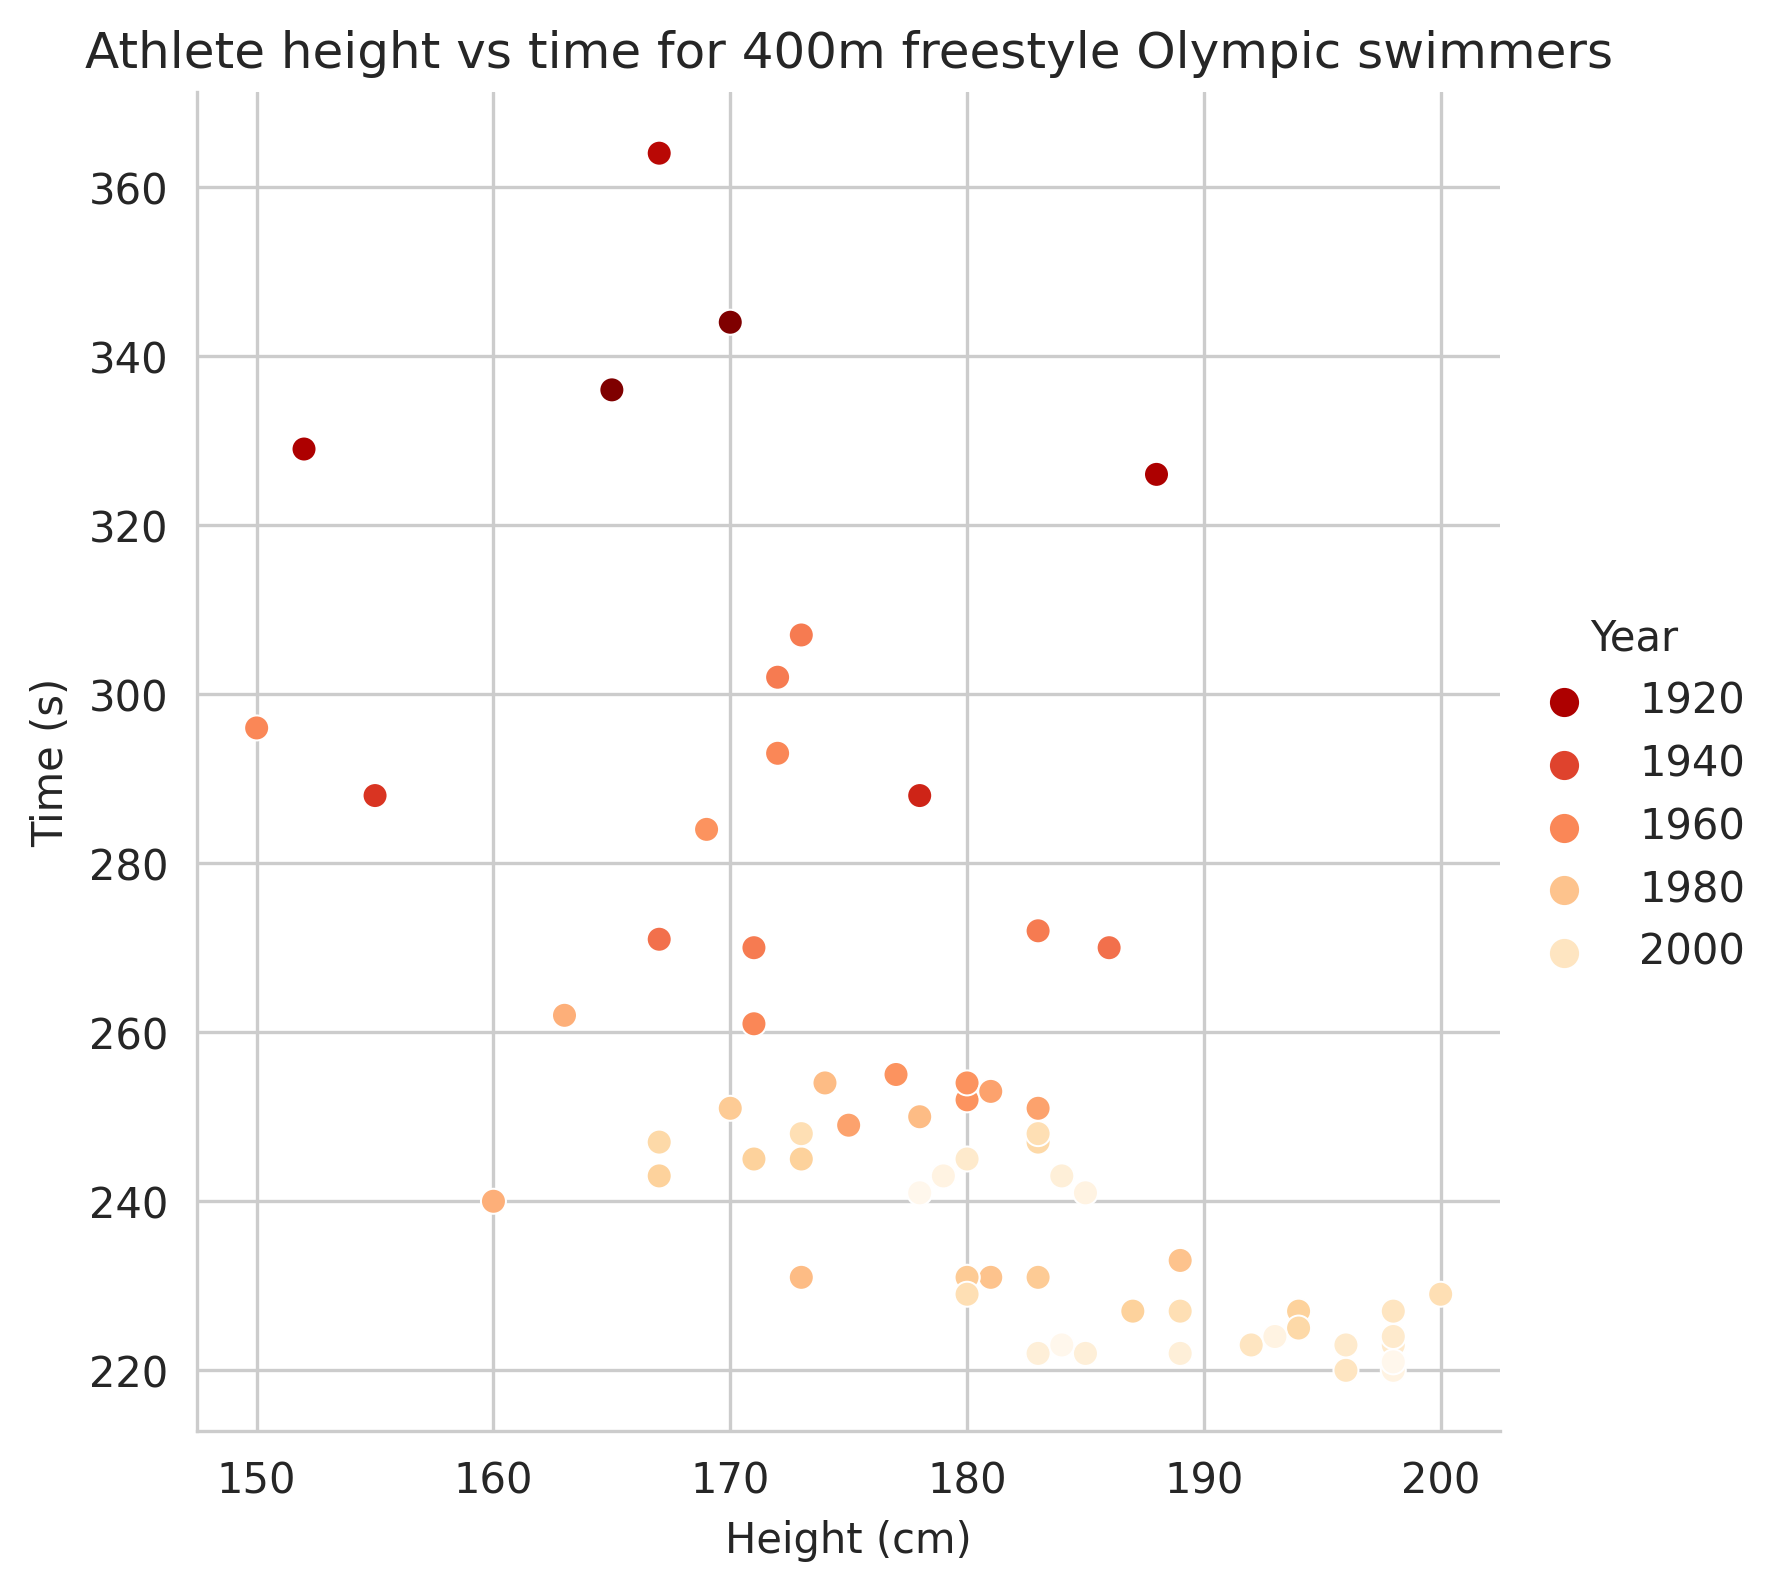

In [11]:
# reversed_palette.py

event = swimming[
    (swimming["Distance (m)"] == 400) & (swimming["Stroke"] == "freestyle")
]

sns.relplot(
    data=event, x="Height (cm)", y="Time (s)", hue="Year", palette="OrRd_r",
)
plt.title("Athlete height vs time for 400m freestyle Olympic swimmers")

Given the wide range of built in palettes, it's relatively rare that we have to reach for anything else. However, if we want a custom palette we can take a single color and create a palette using the `light_palette` or `dark_palette` functions. Confusingly, we need `light_palette` if we are starting with a dark color, and vice versa. So to build a palette starting with a purple color:

Text(0.5, 1.0, 'Age vs height for Olympic swimmers')

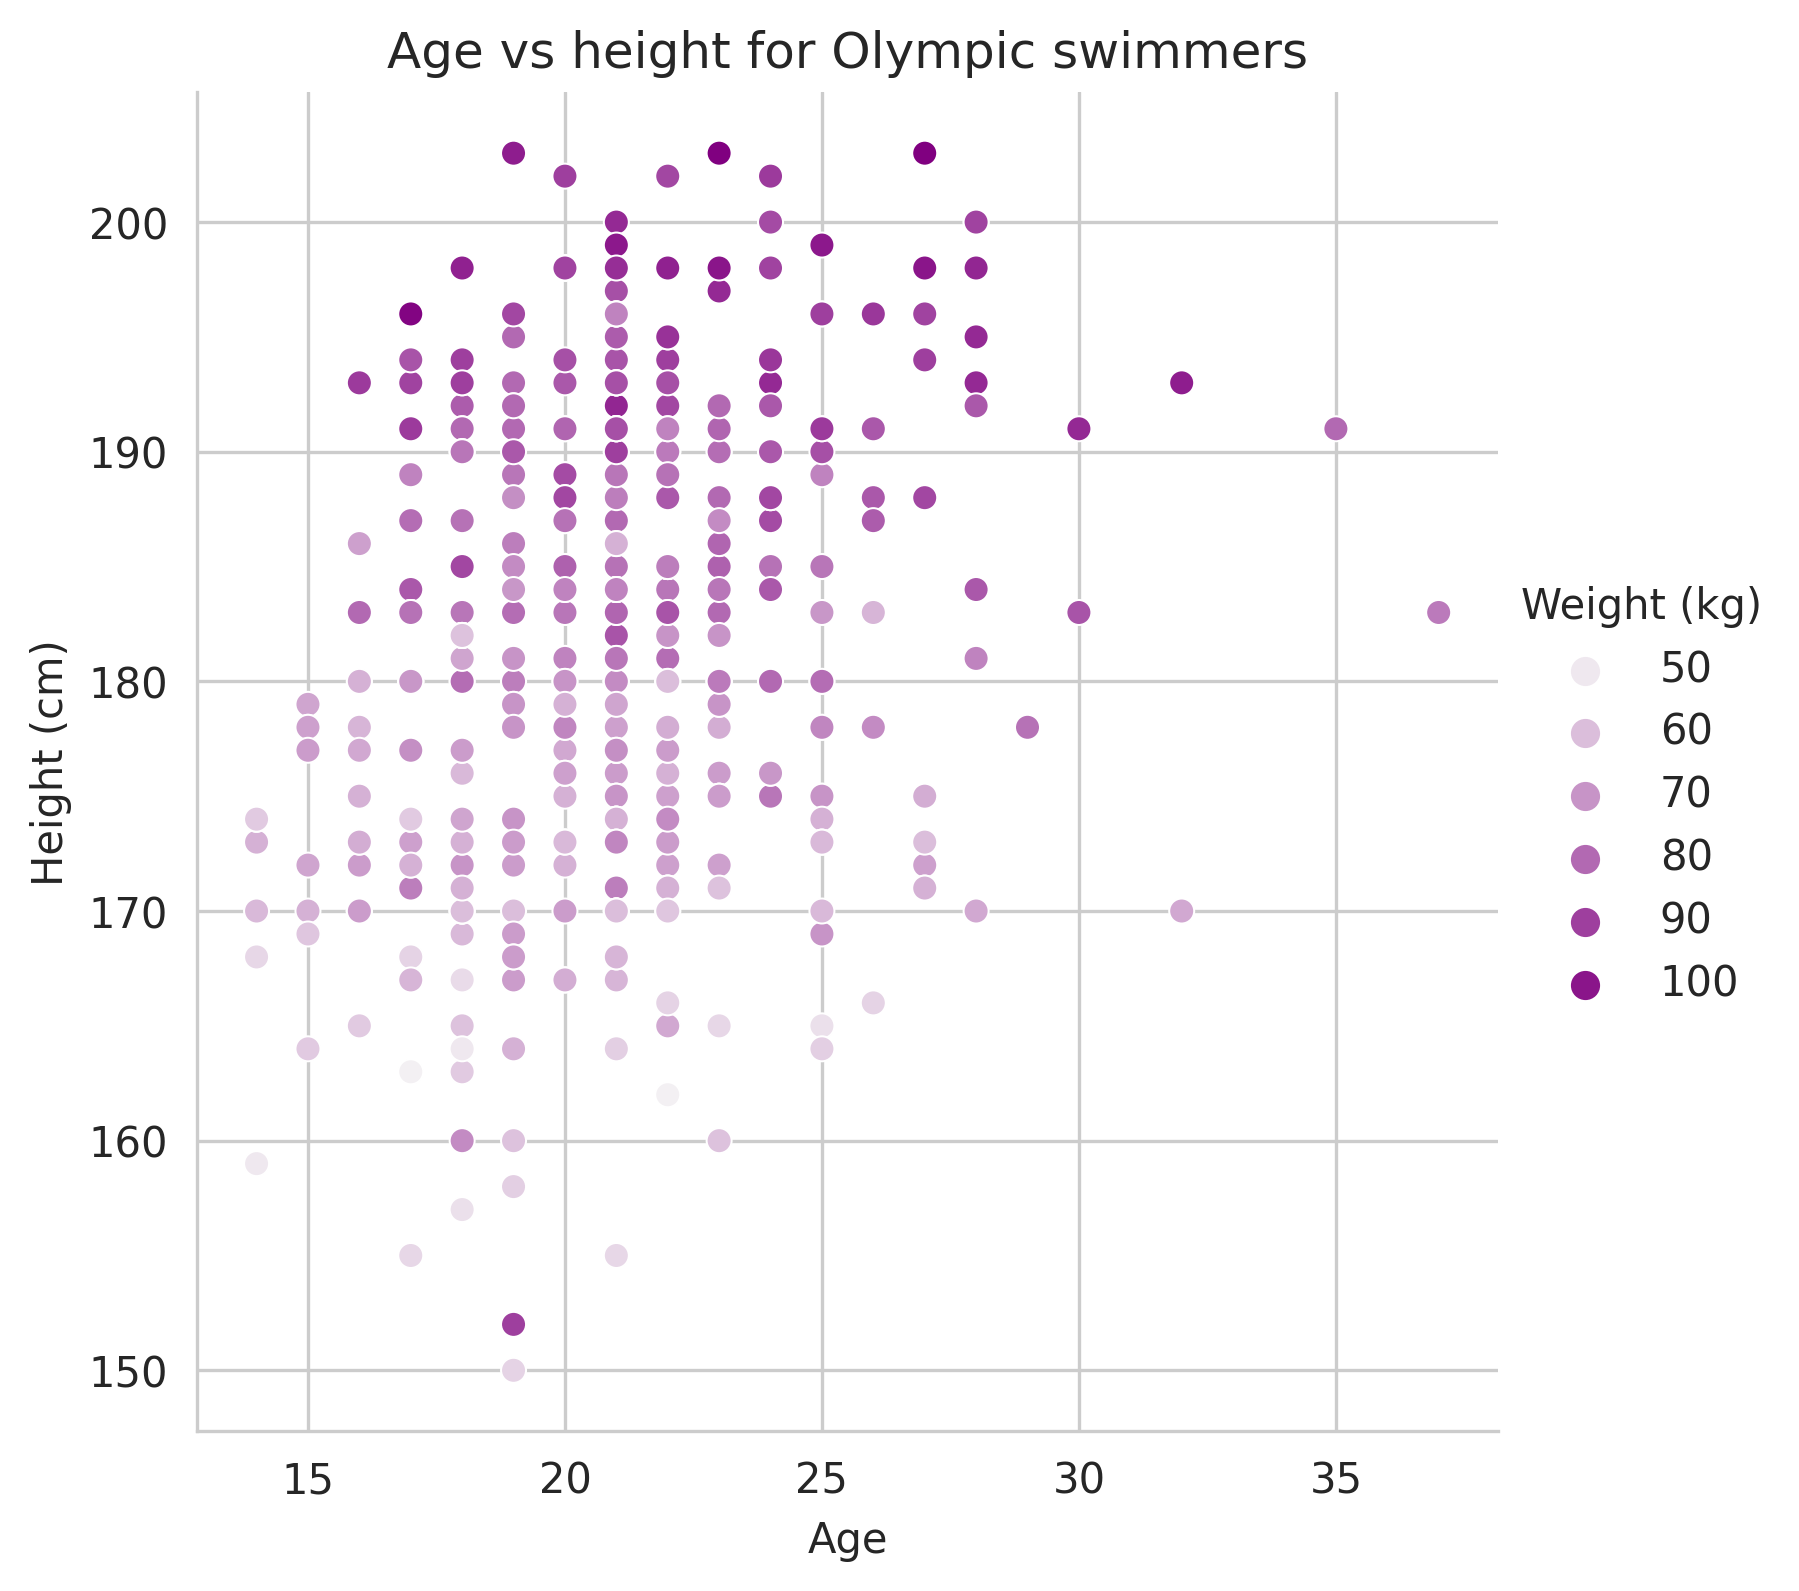

In [12]:
# custom_sequential_palette.py

sns.relplot(
    data=swimming,
    x="Age",
    y="Height (cm)",
    hue="Weight (kg)",
    palette=sns.light_palette("purple", as_cmap=True),
)

plt.title("Age vs height for Olympic swimmers")

## Palettes for categorical data

All of the palettes in the previous section have been sequential: i.e. similar values get mapped to similar colors. That's exactly what we want for numerical data, as it makes it possible to see patterns and trends. However, this is exactly what we **don't** want for categorical data. Consider our box plot from before:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

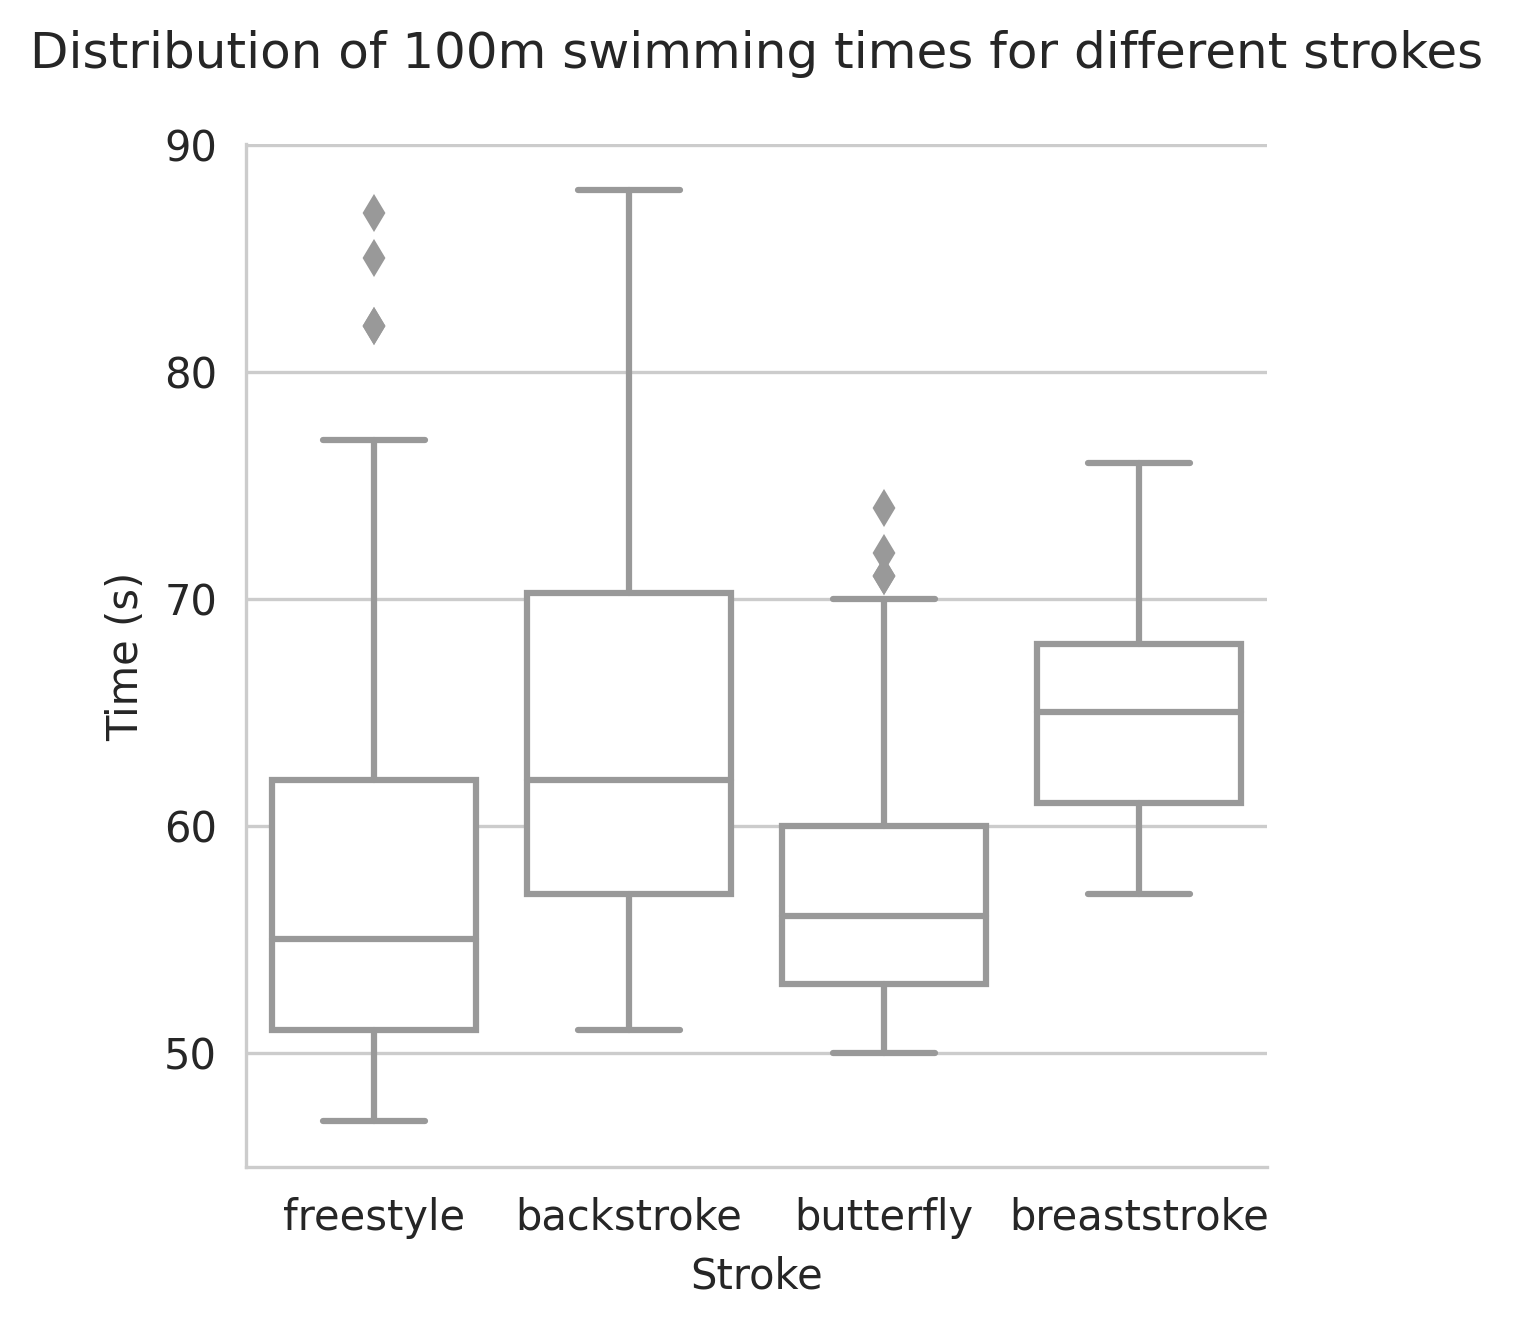

In [13]:
sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    color="white",
    height=4,
)
plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

and let's add some color:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

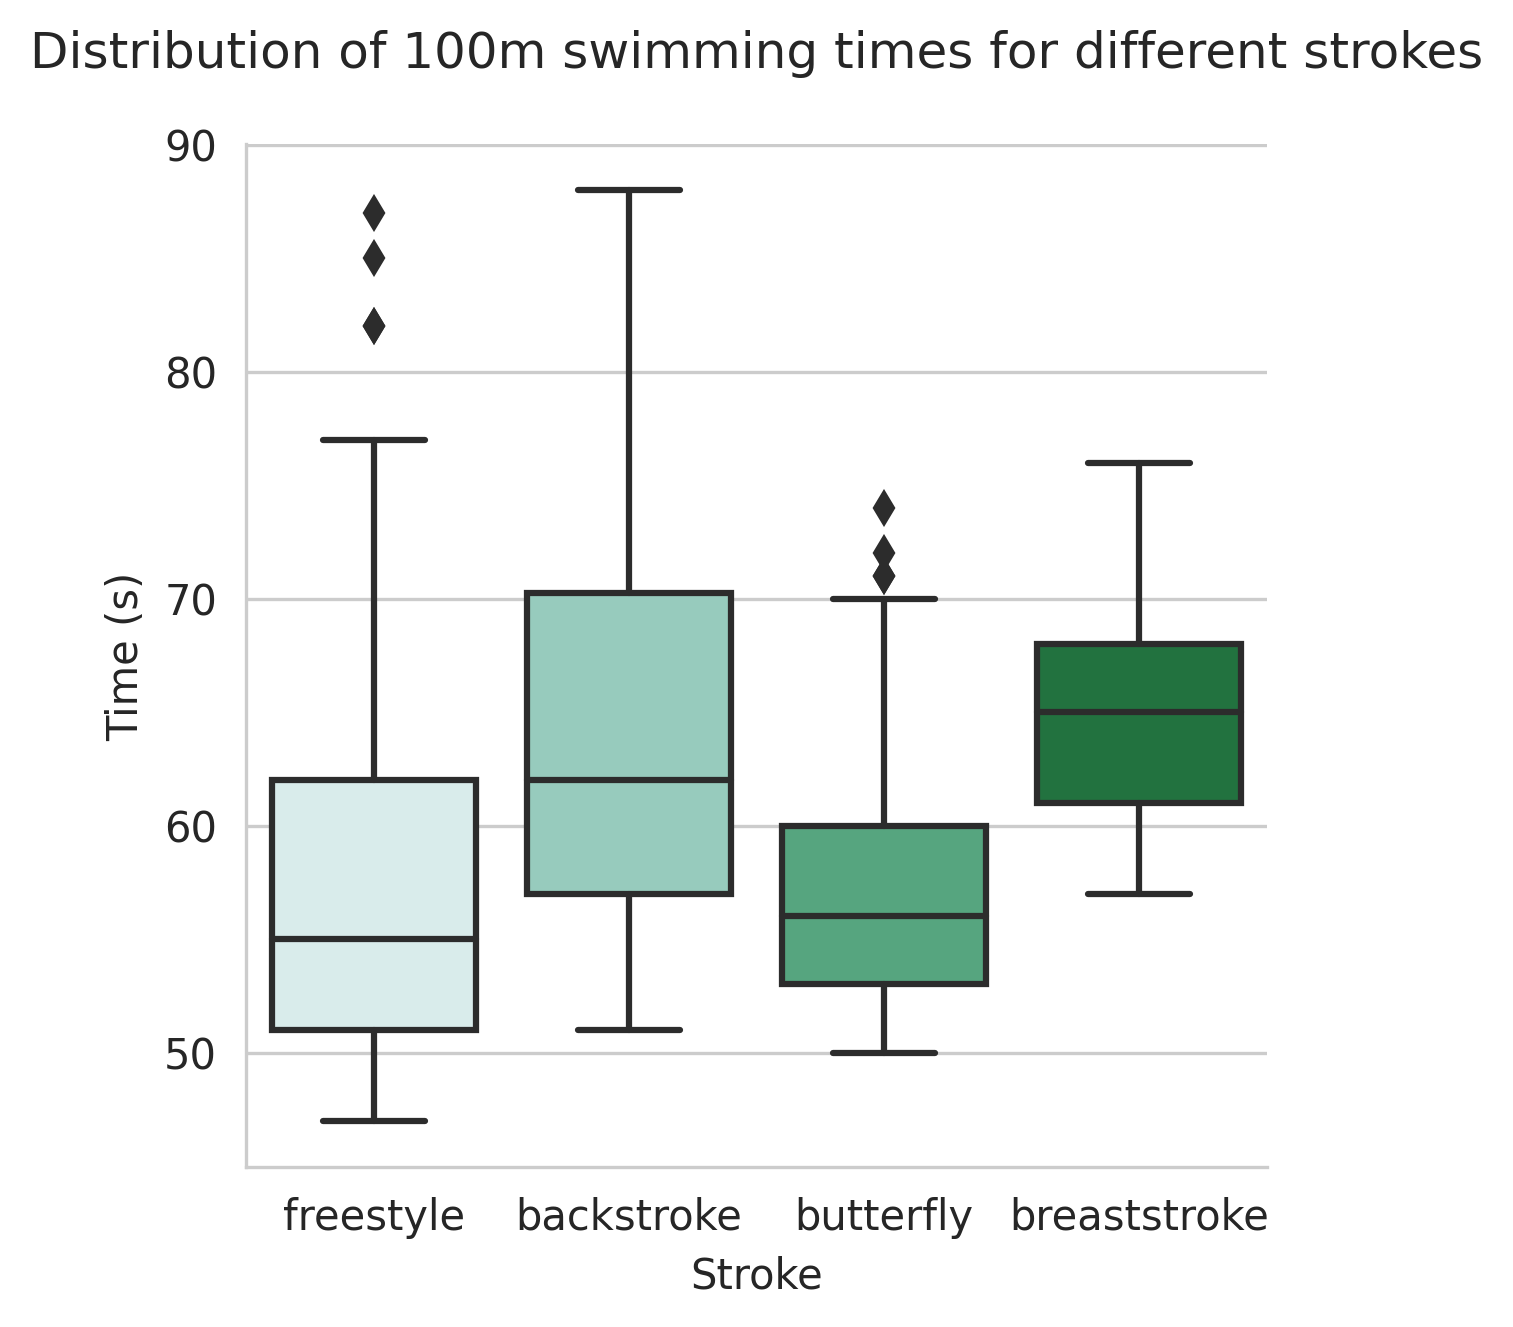

In [14]:
sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    palette="BuGn",
    height=4,
)
plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

This is certainly prettier to look at, but the problem is that the colors are now actively misleading. The fact that freestyle and backstroke are a similar color will trick our brains into thinking that they are similar in some way. In fact, the reason they have similar colors in this plot is that they happened to appear in that order in the dataset. 

For categories without a natural order, we want a *qualitative* palette. In seaborn we can choose from `Set1, Set2, Set3, Pastel1, Pastel2, Dark2` and `Accent`. All of these palettes have been designed to avoid having similar colors next to each other:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1499.5, 1499.5, -0.5)

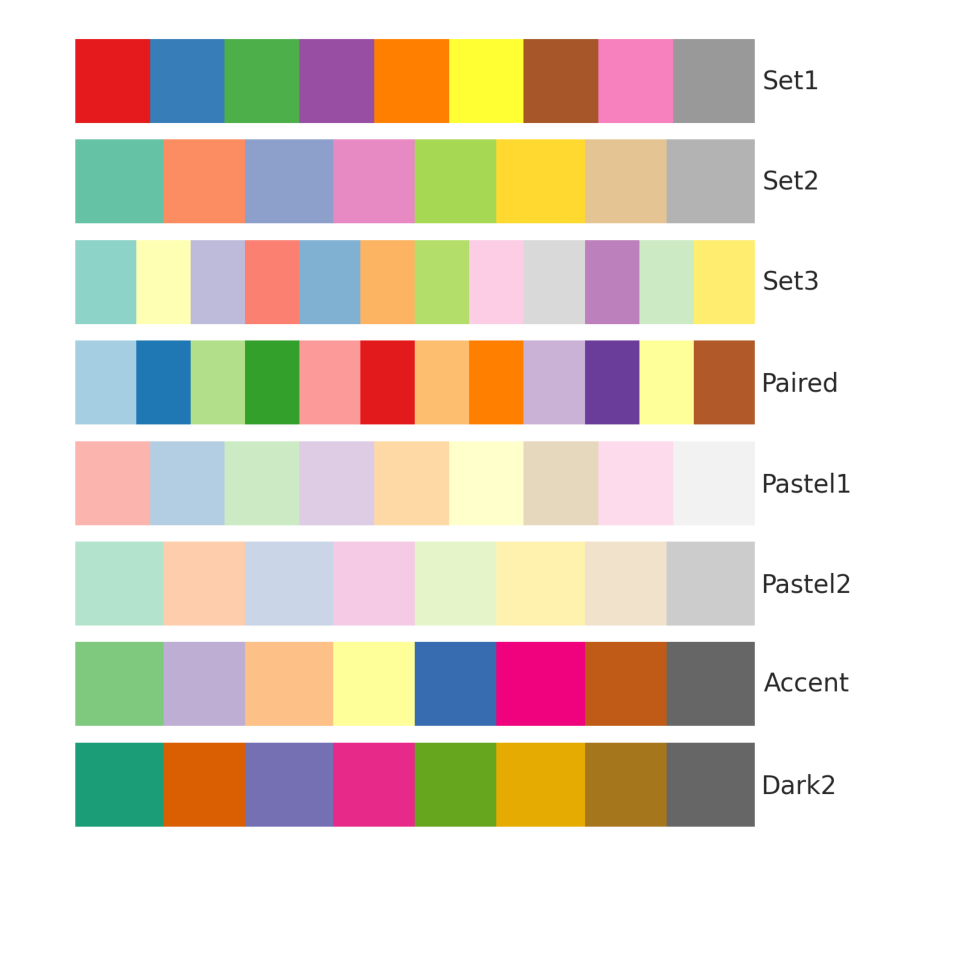

In [15]:
fig, ax = plt.subplots()
from scipy import ndimage

i = plt.imread("colormaps_categorical.png")
plt.imshow(ndimage.rotate(i, -90))
ax.axis("off")

and if we pick one for our box plot, it looks much better:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

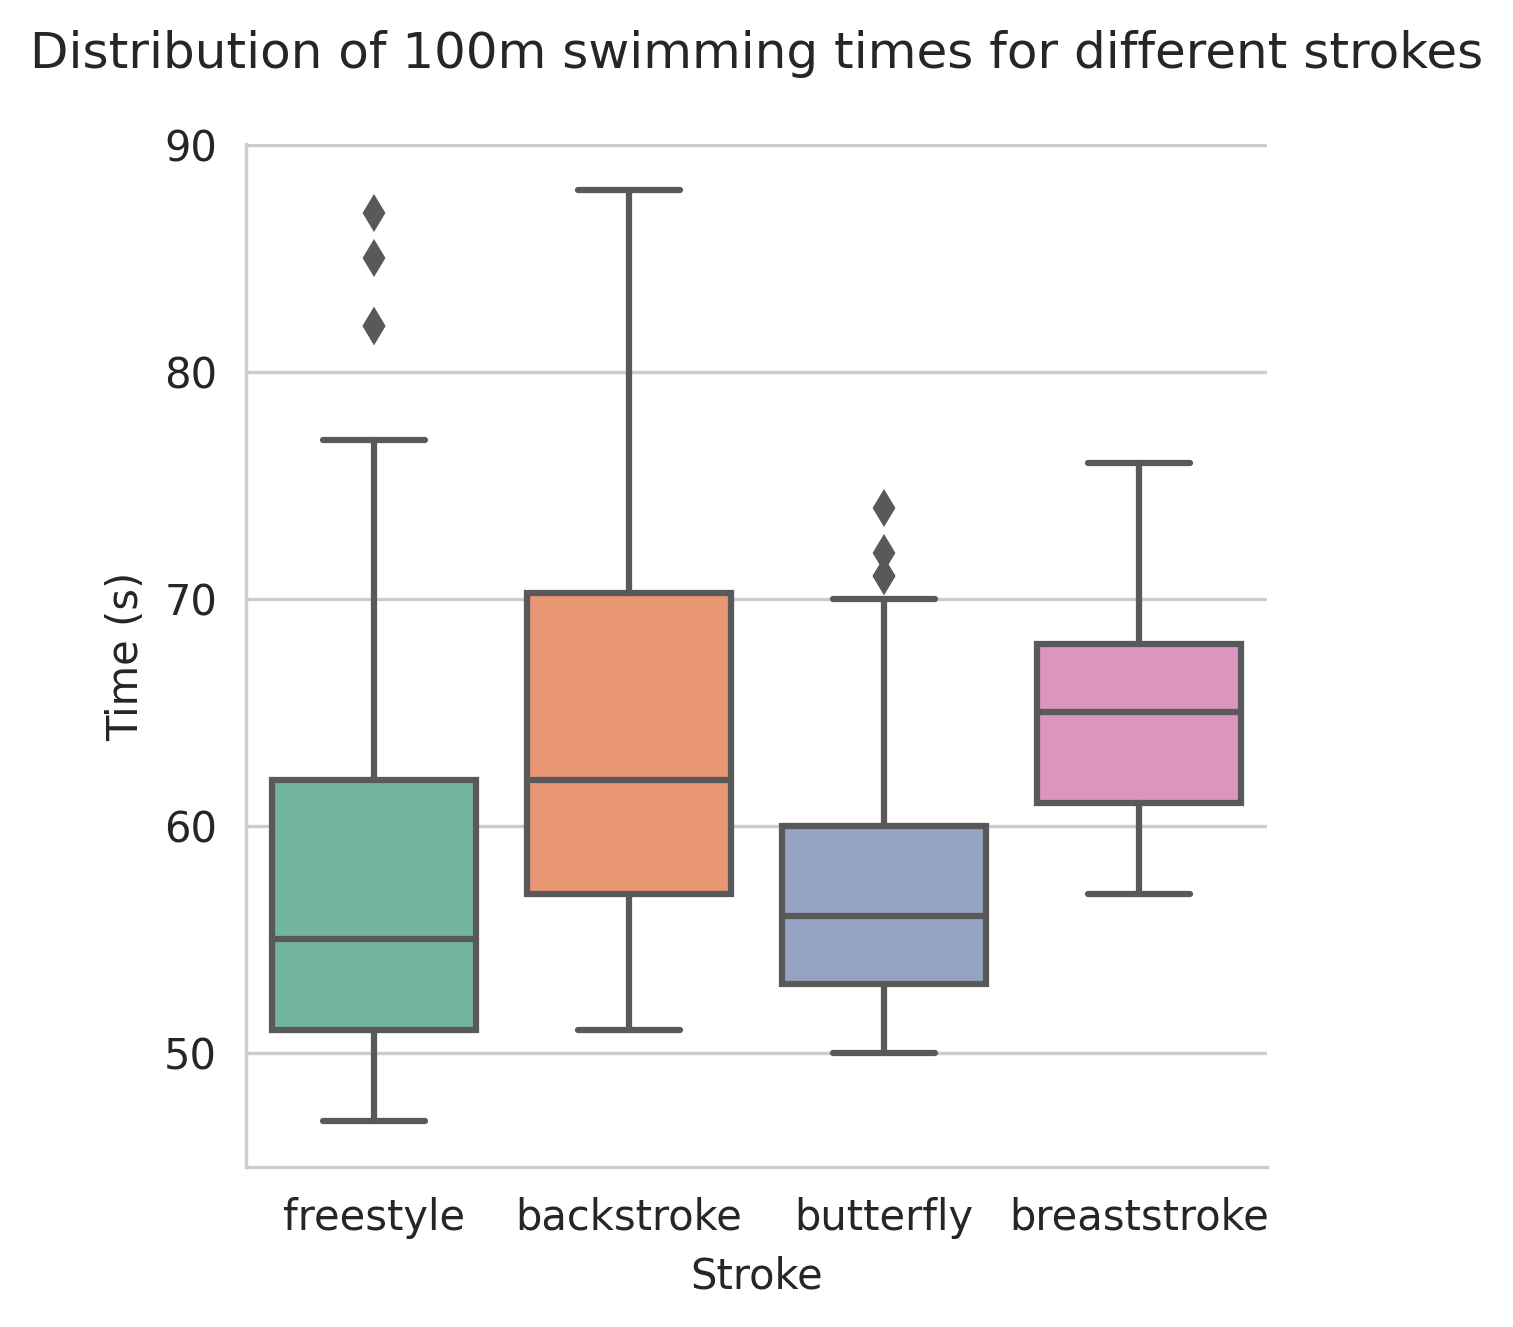

In [16]:
# categorical_palette.py

sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    palette="Set2",
    height=4,
)

plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

and will help us to avoid misinterpreting color. 

In the simple box plot above, the color doens't really add anything except to make the plot more attractive. However, as soon as we have multiple plots, color can play a much more important role. For example, let's turn this plot into a small multiple by drawing a separate chart for each year:

Text(0.5, 1.05, 'Distribution of 100m swimming times for each stroke in different Olympic years')

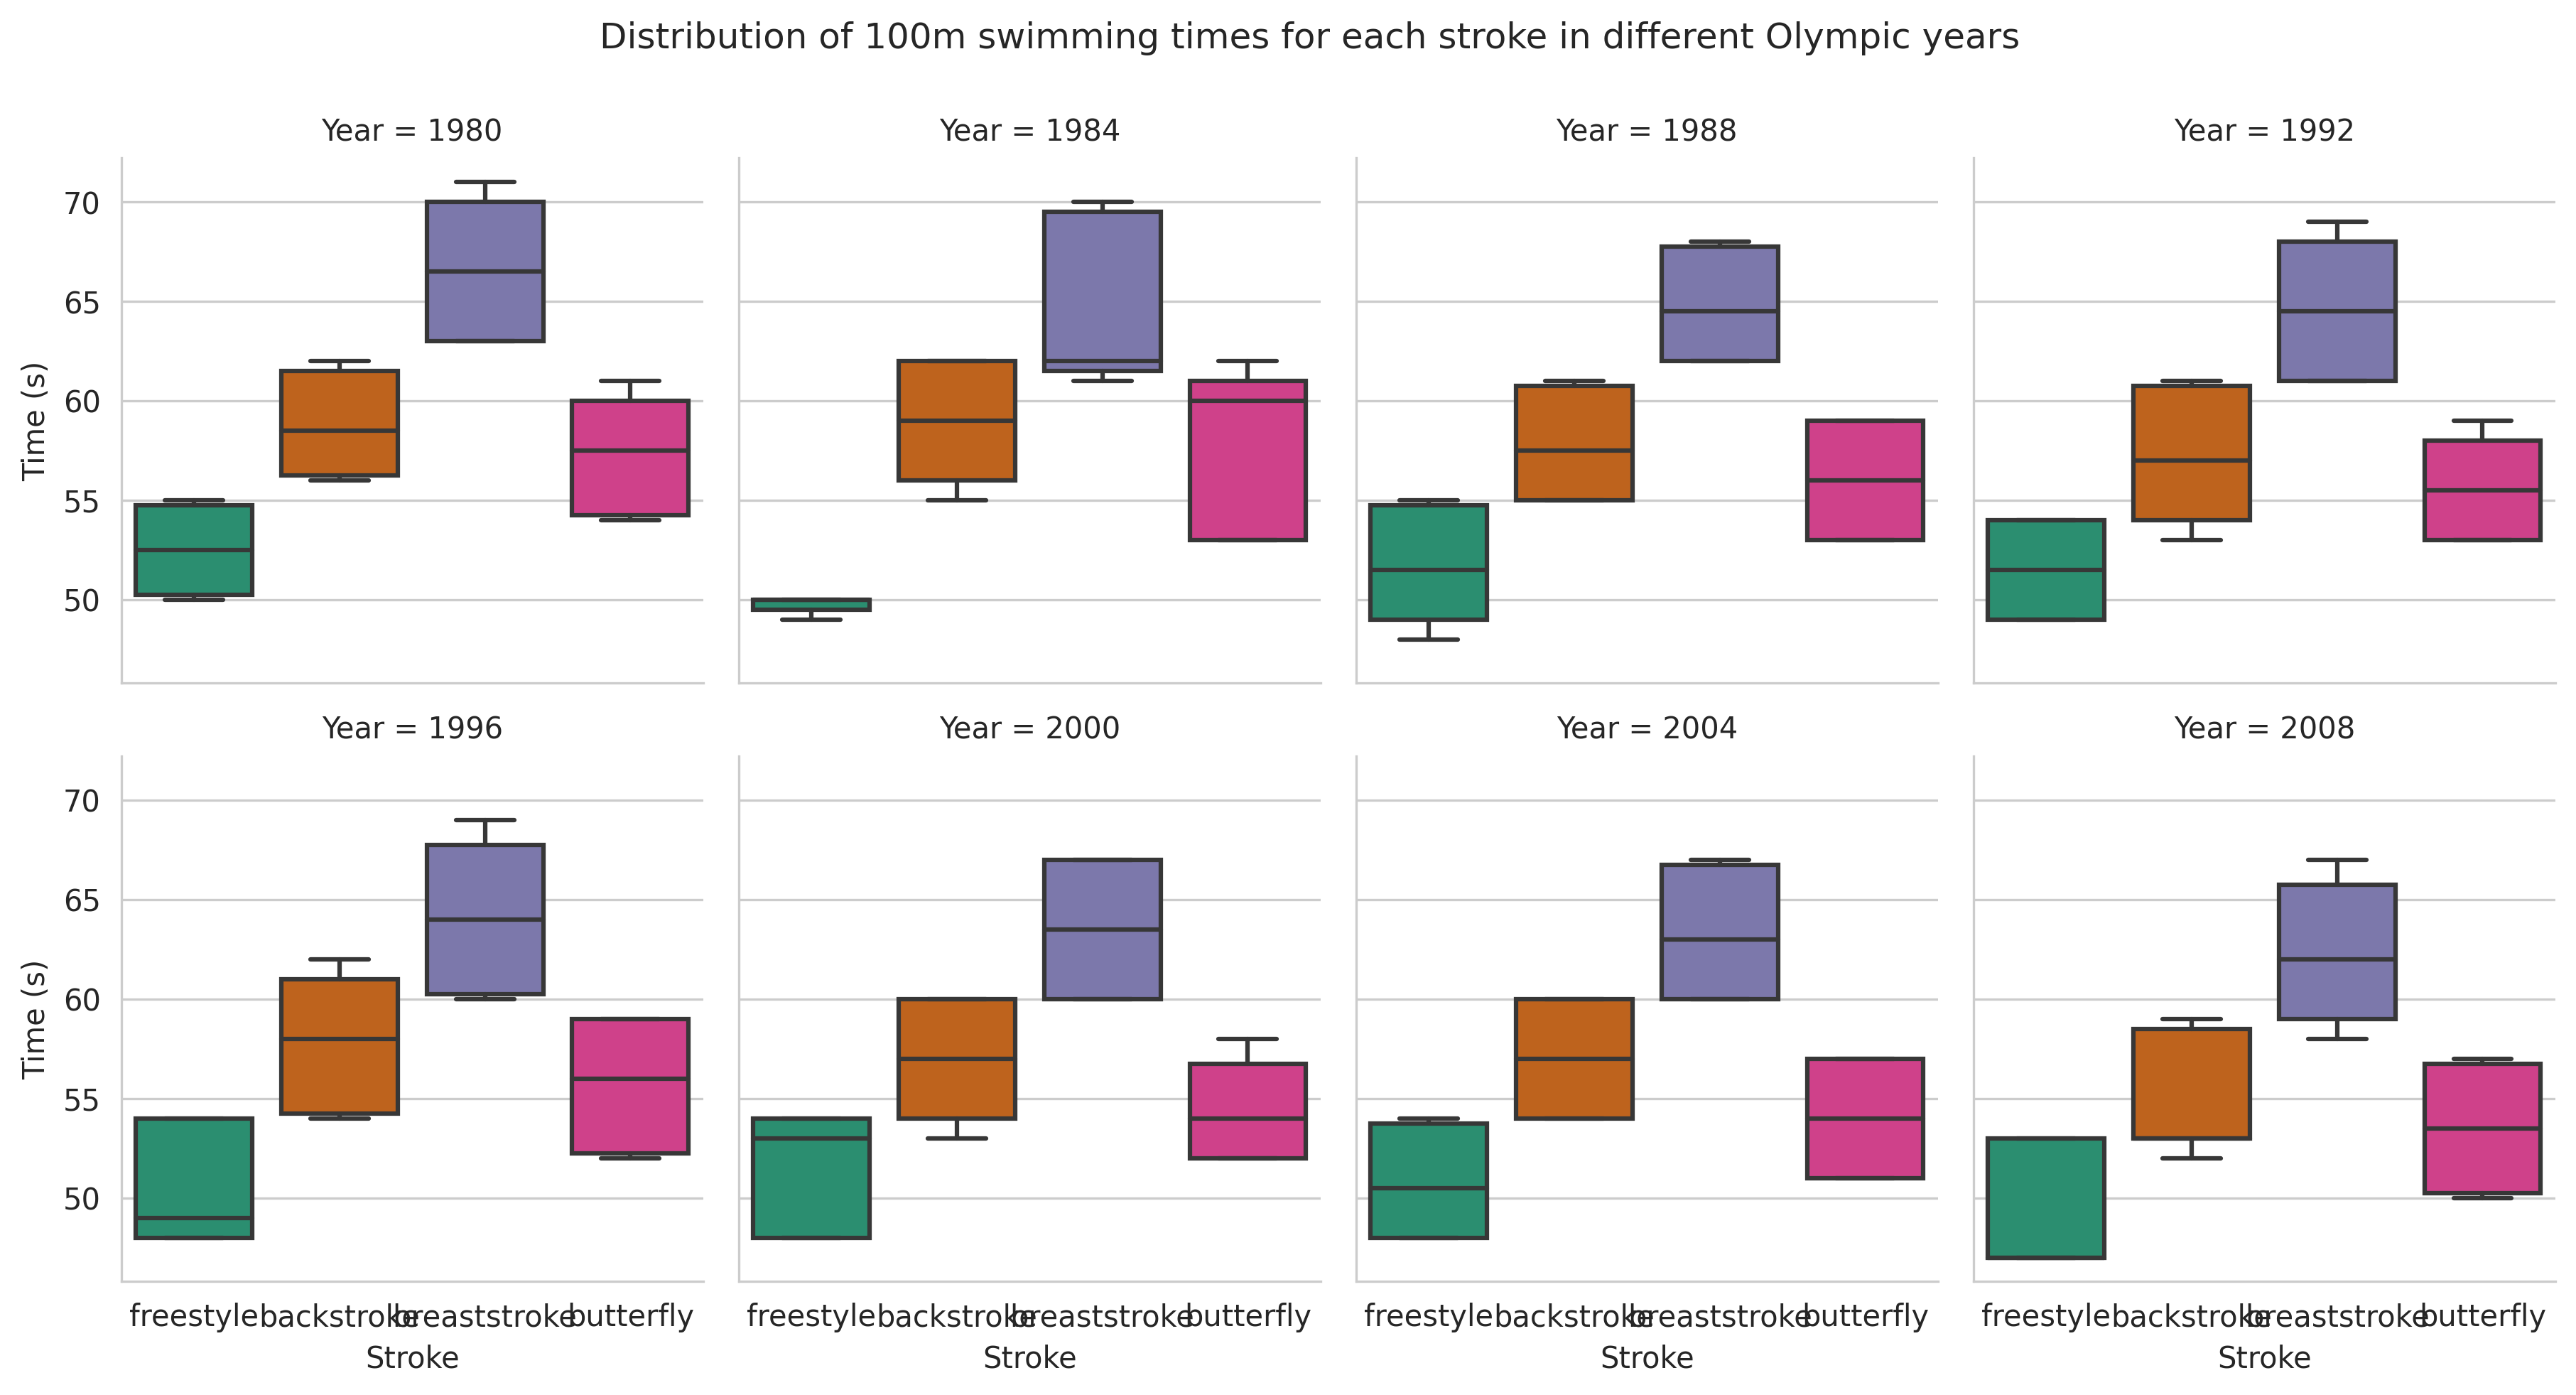

In [17]:
# grid_color.py

g = sns.catplot(
    data=swimming[
        (swimming["Distance (m)"] == 100) & (swimming["Year"]).between(1980, 2010)
    ],
    kind="box",
    x="Stroke",
    y="Time (s)",
    palette="Dark2",
    height=3,
    col="Year",
    col_wrap=4,
)

g.fig.suptitle(
    "Distribution of 100m swimming times for each stroke in different Olympic years",
    y=1.05,
)

Now the color becomes much more useful. Even though it shows us redundant information - it tells us the stroke, which is also labelled on the x axis - it's much easier to find the matching boxes between different year plots.

Color will also be very useful when we want to use the same categories across multiple plots of different types. Let's draw a matching set of small multiple scatter plots showing age versus height that are also colored by stroke:

Text(0.5, 1.05, 'Age vs height for 100m Olympic swimmers in each stroke for different years')

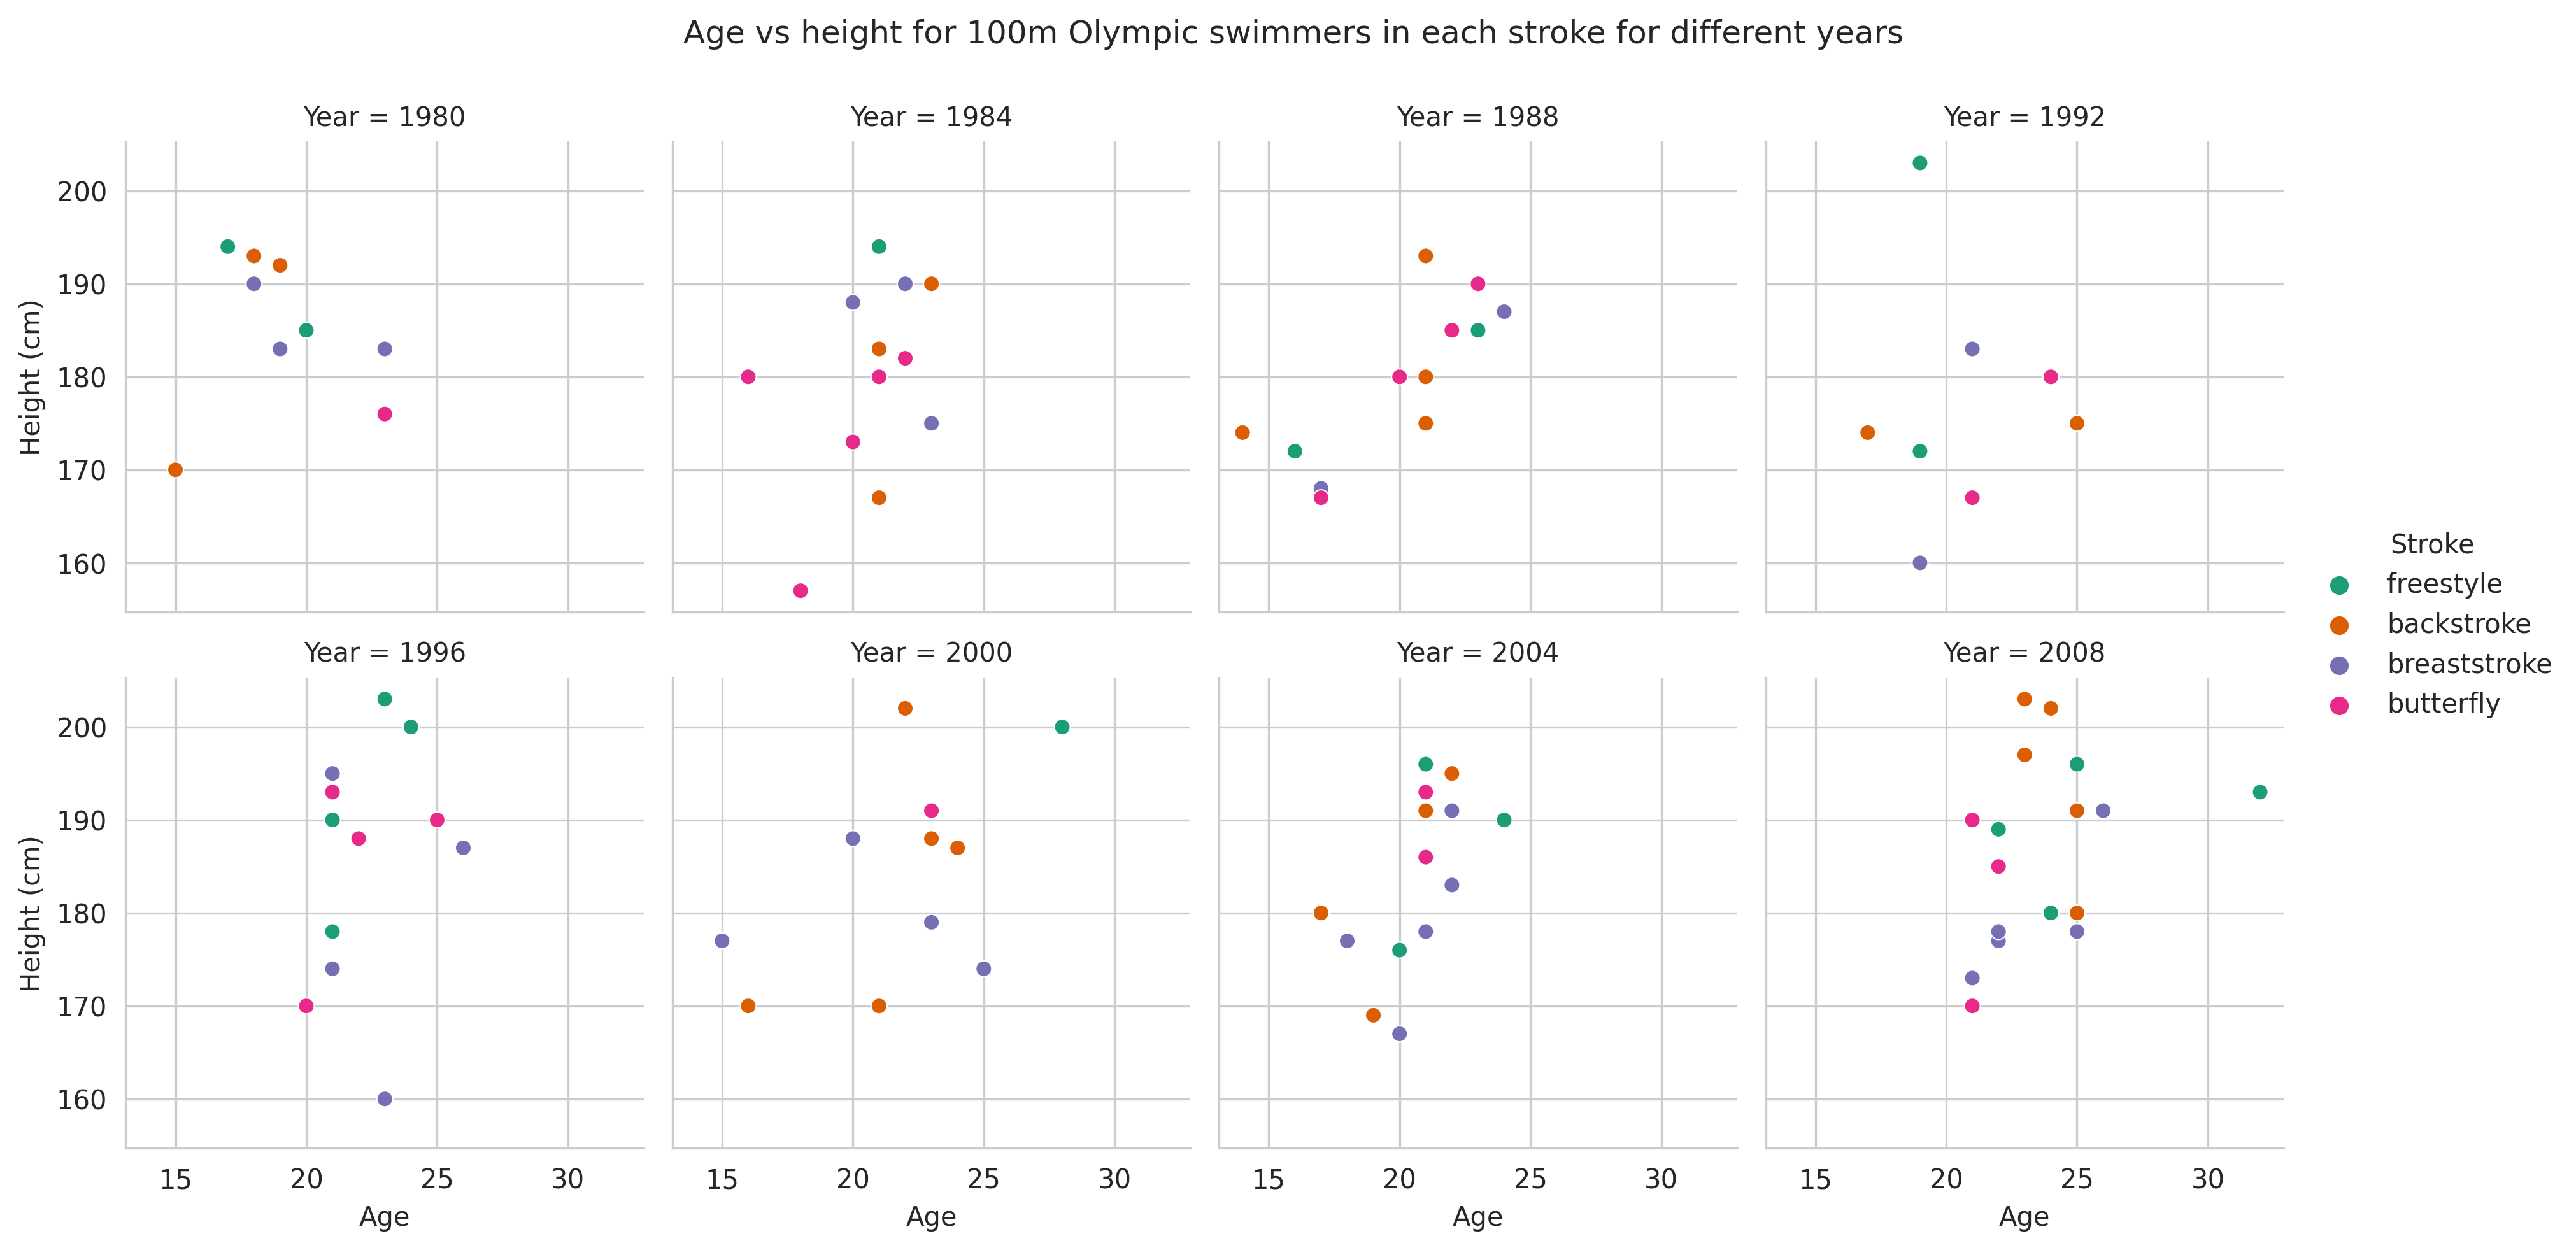

In [18]:
# scatter_grid.py

g = sns.relplot(
    data=swimming[
        (swimming["Distance (m)"] == 100) & (swimming["Year"]).between(1980, 2010)
    ],
    x="Age",
    y="Height (cm)",
    palette="Dark2",
    height=3,
    col="Year",
    col_wrap=4,
    hue="Stroke",
)
g.fig.suptitle(
    "Age vs height for 100m Olympic swimmers in each stroke for different years",
    y=1.05,
)

Cross referencing this plot with the previous one is a tricky task, but one that is made much easier if we use consistent colors for the categories - in this case, strokes. Let's say we notice that one of the green points in the scatter plot for 1992 is much taller than the other athletes, and want to check if there are also outliers in time for this event in this year. Without matching colors in the box plots we'd have to check the legend of the scatter plots to find out which stroke corresponds to green, then go to the relevant box plot and look along the x axis until we found the matching box. As it is, all we have to do is look for the matching color - we don't even necessarily need to know which stroke we're looking at.

Notice that when using this technique, we have to make sure that the orders of the categories match. In this case they do, but we could always enforce it by using the `order` and `hue_order` arguments. 

Making custom qualitative palettes is straightforward; we just make a list of color names, hexes or RGB tuples:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

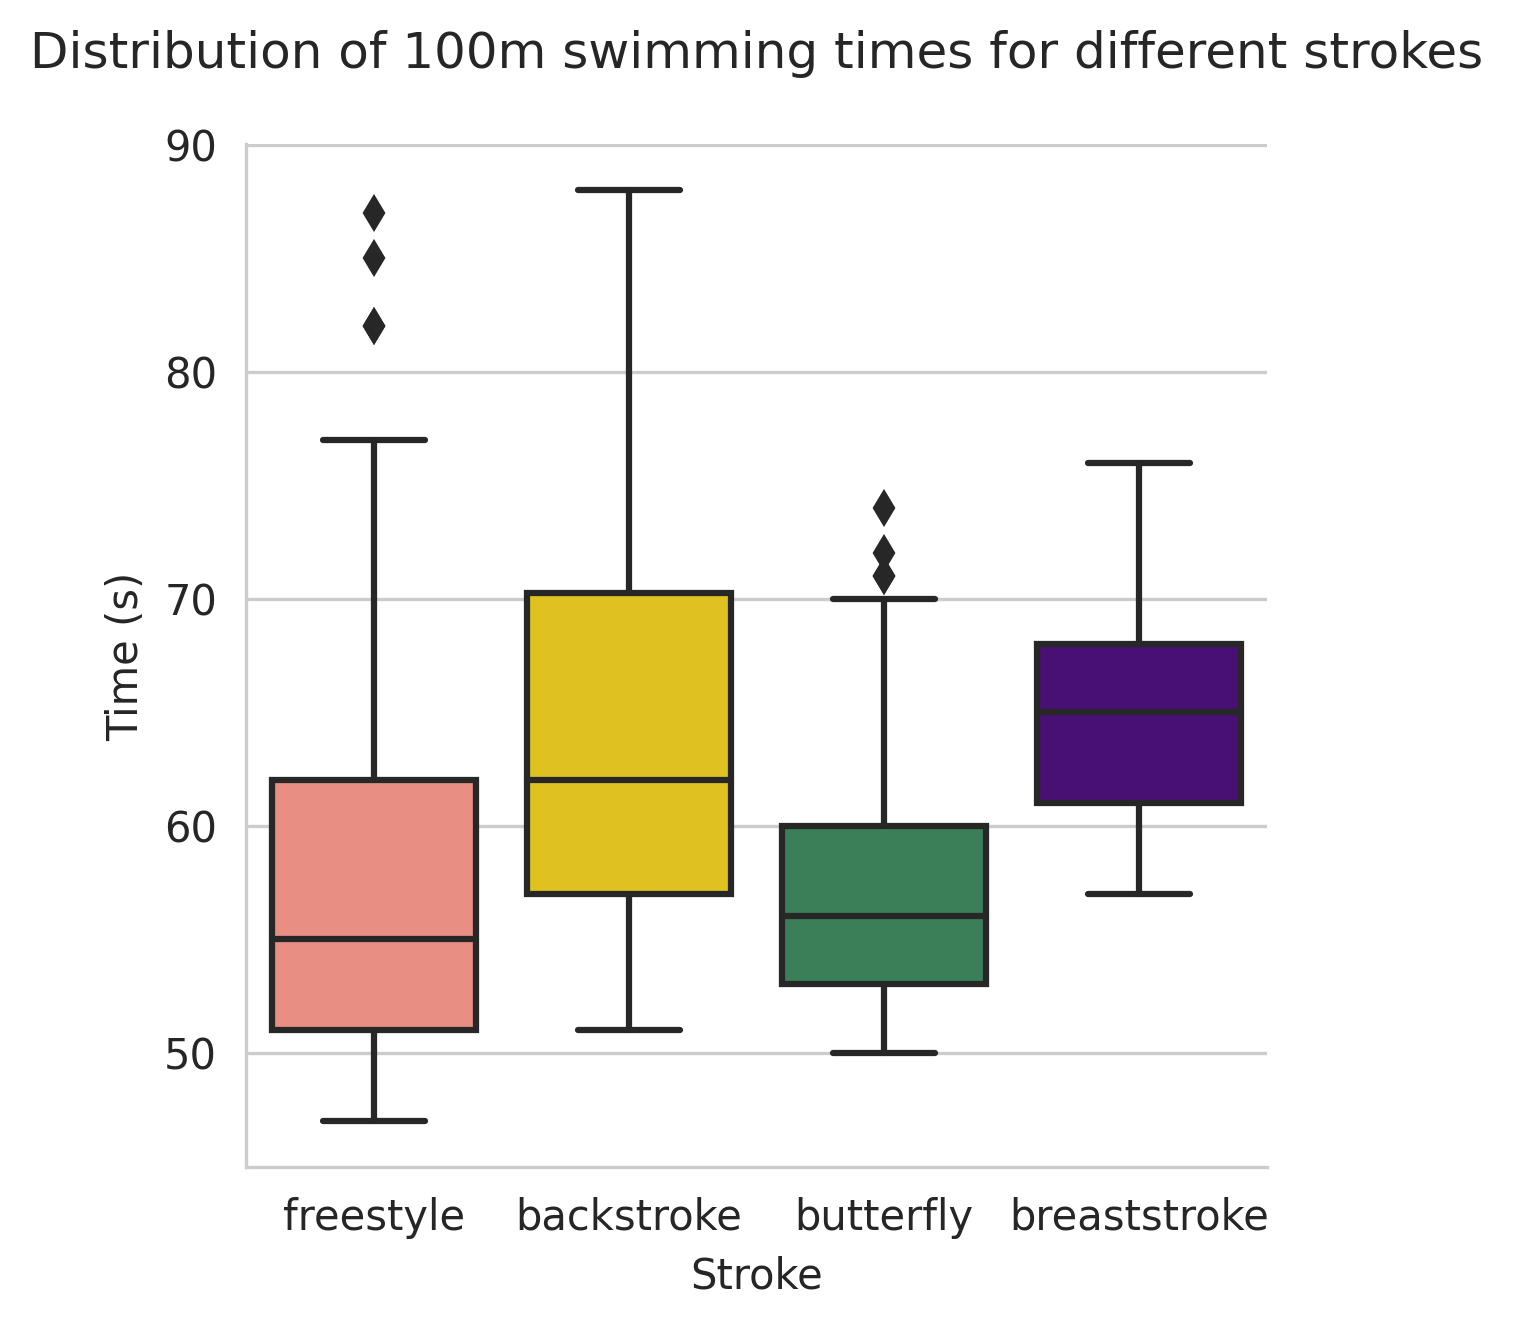

In [19]:
# custom_category_colors.py

sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    palette=["salmon", "gold", "seagreen", "indigo", "firebrick"],
    height=4,
)


plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

One quirk of seaborn that we have to watch out for is the default behavior when picking palettes for categorical plots. If we make a categorical plot with up to 10 categories it will pick a qualitative palette by default:

Text(0.5, 1.05, 'Distribution of 100m swimming times for different strokes')

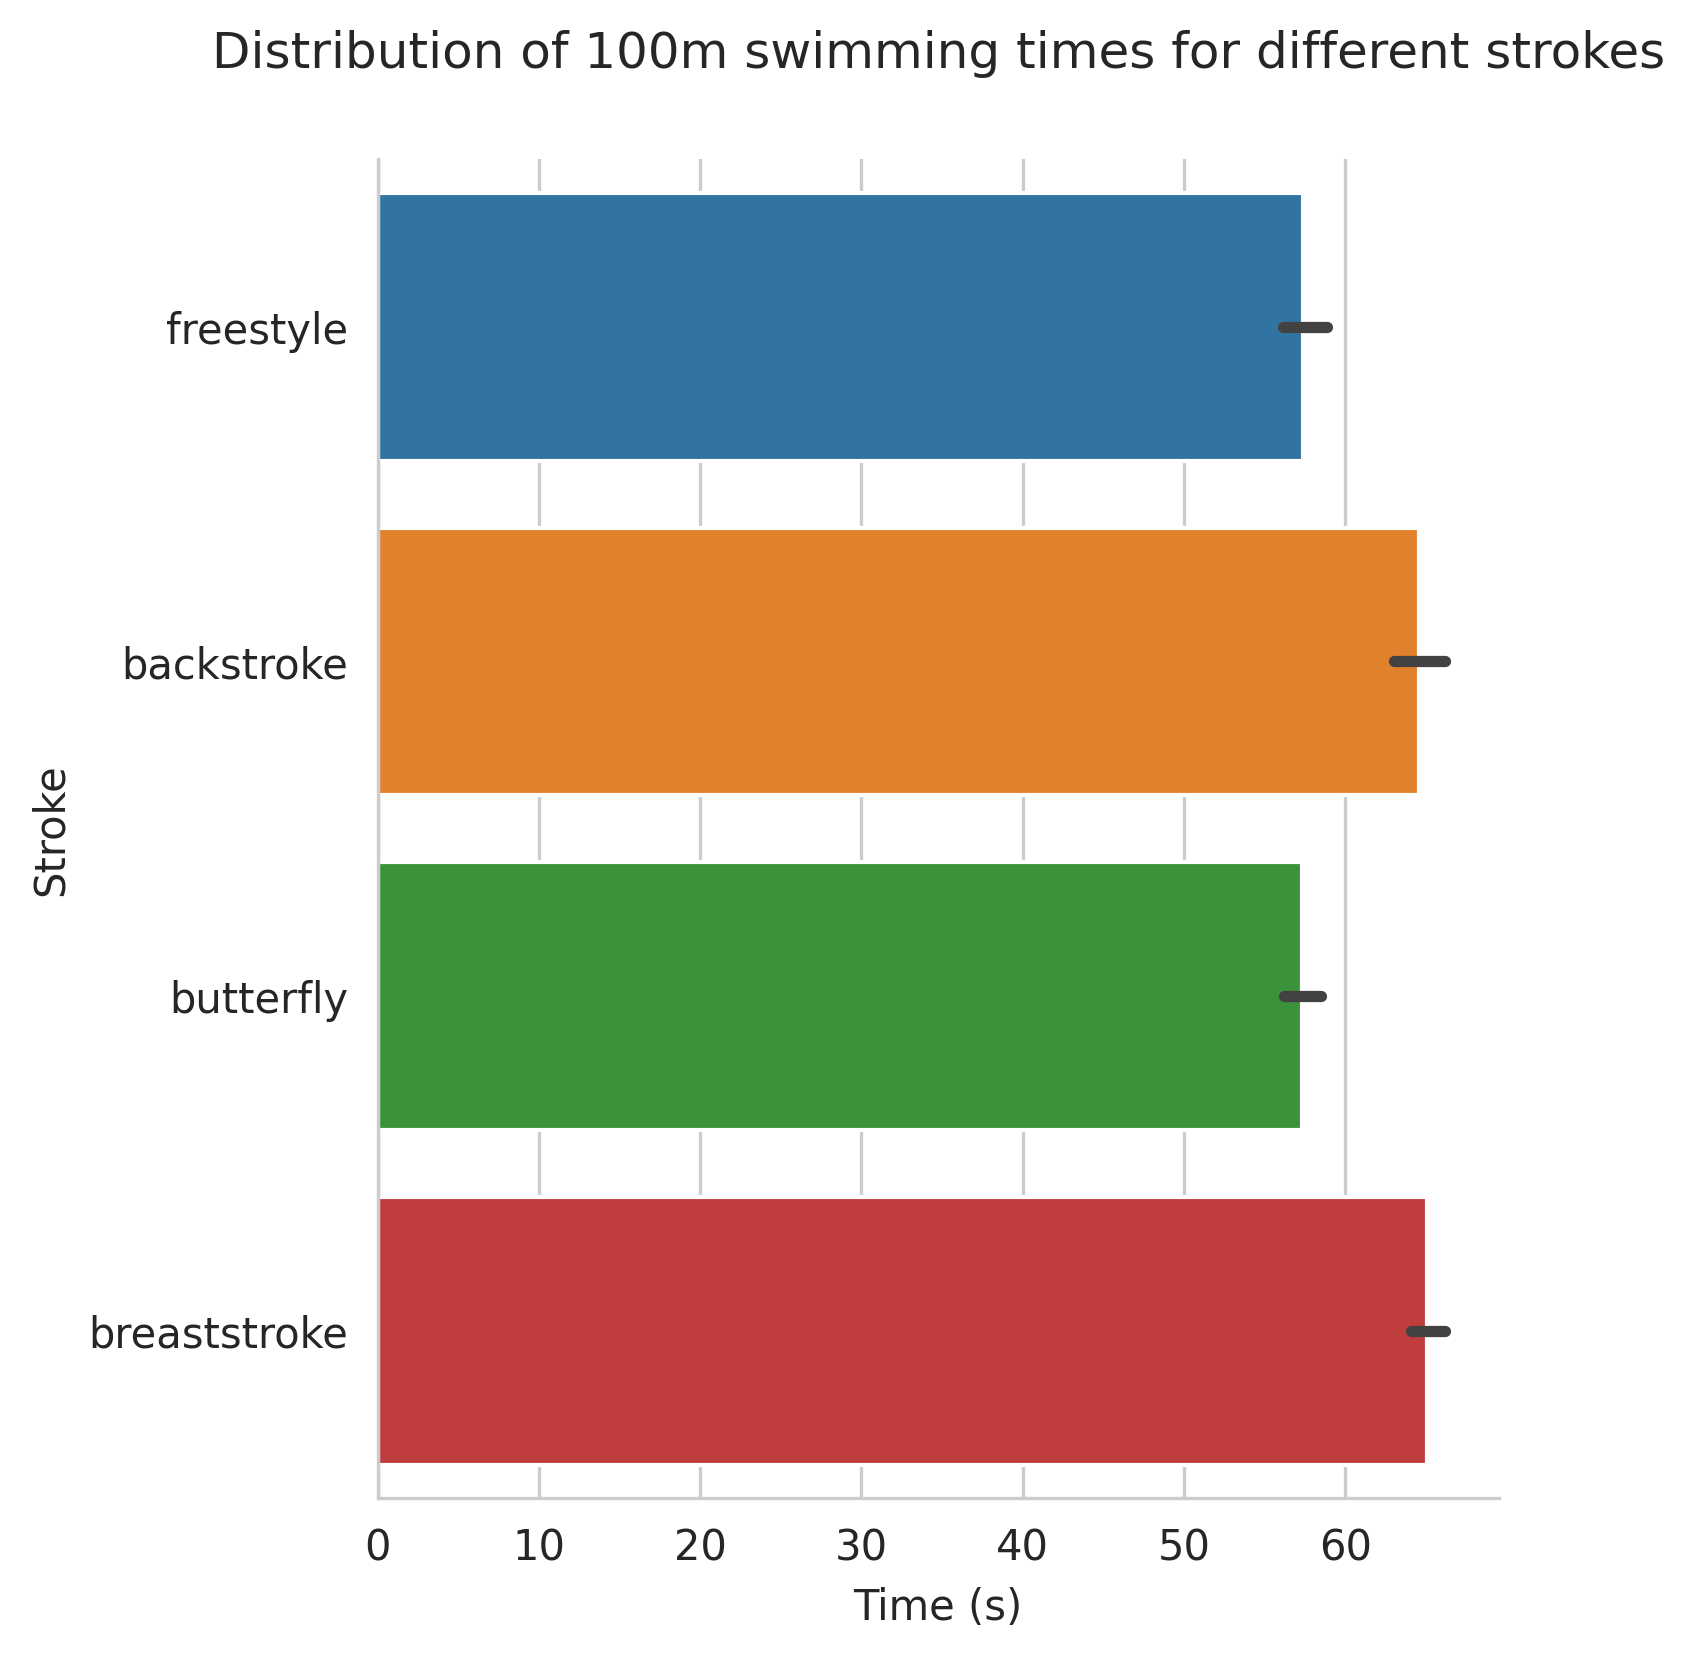

In [20]:
sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="bar",
    y="Stroke",
    x="Time (s)",
)
plt.title("Distribution of 100m swimming times for different strokes", y=1.05)

but if we have more than 10 categories it will pick a sequential palette:

Text(0.5, 1.05, 'Distribution of 100m swimming times for Olympics\nheld in different cities')

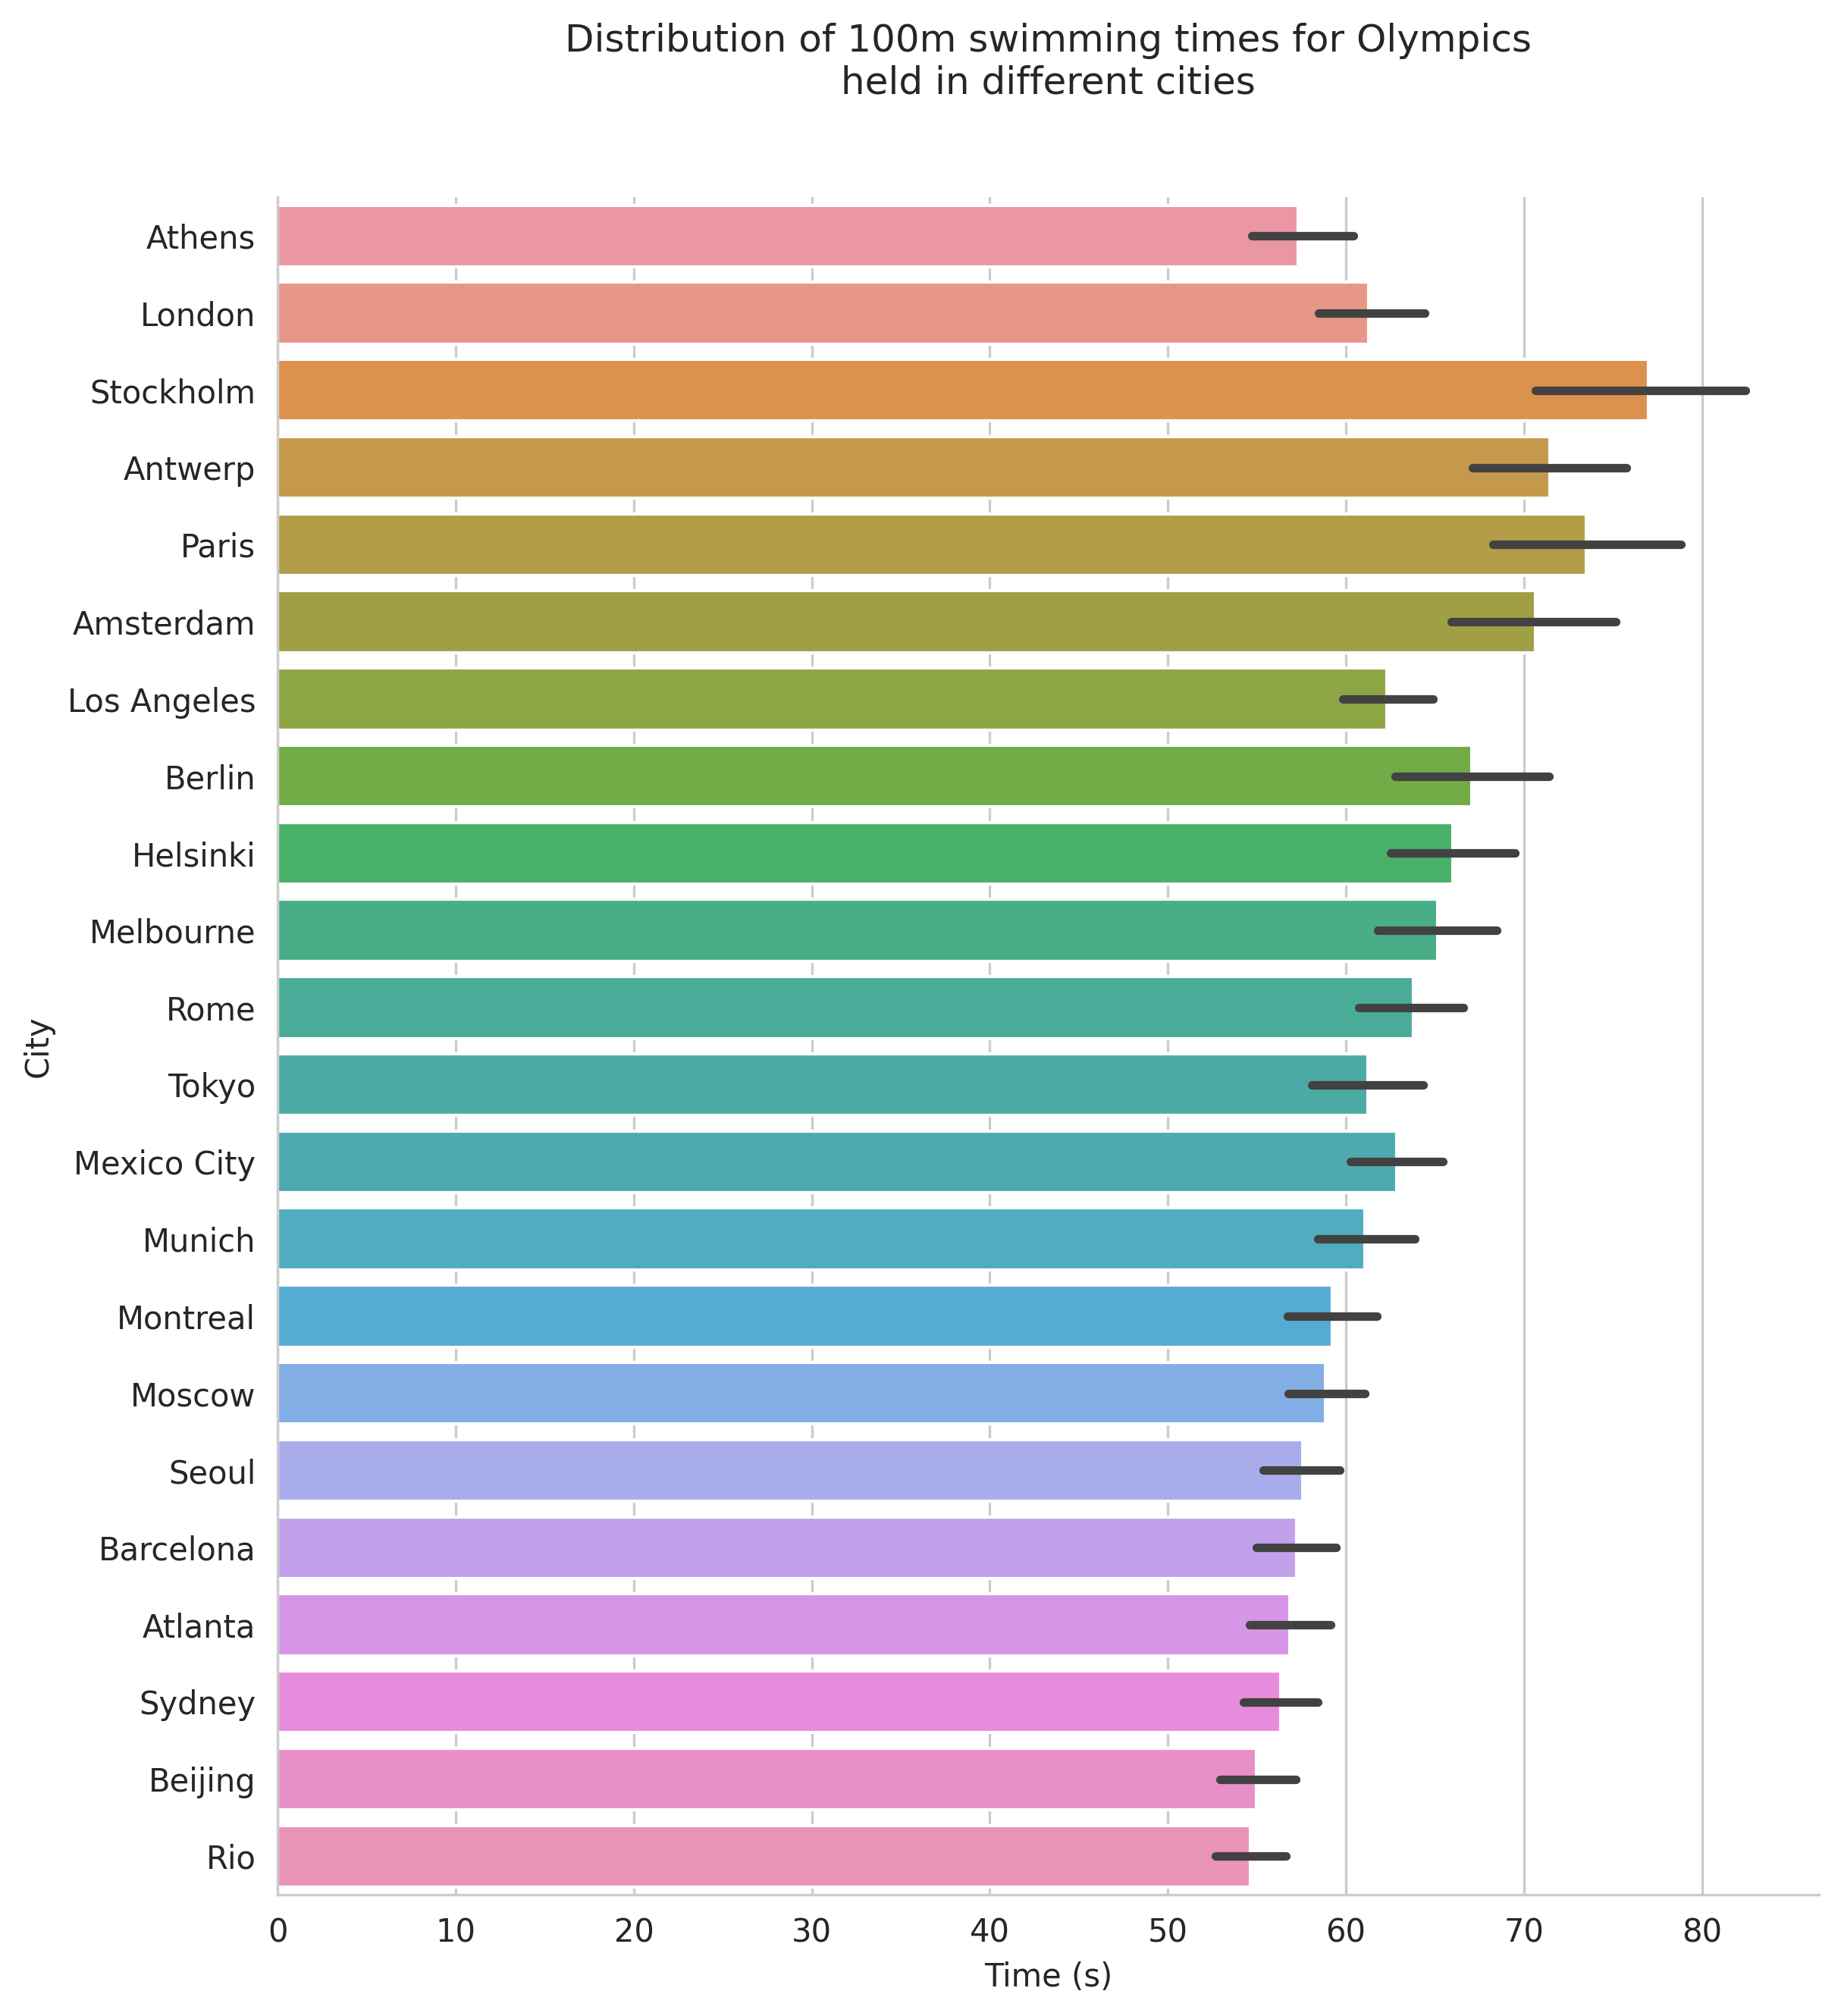

In [21]:
sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="bar",
    y="City",
    x="Time (s)",
    height=8,
)
plt.title(
    "Distribution of 100m swimming times for Olympics\nheld in different cities",
    y=1.05,
)

leading to the kind of interpretation problems we saw before. Because of this behaviour it's quite easy, when exploring a dataset, to end up accidentally creating a chart with an inappropriate palette. The fix here would be to either specify an explicit qualitative palette, or use a single color.

## Diverging palettes

The final type of palette that we need to consider requires a bit of explanation. *Diverging* palettes are sequential, in the sense that they are continuous - similar values map to similar colors. But they are intended for cases where we want some value in the middle of the range of values to be perceived as neutral. An example will make this clear. 

Let's say we want to explore a pattern that we've noticed before: the relationship between height and swimming performance. One way to do this is to consider each athlete's height in relative rather than absolute terms. In other words, for each athlete we want to know whether they are taller or shorter than average.

We know that men and women have different heights, so to simplify matters we'll just select the men for now and remove any with missing heights:

In [22]:
men = swimming[swimming["Sex"] == "M"].dropna()

and make a new column by subtracting the median height from the athlete height:

In [23]:
men["Height compared\nto median (cm)"] = (
    men["Height (cm)"] - men["Height (cm)"].median()
)
men.head()

Name Country  Age Sex  Height (cm)  ...   Medal Time (s)  \
7       Charles Daniels     USA   23   M        183.0  ...    Gold     65.0   
10         Henry Taylor     GBR   23   M        165.0  ...    Gold    336.0   
11  Francis Beaurepaire     ANZ   16   M        170.0  ...  Silver    344.0   
13         Henry Taylor     GBR   23   M        165.0  ...    Gold   1368.0   
15  Francis Beaurepaire     ANZ   16   M        170.0  ...  Bronze   1376.0   

    Distance (m)     Stroke  Height compared\nto median (cm)  
7            100  freestyle                             -3.0  
10           400  freestyle                            -21.0  
11           400  freestyle                            -16.0  
13          1500  freestyle                            -21.0  
15          1500  freestyle                            -16.0  

[5 rows x 13 columns]

This new column tells us, for each male athelete, whether they are taller or shorter than the median, and by how much. A useful trick when we have a long column name is to manually put a newline character in the middle of it - this looks odd when viewed as a table, but will work out well in figures. 

Now let's use it in a chart. If we put our new column on an axis it's easy enough to interpret: points to the right of the center line represent athletes that are taller than average. The only tweak we might make is to set the x axis limits to make it symmetrical around the zero point:

Text(0.5, 1.0, "Height relative to the median vs time\n for mens' 400m freestyle results")

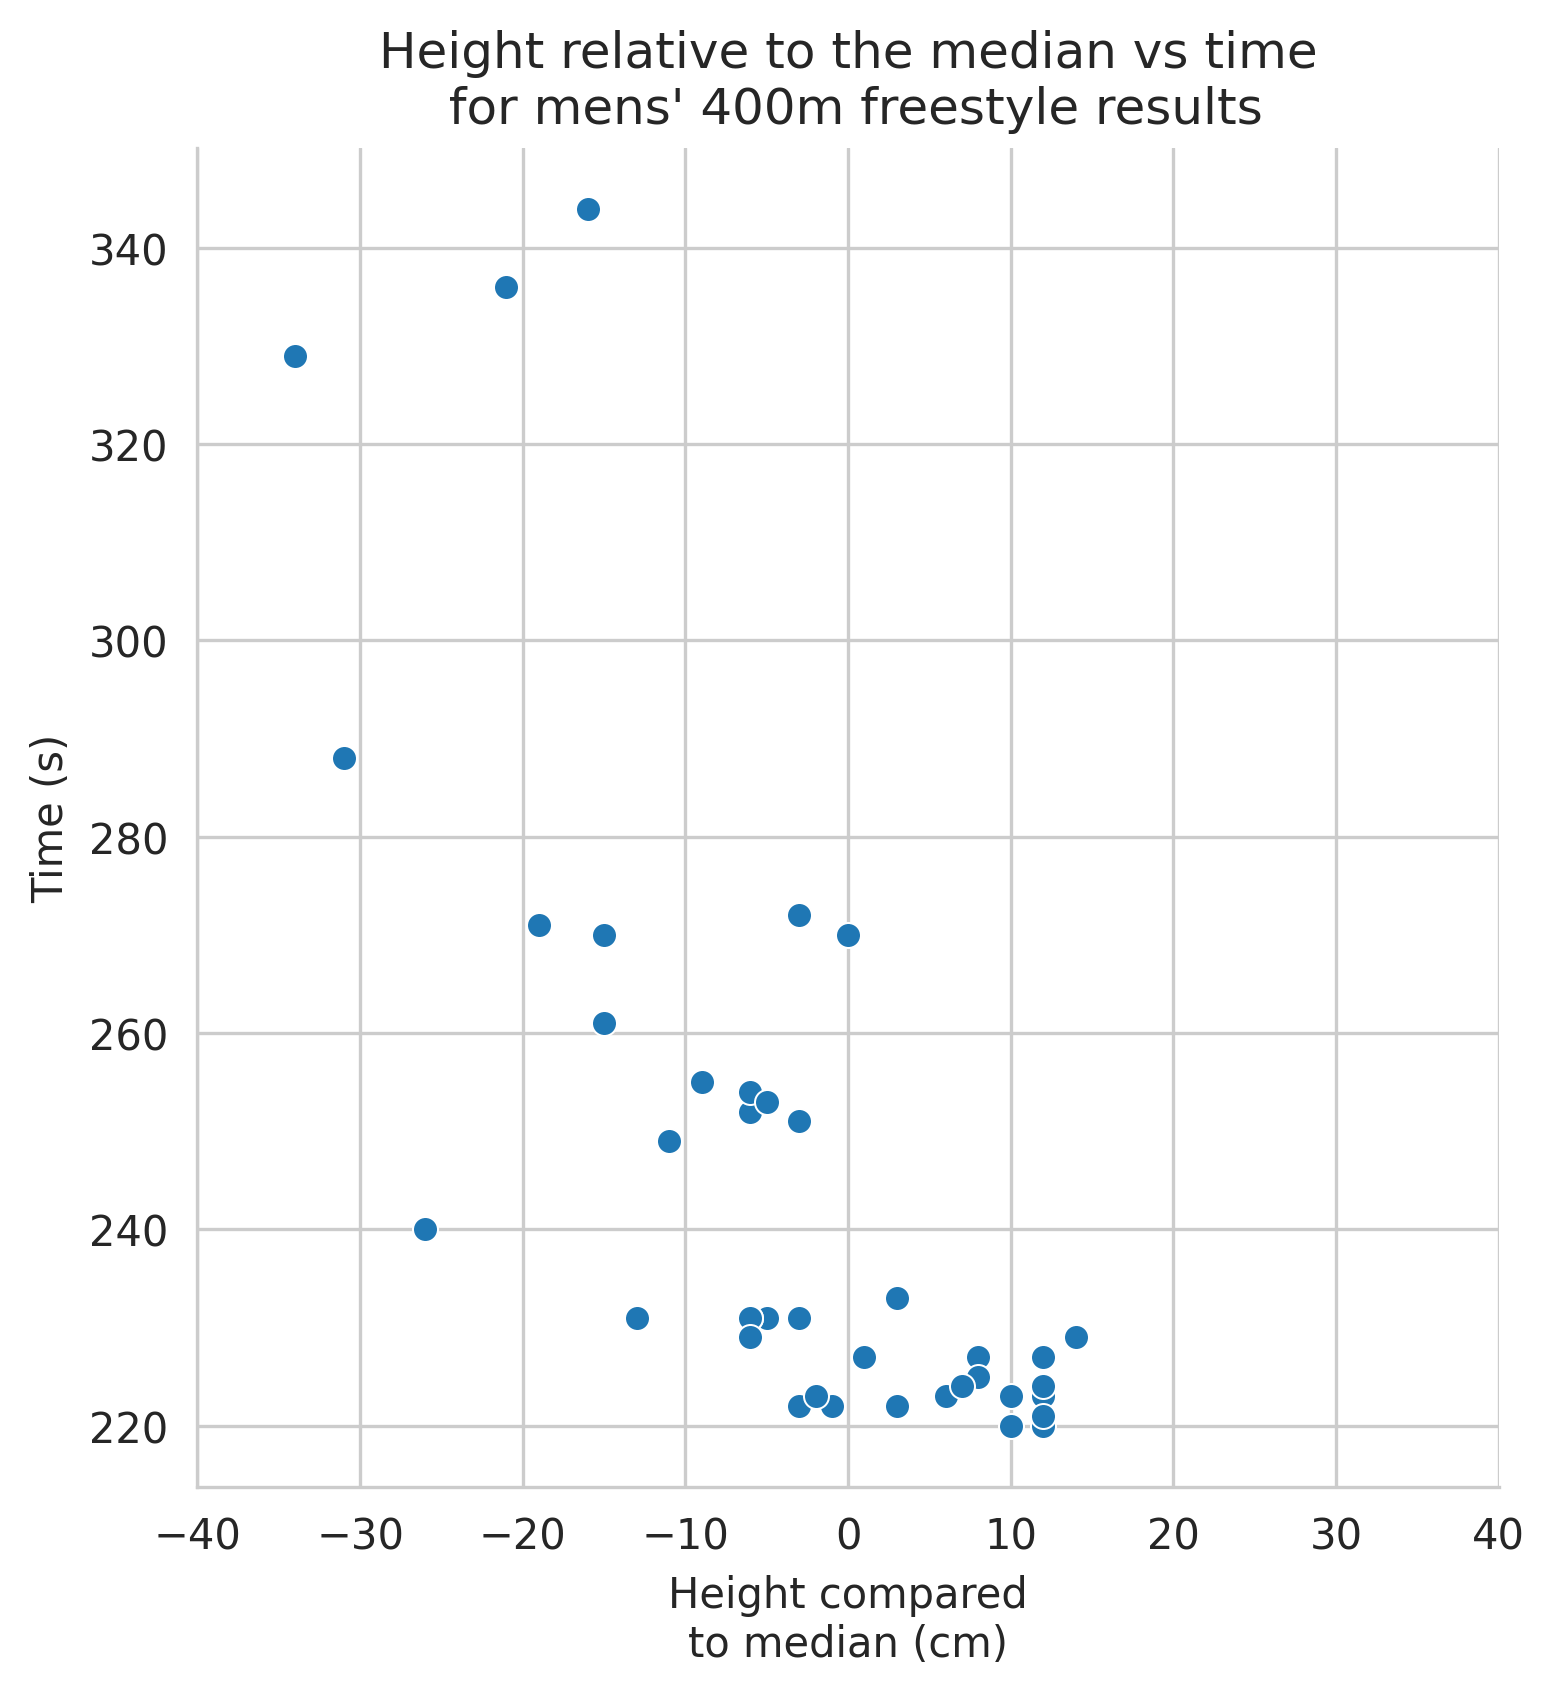

In [24]:
# difference_plot.py

mens_400m_freestyle = men[(men["Distance (m)"] == 400) & (men["Stroke"] == "freestyle")]

sns.relplot(data=mens_400m_freestyle, x="Height compared\nto median (cm)", y="Time (s)")
plt.xlim(-40, 40)
plt.title("Height relative to the median vs time\n for mens' 400m freestyle results")

This plot shows a pattern that we've noticed before - that taller atheletes are faster - but looking at relative height in this way allows us to see some subtleties. We might say that while there isn't much of an advantage being taller than average, there is a great disadvantage being shorter.

When we use this new column as a hue, however, things get a bit trickier:

Text(0.5, 1.0, 'Male Olympic swimmers weight over time')

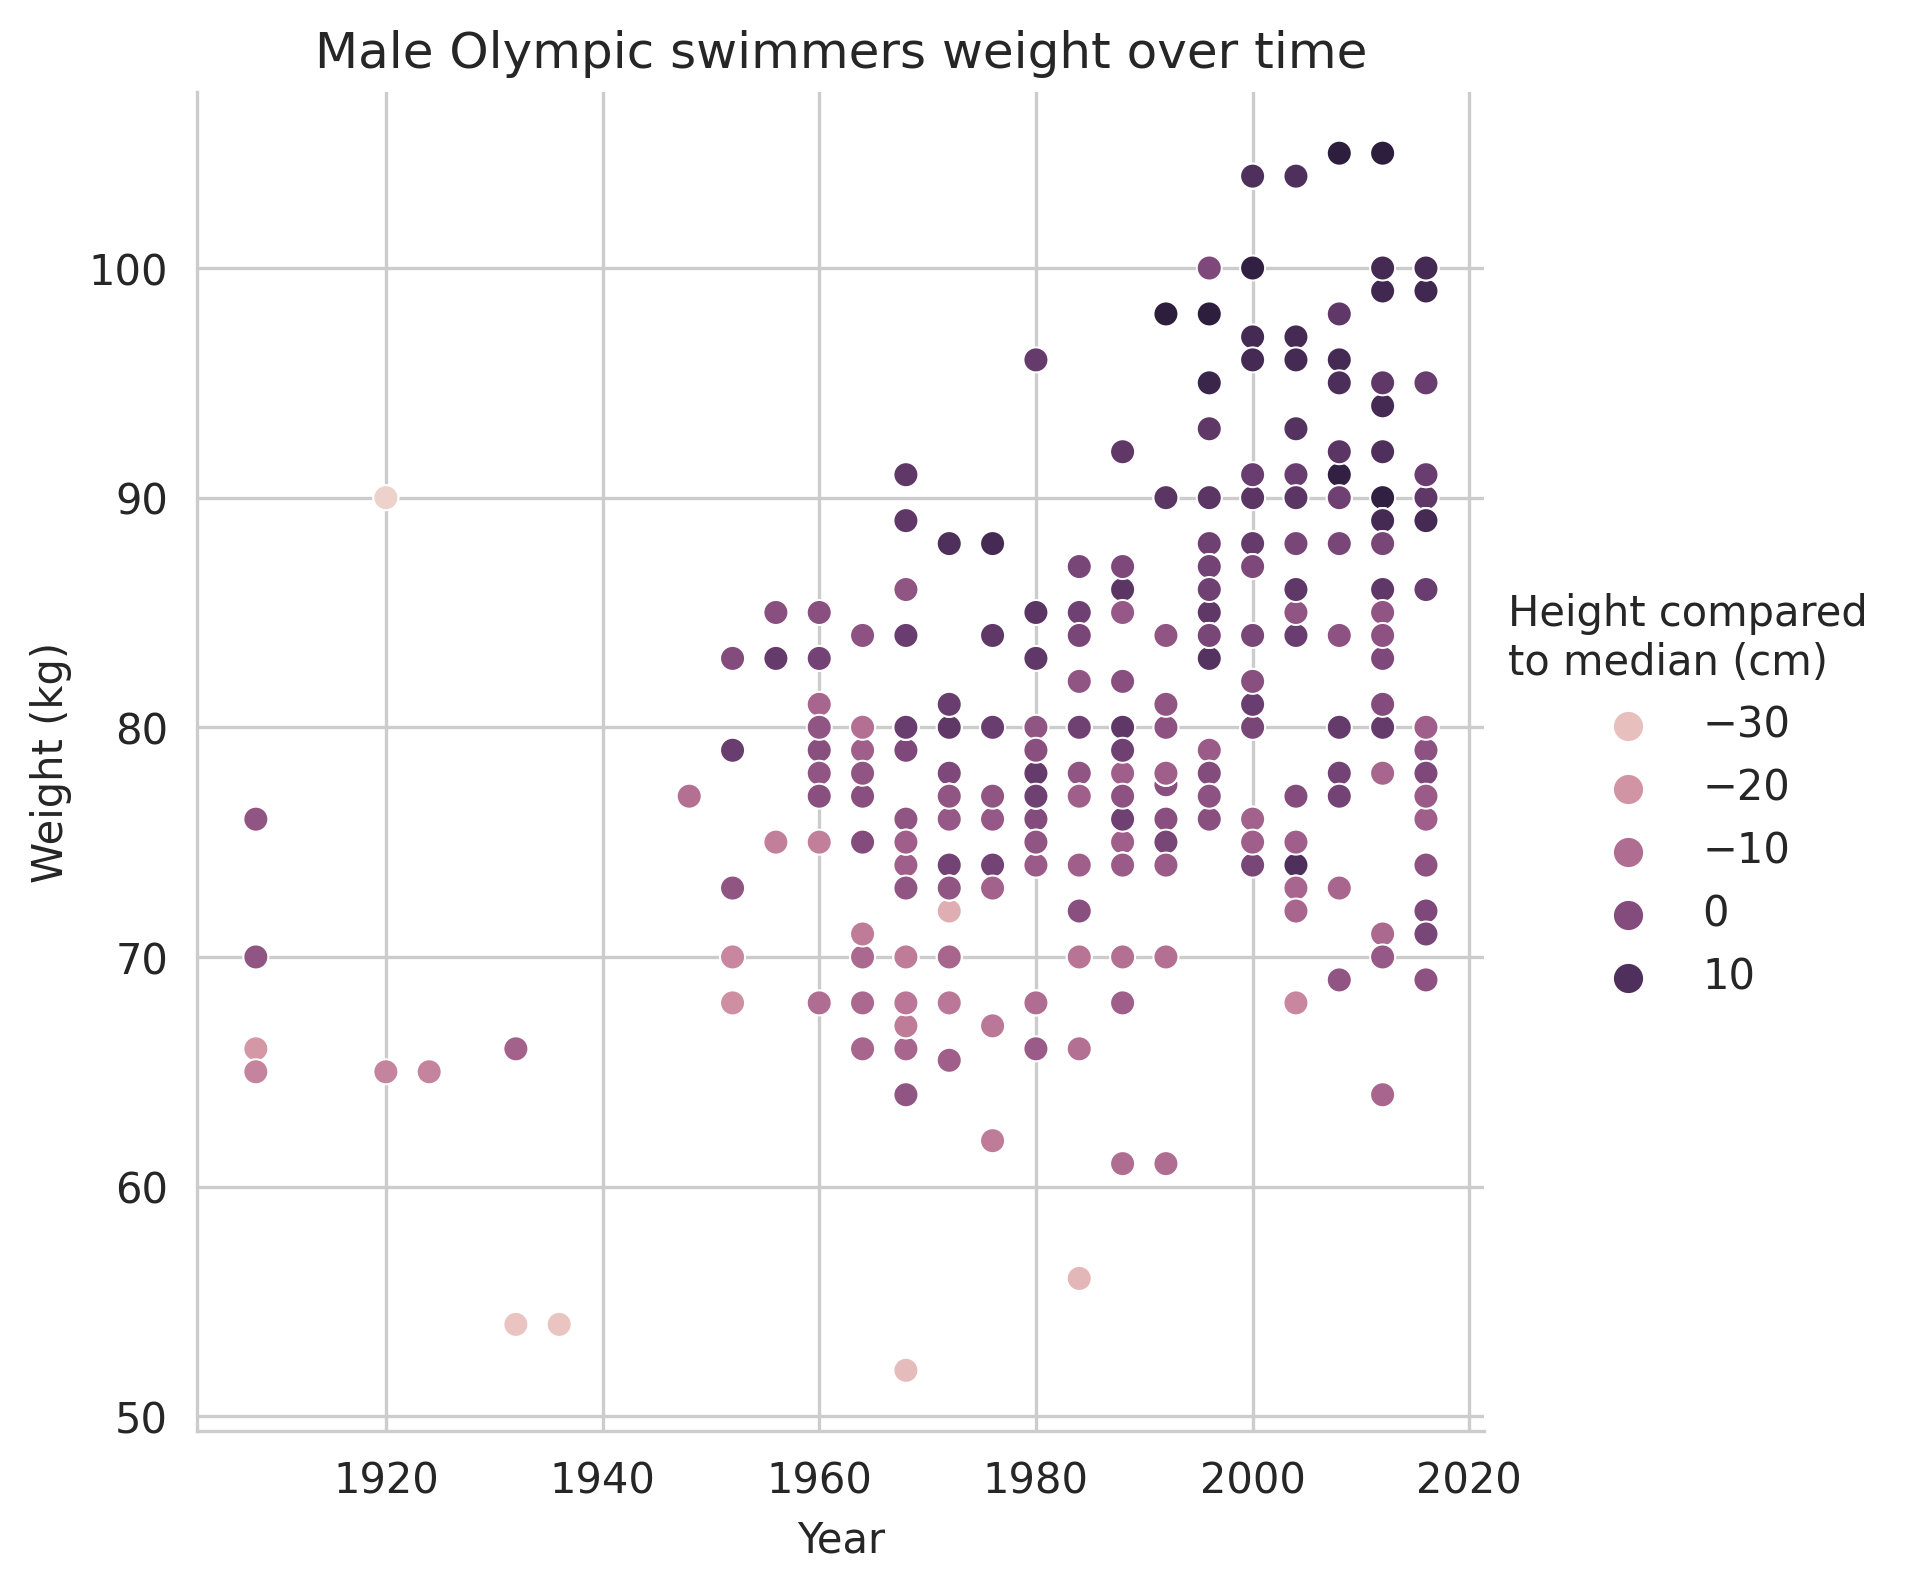

In [25]:
sns.relplot(
    data=men, x="Year", y="Weight (kg)", hue="Height compared\nto median (cm)",
)
plt.title("Male Olympic swimmers weight over time")

What we are really interested in seeing is, for each point, whether the height is above or below the average for men, i.e. whether the difference is positive or negative. But as we can see from the legend, the particular shade of purple that corresponds to zero isn't easy to pick out. We will have the same problem with any of the sequential palettes we have seen. 

The solution is to use a diverging palette, which has a neutral color in the middle that we can use to represent zero. For example, the `RdBu` palette goes from red to blue, passing through white in the center. If we use that as our palette then the colors will be much easier to interpret:

Text(0.5, 1.0, 'Male Olympic swimmers weight over time')

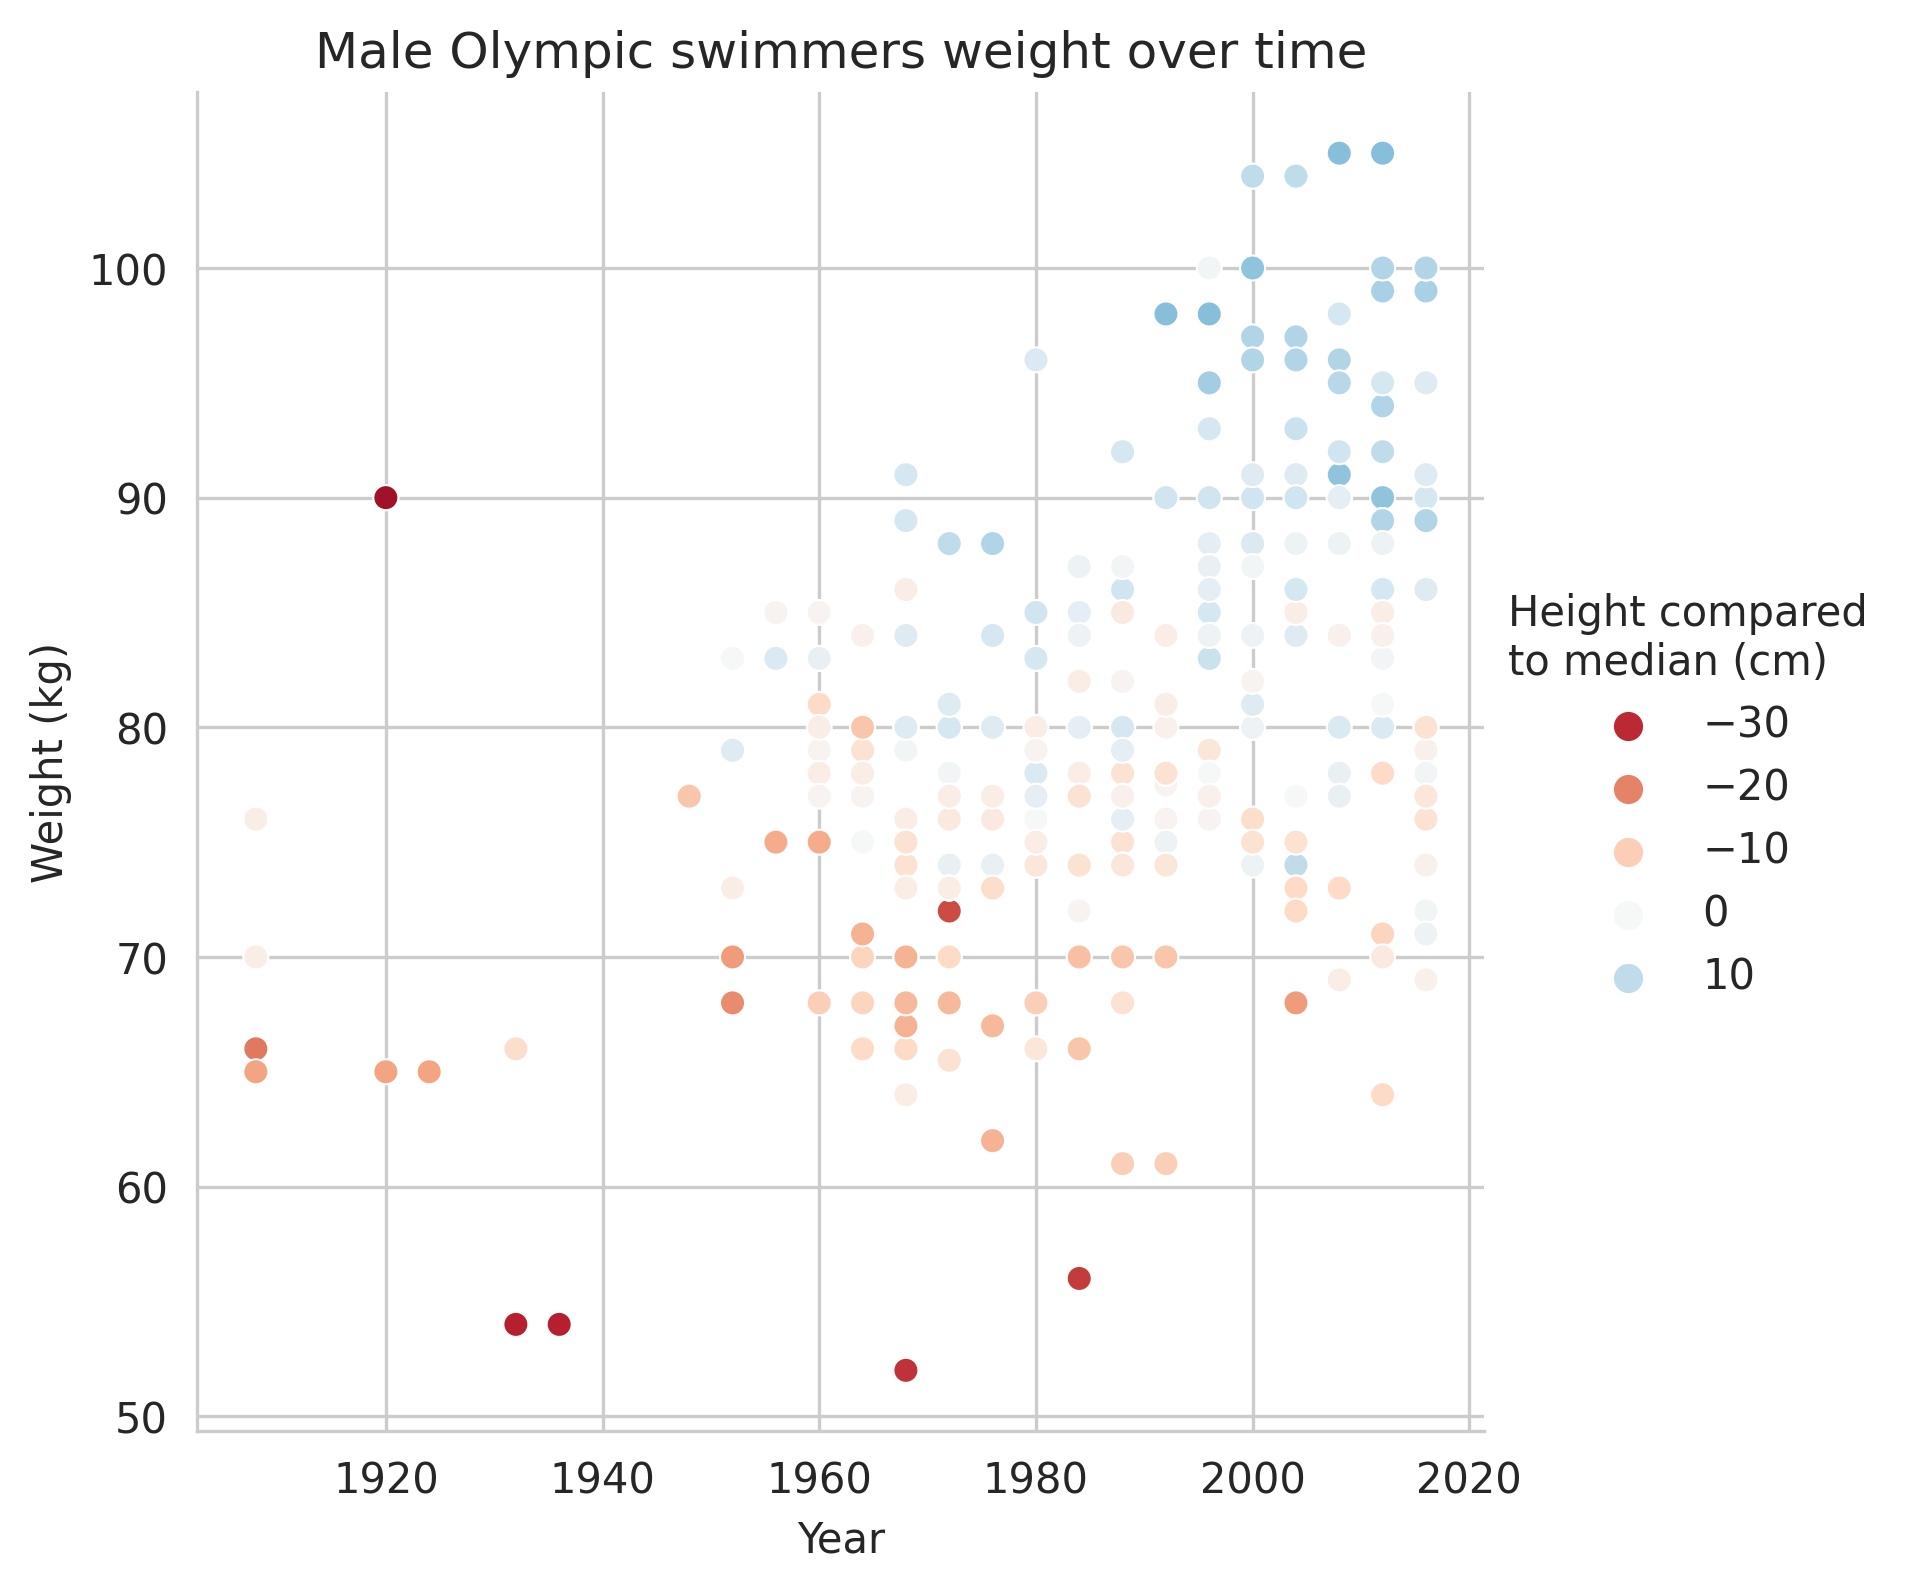

In [26]:
# diverging_palette.py


sns.relplot(
    data=men,
    x="Year",
    y="Weight (kg)",
    hue="Height compared\nto median (cm)",
    palette="RdBu",
    hue_norm=(-40, 40),  # make zero the middle of the color scale
)
plt.title("Male Olympic swimmers weight over time")

As we can see from the scale, red points are negative and blue points are positive, and the saturation of the color tells us how far away from zero each point is. This makes it easy to see the pattern that male swimmers below the median height have been getting fewer and fewer medals as time goes on.

Diverging palettes are useful whenever we want to show a value relative to some neutral point. We will make extensive use of diverging palettes when we discuss heatmaps, as it's in that context that they come into play most often. Here are the diverging palettes available:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1499.5, 1499.5, -0.5)

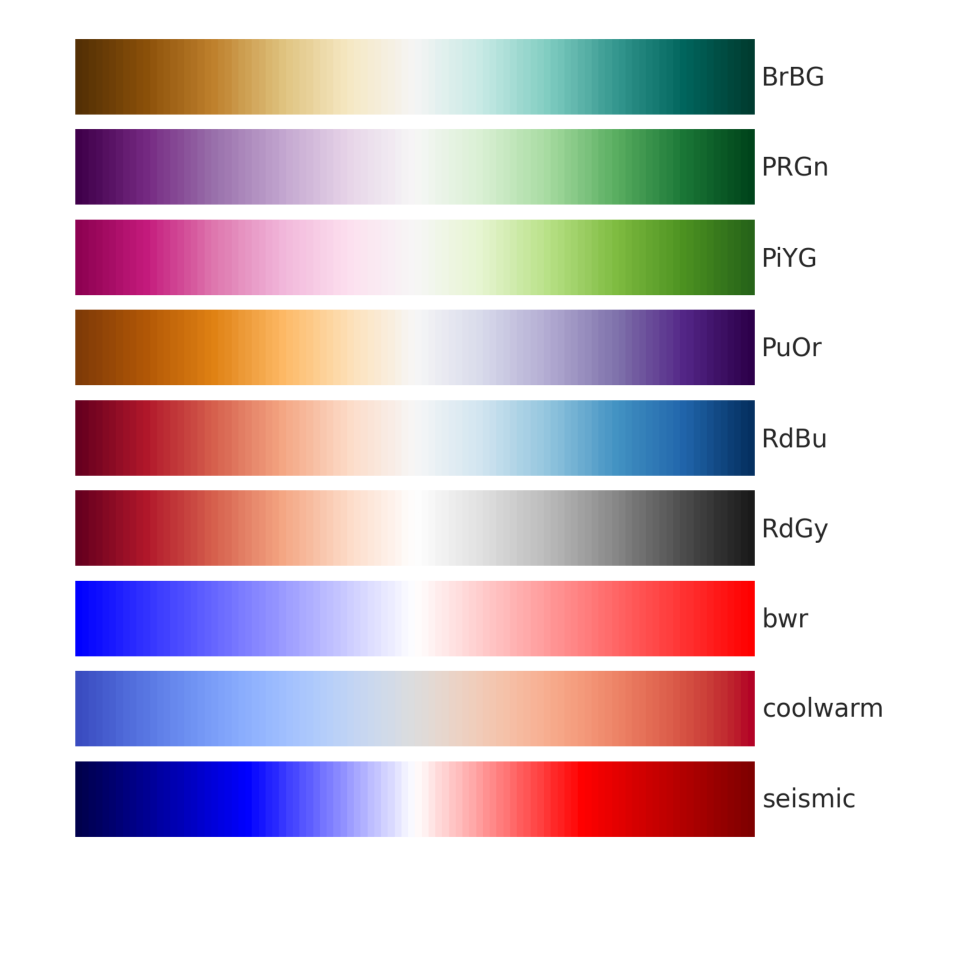

In [27]:
fig, ax = plt.subplots()
from scipy import ndimage

i = plt.imread("colormaps_diverging.png")
plt.imshow(ndimage.rotate(i, -90))
ax.axis("off")

## Using color redundantly



One of the best uses of color in data visualization can be to add redundant information. We have already seen an example of this with our small multiple box plots. Let's look at the distribution of 100m times for athletes from different countries. We will use pandas to filter out a set of countries that we're interested in:

Text(0.5, 1.05, 'Distribution of 100m swimming time for athletes from different countries')

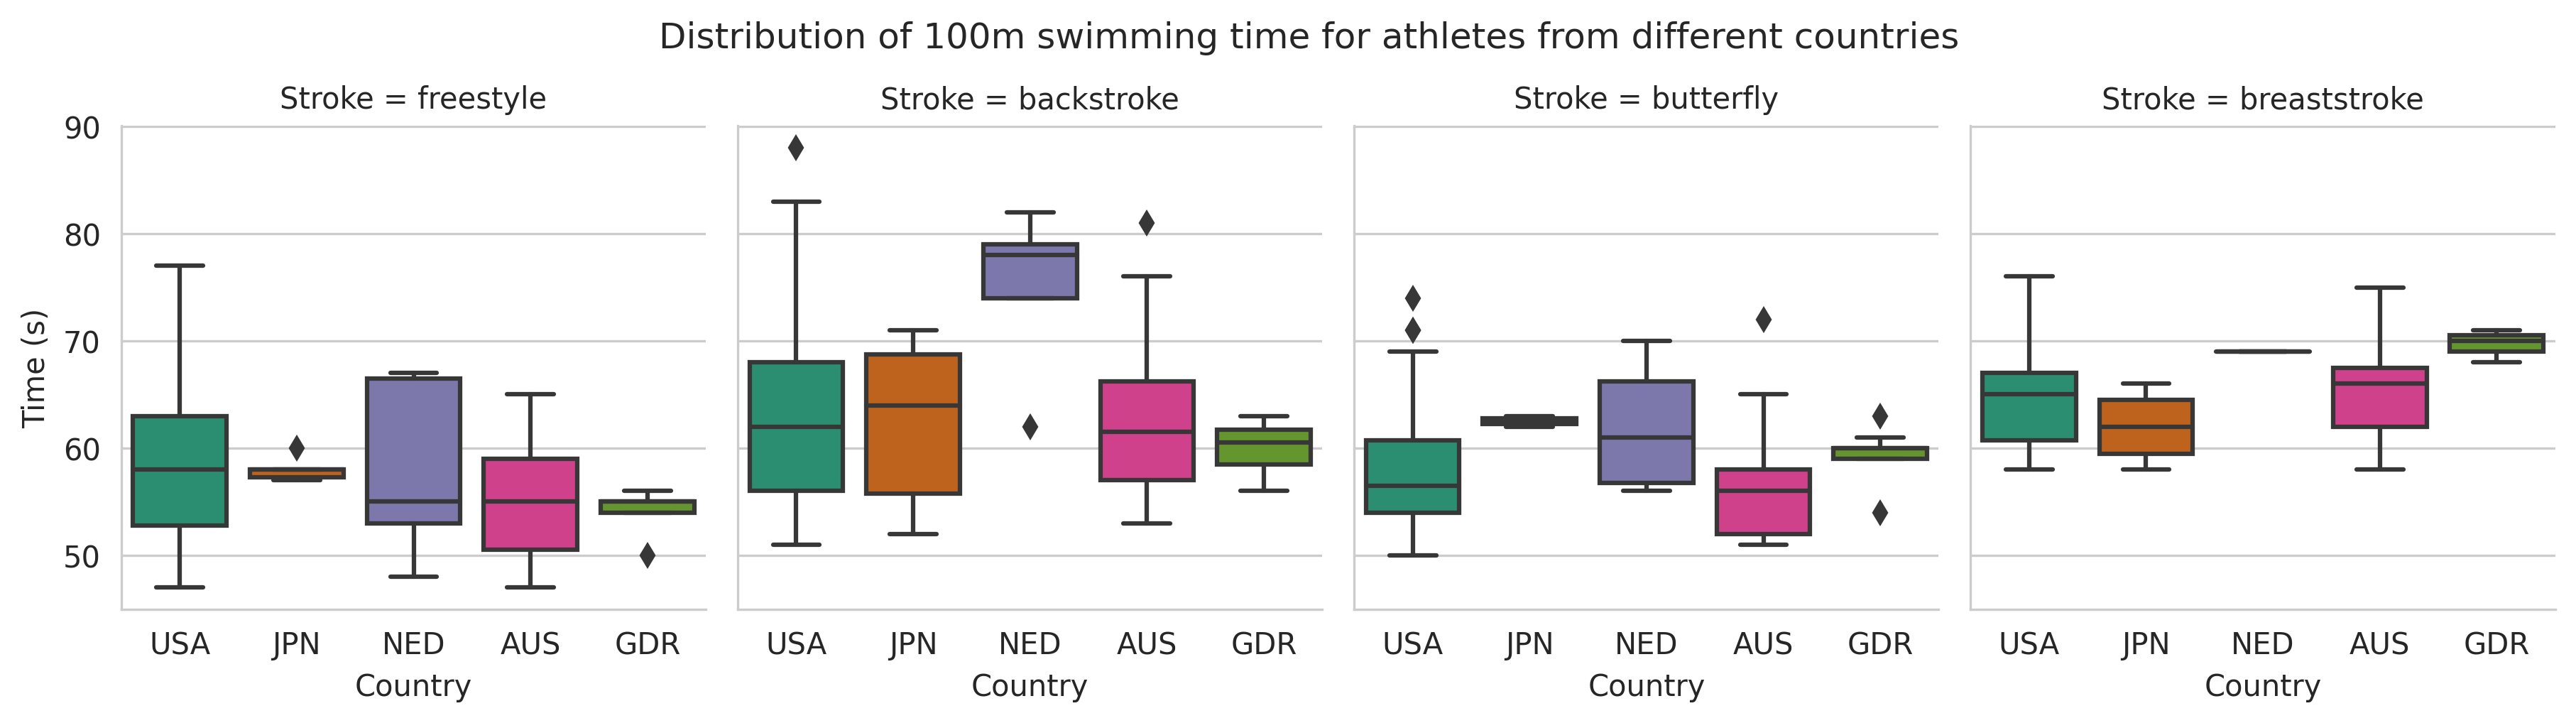

In [28]:
g = sns.catplot(
    data=swimming[
        (swimming["Distance (m)"] == 100)
        & swimming["Country"].isin(["USA", "AUS", "JPN", "NED", "GDR"])
    ],
    kind="box",
    x="Country",
    y="Time (s)",
    palette="Dark2",
    height=3,
    col="Stroke",
)
g.fig.suptitle(
    "Distribution of 100m swimming time for athletes from different countries", y=1.05,
)

In this chart the color of each bar is redundant in the sense that it tells us the country, which we could also figure out by looking at the x axis labels. However, it's still useful. If we want to compare a given country for different strokes, it's much easier to find the matching color than the matching label on the x axis. 

Try it: see how long it takes to figure out if there's a difference in the times between freestyle and butterfly for athletes from the Netherlands, then try to answer the same question using the monochrome version:

Text(0.5, 1.05, 'Distribution of 100m swimming time for athletes from different countries')

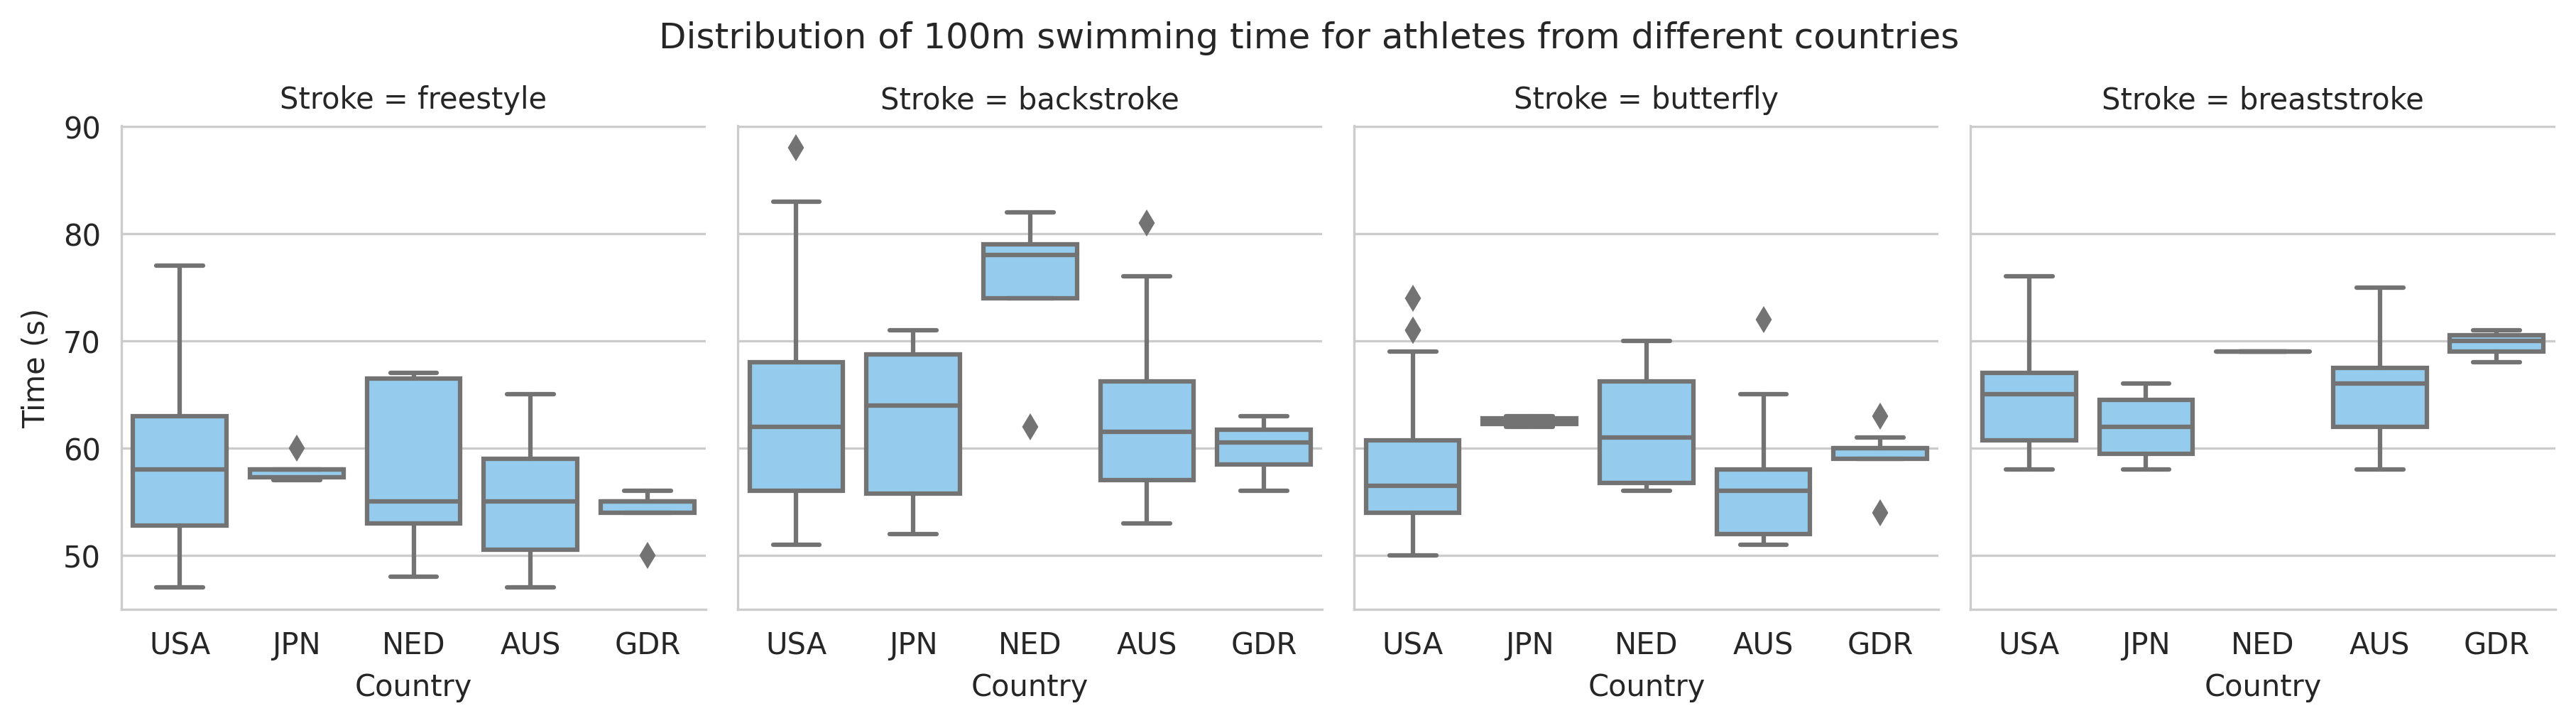

In [29]:
g = sns.catplot(
    data=swimming[
        (swimming["Distance (m)"] == 100)
        & swimming["Country"].isin(["USA", "AUS", "JPN", "NED", "GDR"])
    ],
    kind="box",
    x="Country",
    y="Time (s)",
    color="lightskyblue",
    height=3,
    col="Stroke",
)

g.fig.suptitle(
    "Distribution of 100m swimming time for athletes from different countries", y=1.05,
)

When it comes to interpreting complex charts, redundancy is a good thing. By giving our visual system two aspects of the chart to focus on - in this case, color and X position - we make it easier to make comparisons. 

The same is often true for other aspects. For example, we can use color and marker style redundantly in scatter plots:

Text(0.5, 1.1, 'Height vs weight for male (red circles)\nand female (blue crosses) Olympic swimmers')

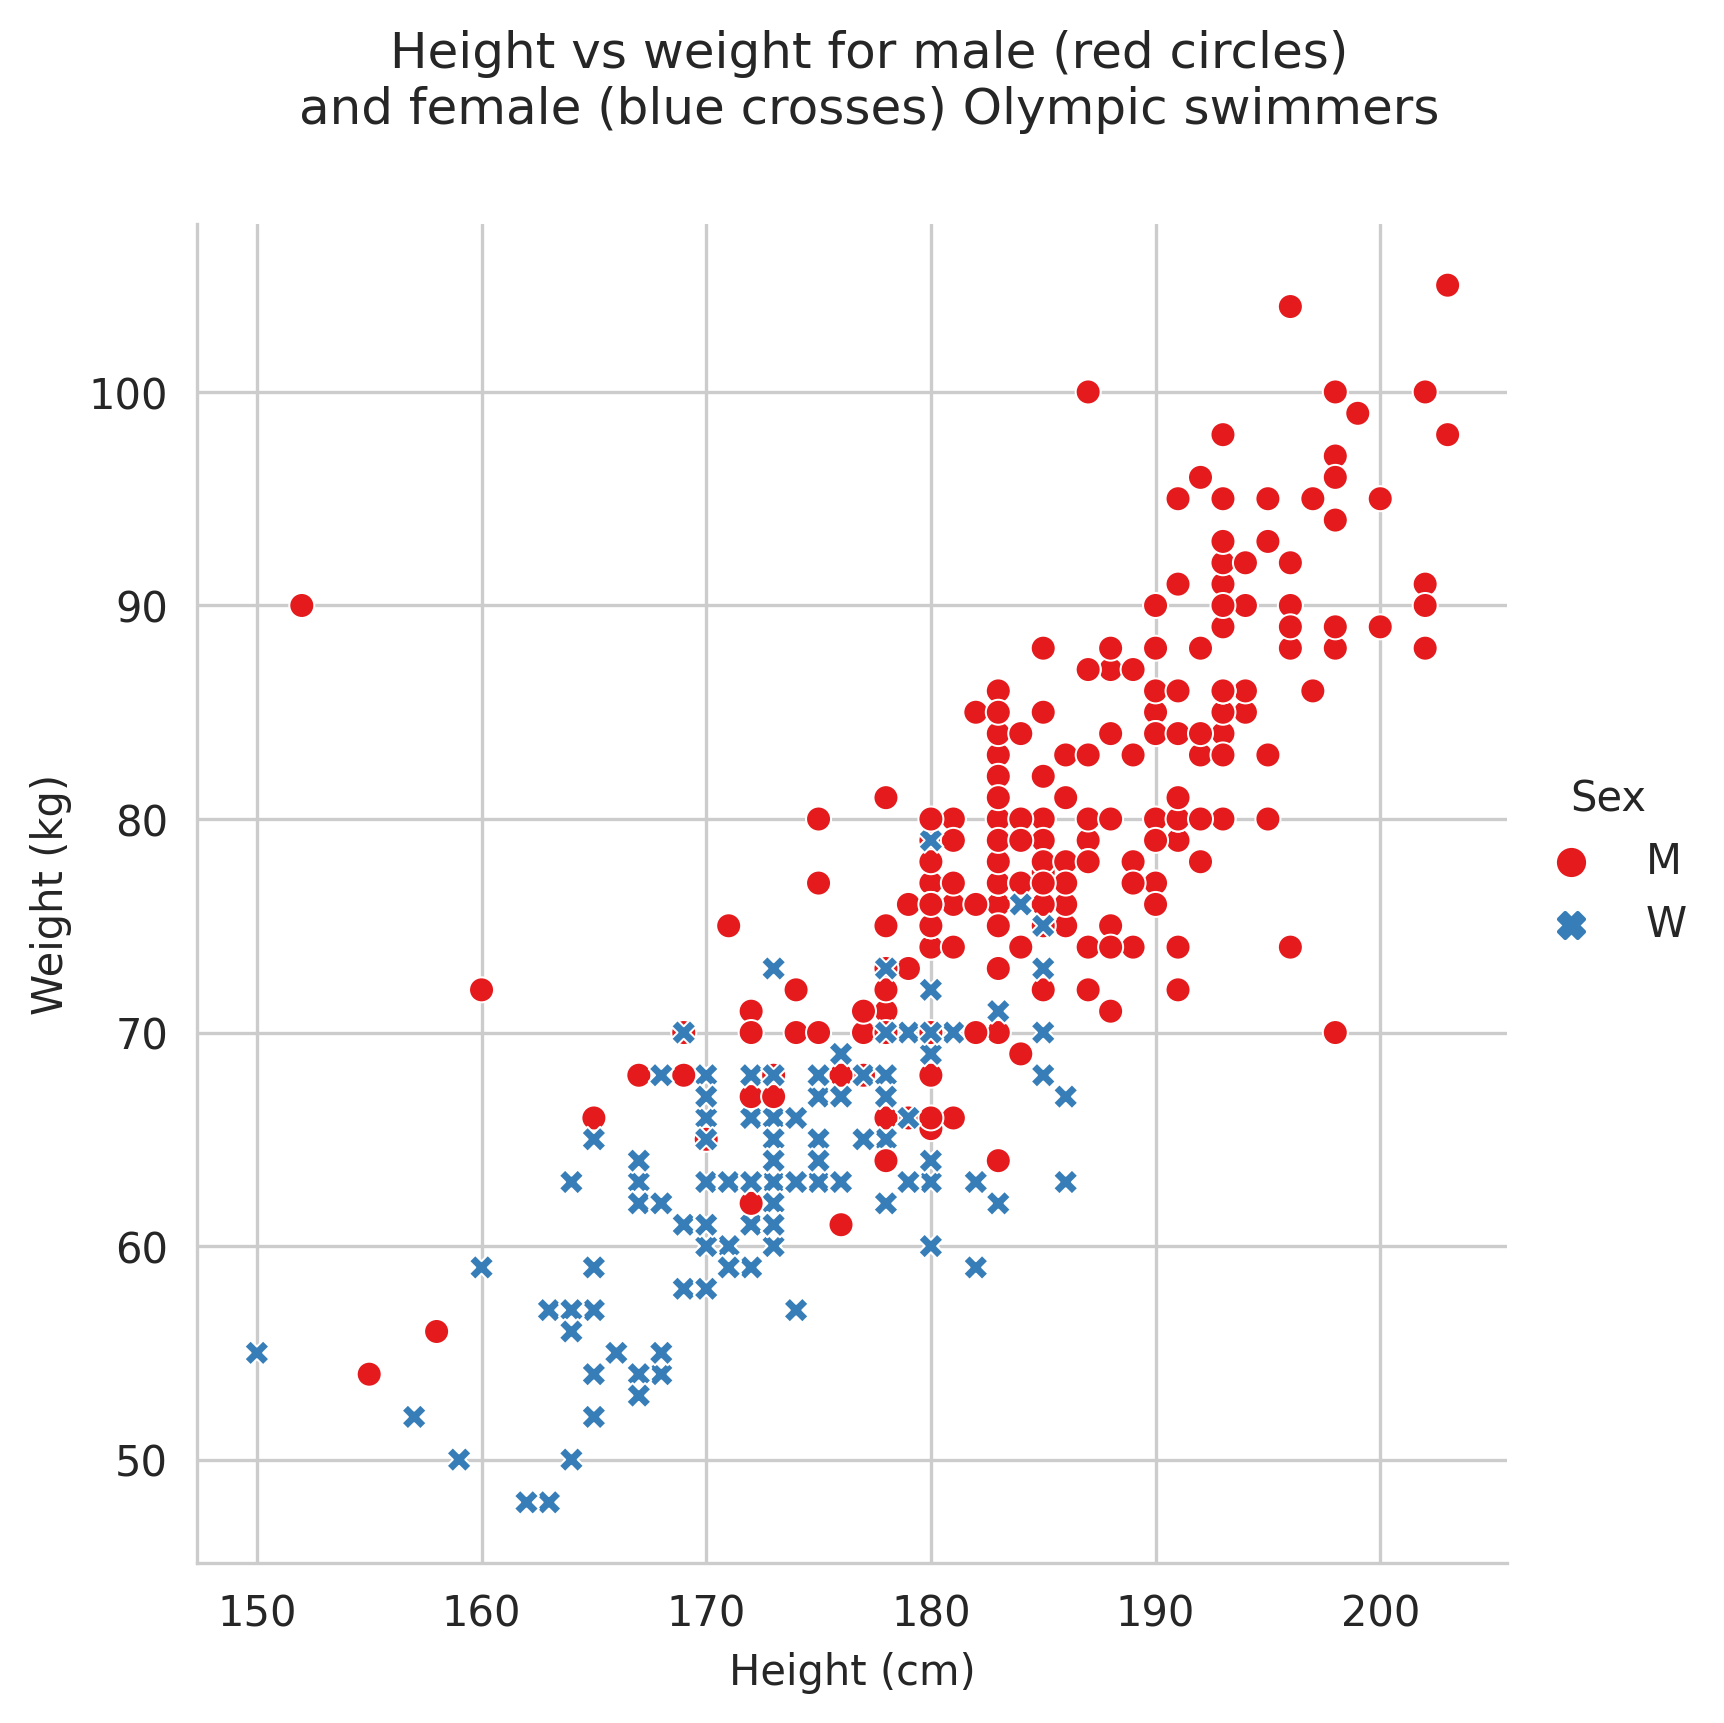

In [30]:
# color_and_marker.py

g = sns.relplot(
    data=athletes,
    x="Height (cm)",
    y="Weight (kg)",
    hue="Sex",
    palette="Set1",
    style="Sex",
)
g.fig.suptitle(
    "Height vs weight for male (red circles)\nand female (blue crosses) Olympic swimmers",
    y=1.1,
)

Here we have red circles for male athletes and blue crosses for female ones. Of course, this means that we can't use color to display a third variable as we've done before. 

For numerical columns, it may be useful to use color and size together:

Text(0.5, 1.0, "Mens' 400m freestyle times in each Olympic year")

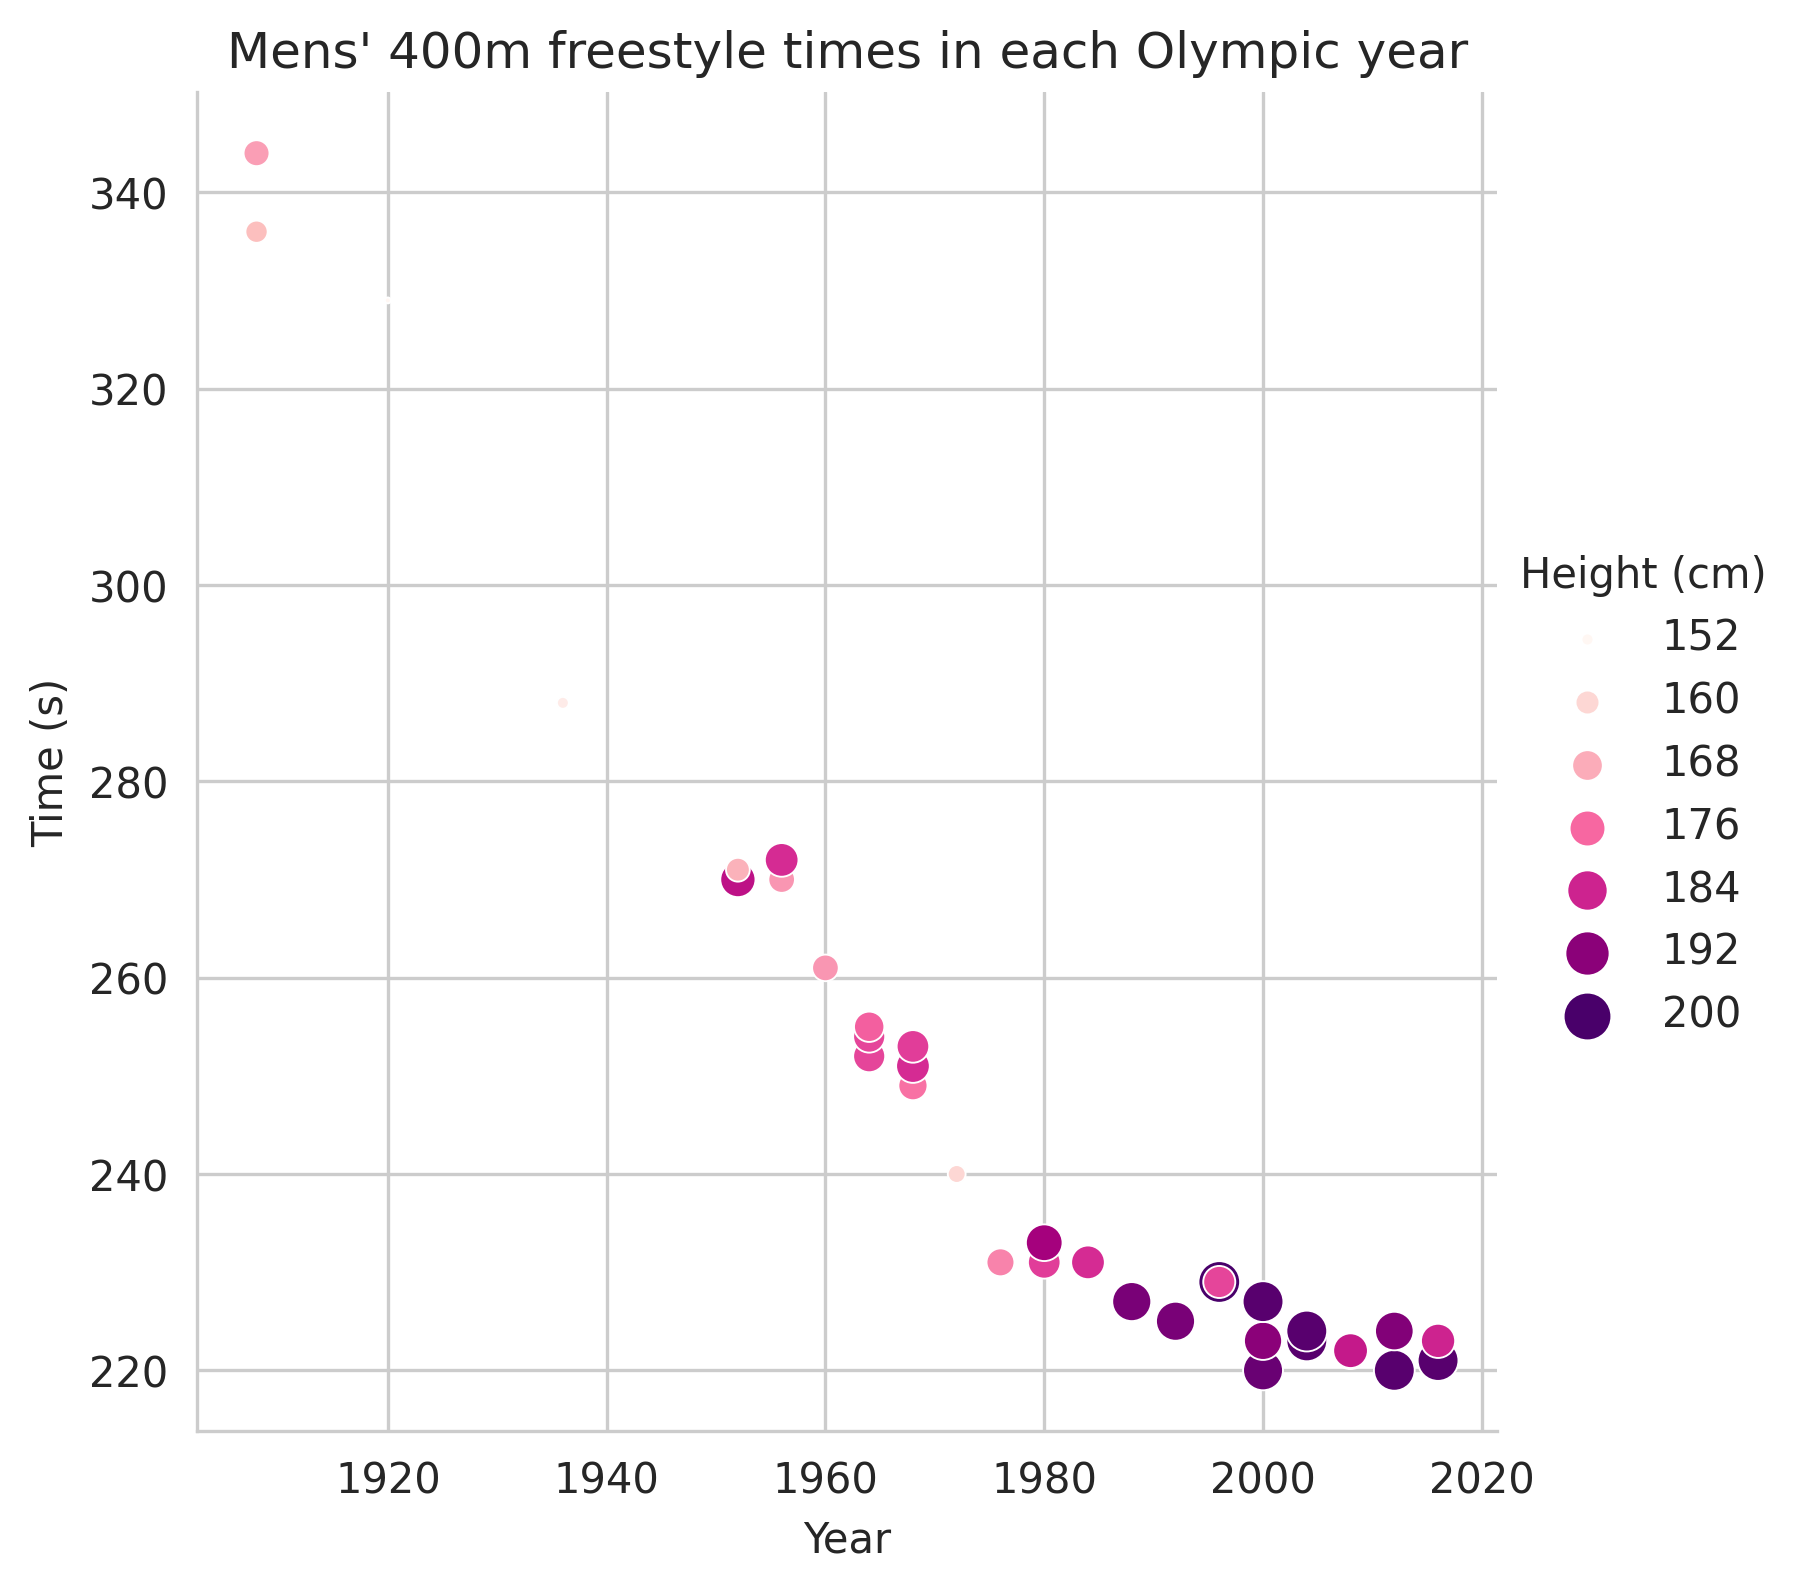

In [31]:
# color_and_size.py

sns.relplot(
    data=mens_400m_freestyle,
    x="Year",
    y="Time (s)",
    hue="Height (cm)",
    palette="RdPu",
    size="Height (cm)",
    sizes=(2, 100),
)
plt.title("Mens' 400m freestyle times in each Olympic year")

This will doubly emphasize the largest values, which are now represented by points that are both bigger and more saturated.

We can do a similar thing by combining color with style in point plots by setting the `linestyles` argument to a list of strings representing the styles that we want:

Text(0.5, 1.0, 'Mean and standard deviation of 400m freestyle times\nfor each year for male and female Olympic swimmers')

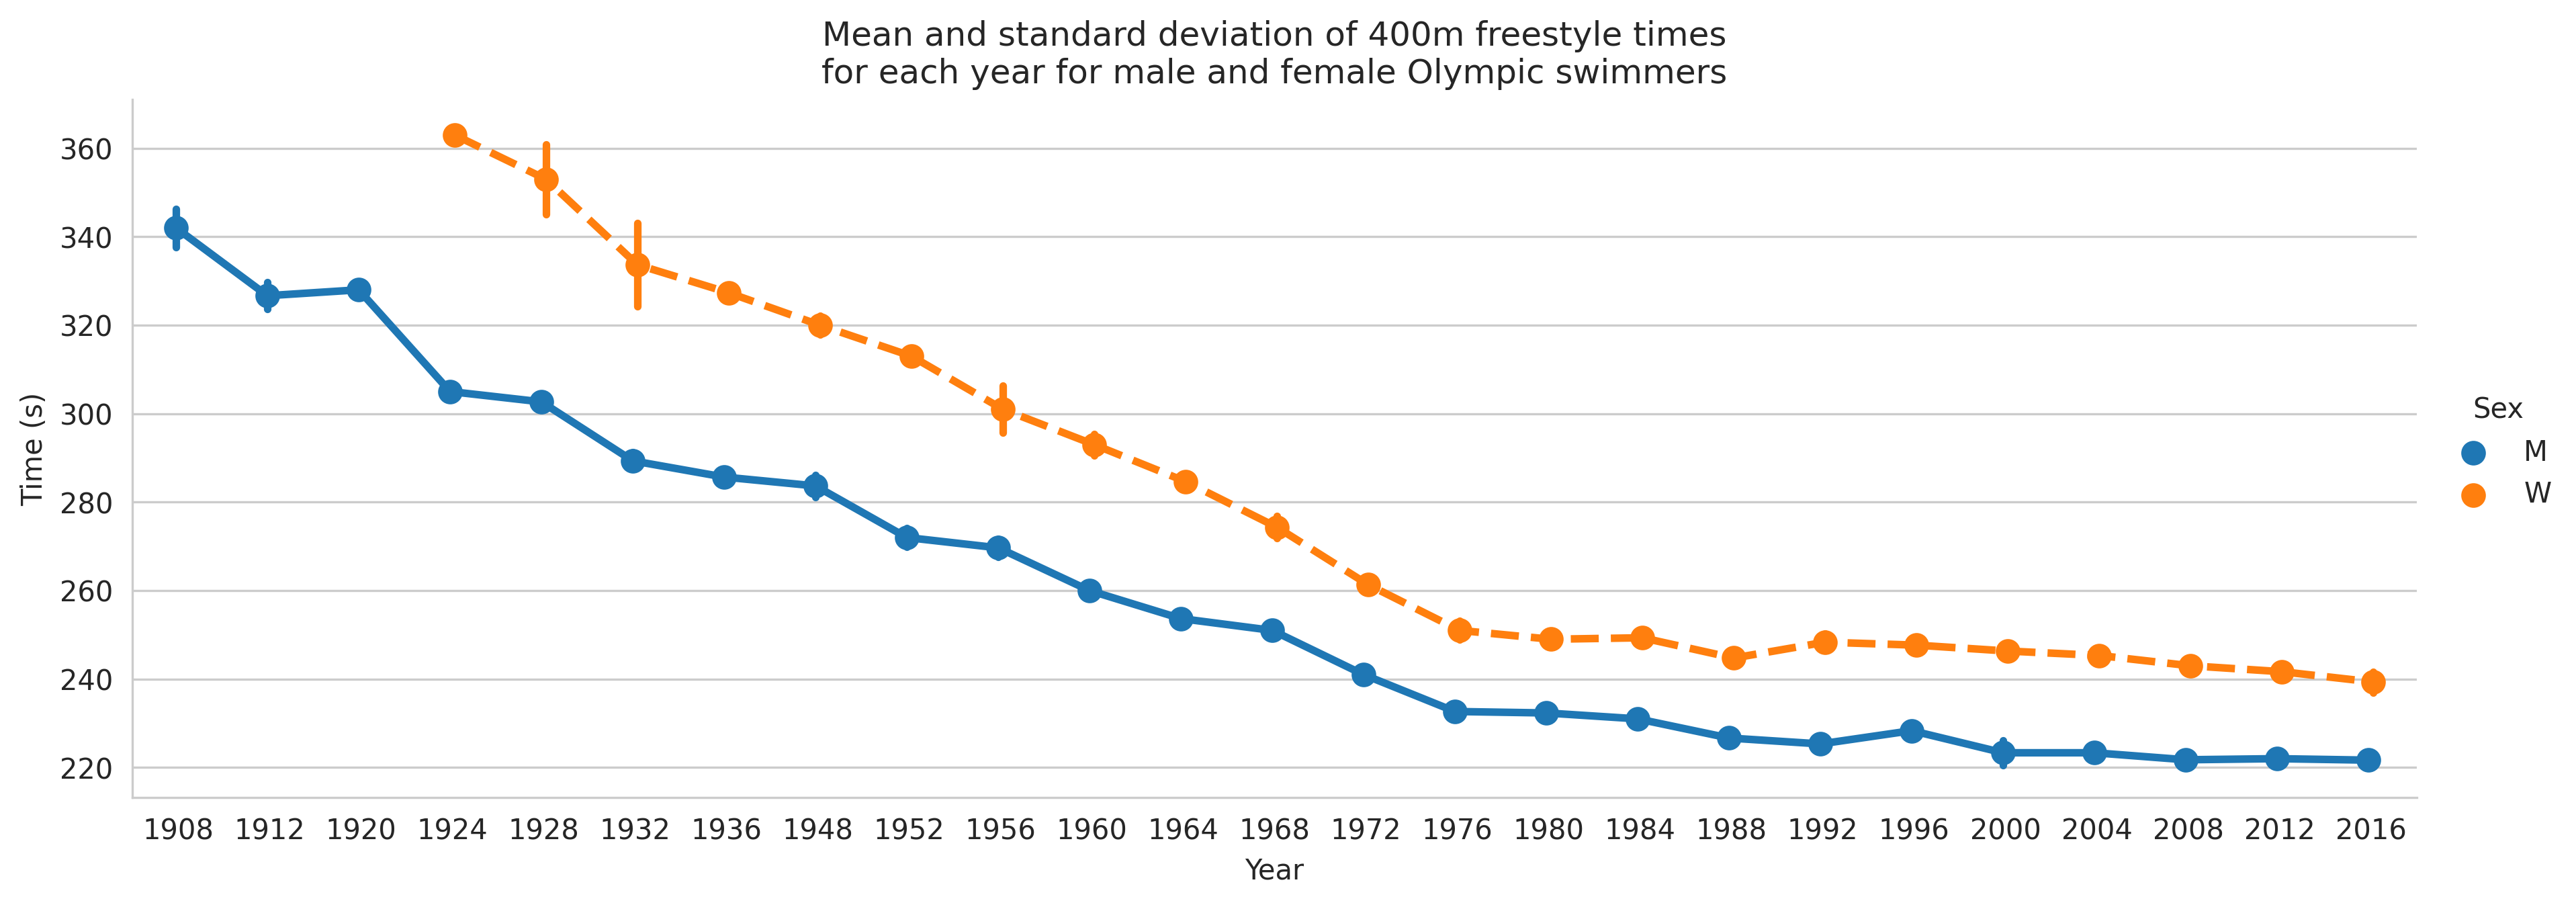

In [32]:
# color_and_style.py

sns.catplot(
    data=swimming[
        (swimming["Distance (m)"] == 400) & (swimming["Stroke"] == "freestyle")
    ],
    x="Year",
    y="Time (s)",
    kind="point",
    hue="Sex",
    linestyles=["-", "--"],
    aspect=3,
    height=4,
    dodge=True,
    orient="v",
    ci="sd",
)

plt.title(
    """Mean and standard deviation of 400m freestyle times
for each year for male and female Olympic swimmers""",
)

or in line plots by setting the `style` argument to the same column as `hue`:

Text(0.5, 1.0, 'Mean daily temperature for each day of the year\nsince 1960 in Berlin and Edinburgh')

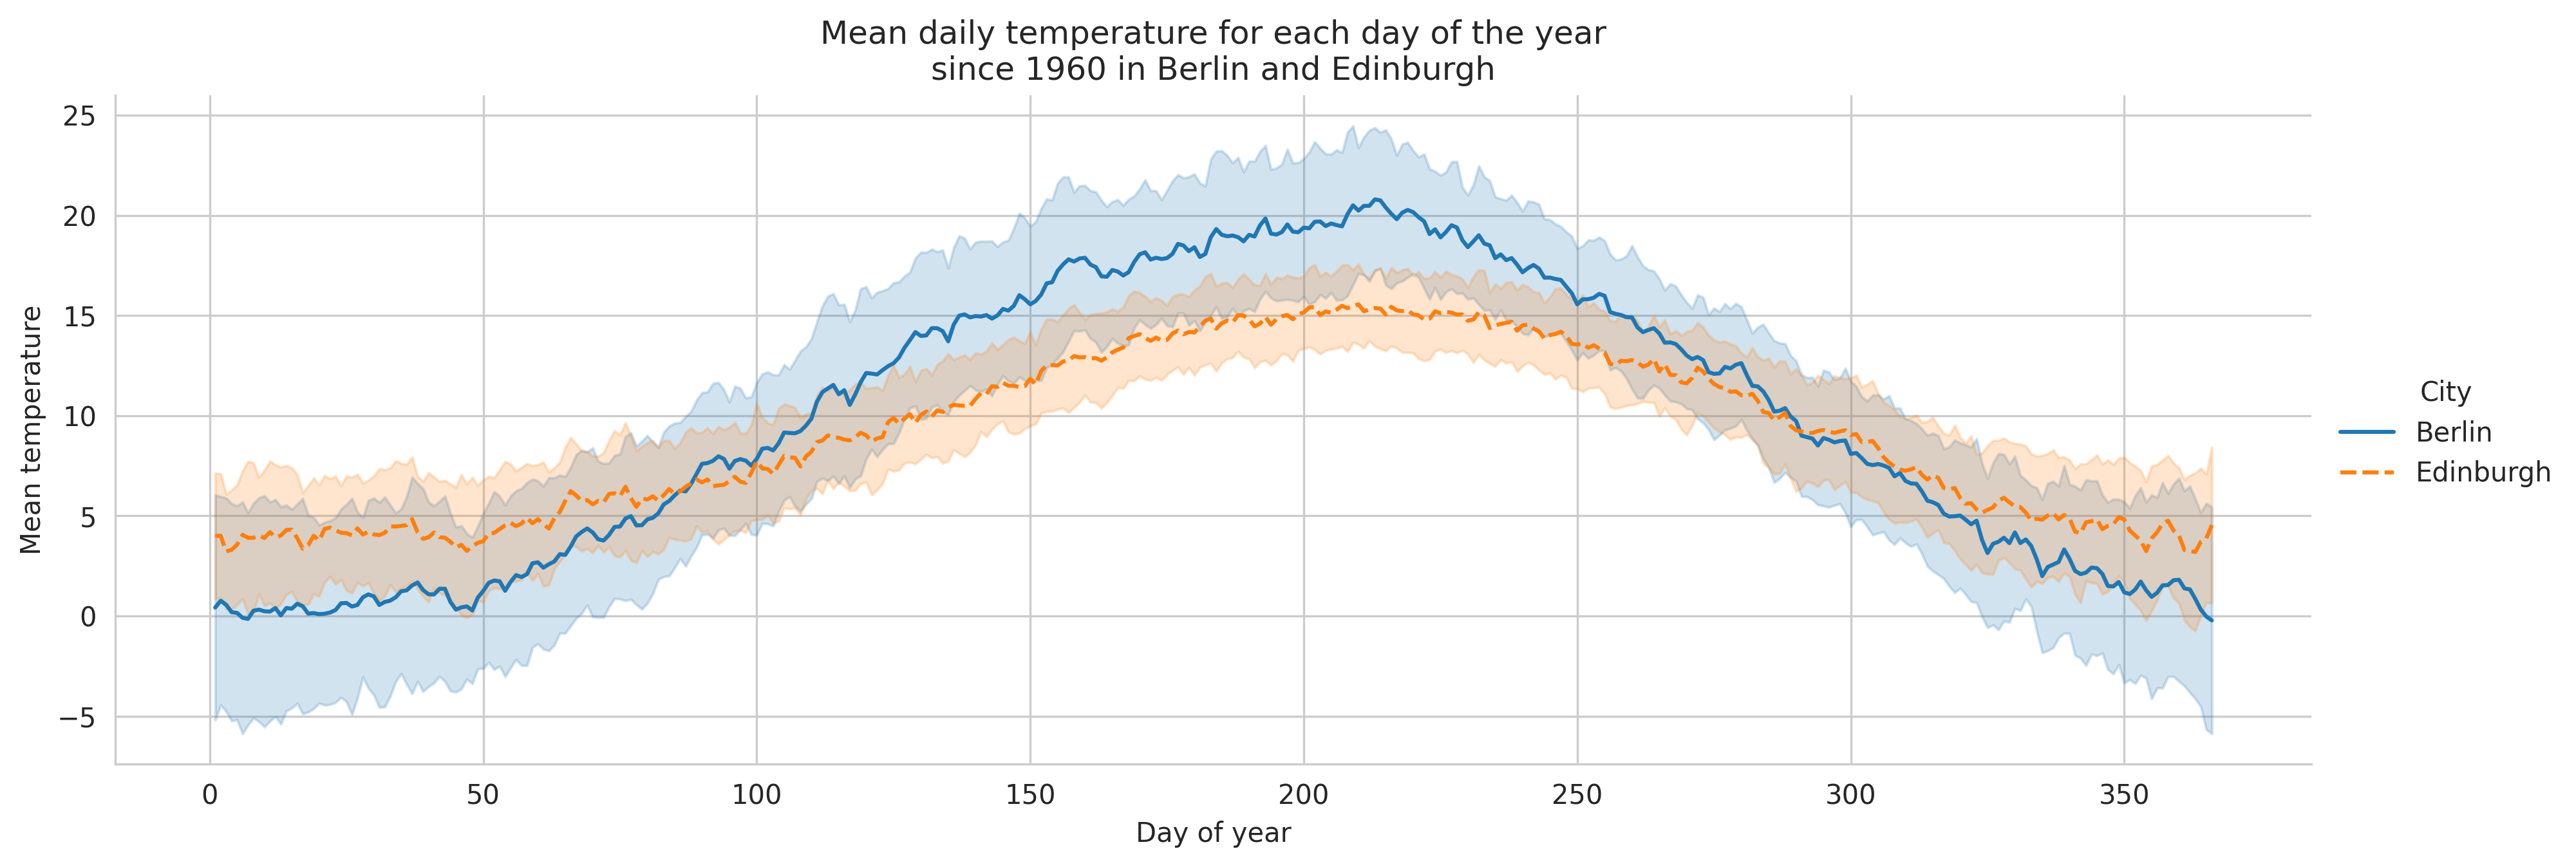

In [33]:
# color_and_style_line.py

sns.relplot(
    data=weather[weather["City"].isin(["Berlin", "Edinburgh"])],
    x="Day of year",
    y="Mean temperature",
    hue="City",
    aspect=3,
    height=4,
    kind="line",
    style="City",
    ci="sd",
)

plt.title(
    "Mean daily temperature for each day of the year\nsince 1960 in Berlin and Edinburgh"
)

This only works well for small numbers of different styles. 

Another way that we can use color redundantly is to use it to display some extra information about a category. Let's look at female swimmers this time, and add an event column:

In [34]:
women = swimming[swimming["Sex"] == "W"]
women["Event"] = swimming["Distance (m)"].astype(str) + " " + swimming["Stroke"]
women

Name Country   Age Sex  Height (cm)  ...   Medal  \
22              Fanny Durack     ANZ  <NA>   W          NaN  ...    Gold   
23          Wilhelmina Wylie     ANZ    20   W          NaN  ...  Silver   
24           Jennie Fletcher     GBR  <NA>   W          NaN  ...  Bronze   
40         Ethelda Bleibtrey     USA  <NA>   W          NaN  ...    Gold   
41               Irene Guest     USA  <NA>   W          NaN  ...  Silver   
...                      ...     ...   ...  ..          ...  ...     ...   
1297          Penny Oleksiak     CAN  <NA>   W          NaN  ...  Silver   
1298            Dana Vollmer     USA  <NA>   W          NaN  ...  Bronze   
1303  Mireia Belmonte Garcia     ESP  <NA>   W          NaN  ...    Gold   
1304         Madeline Groves     AUS    21   W        179.0  ...  Silver   
1305           Natsumi Hoshi     JPN    25   W        164.0  ...  Bronze   

     Time (s)  Distance (m)     Stroke          Event  
22       82.0           100  freestyle  100 freestyle  
23       85.0           100  freestyle  100 freestyle  
24       87.0           100  freestyle  100 freestyle  
40       73.0           100  freestyle  100 freestyle  
41       77.0           100  freestyle  100 freestyle  
...       ...           ...        ...            ...  
1297     56.0           100  butterfly  100 butterfly  
1298     56.0           100  butterfly  100 butterfly  
1303    124.0           200  butterfly  200 butterfly  
1304    124.0           200  butterfly  200 butterfly  
1305    125.0           200  butterfly  200 butterfly  

[618 rows x 13 columns]

This will allow us to make a bar chart showing the times:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '100 freestyle'),
  Text(1, 0, '400 freestyle'),
  Text(2, 0, '100 backstroke'),
  Text(3, 0, '200 breaststroke'),
  Text(4, 0, '100 butterfly'),
  Text(5, 0, '400 medley'),
  Text(6, 0, '200 freestyle'),
  Text(7, 0, '800 freestyle'),
  Text(8, 0, '200 medley'),
  Text(9, 0, '200 backstroke'),
  Text(10, 0, '100 breaststroke'),
  Text(11, 0, '200 butterfly'),
  Text(12, 0, '50 freestyle')])

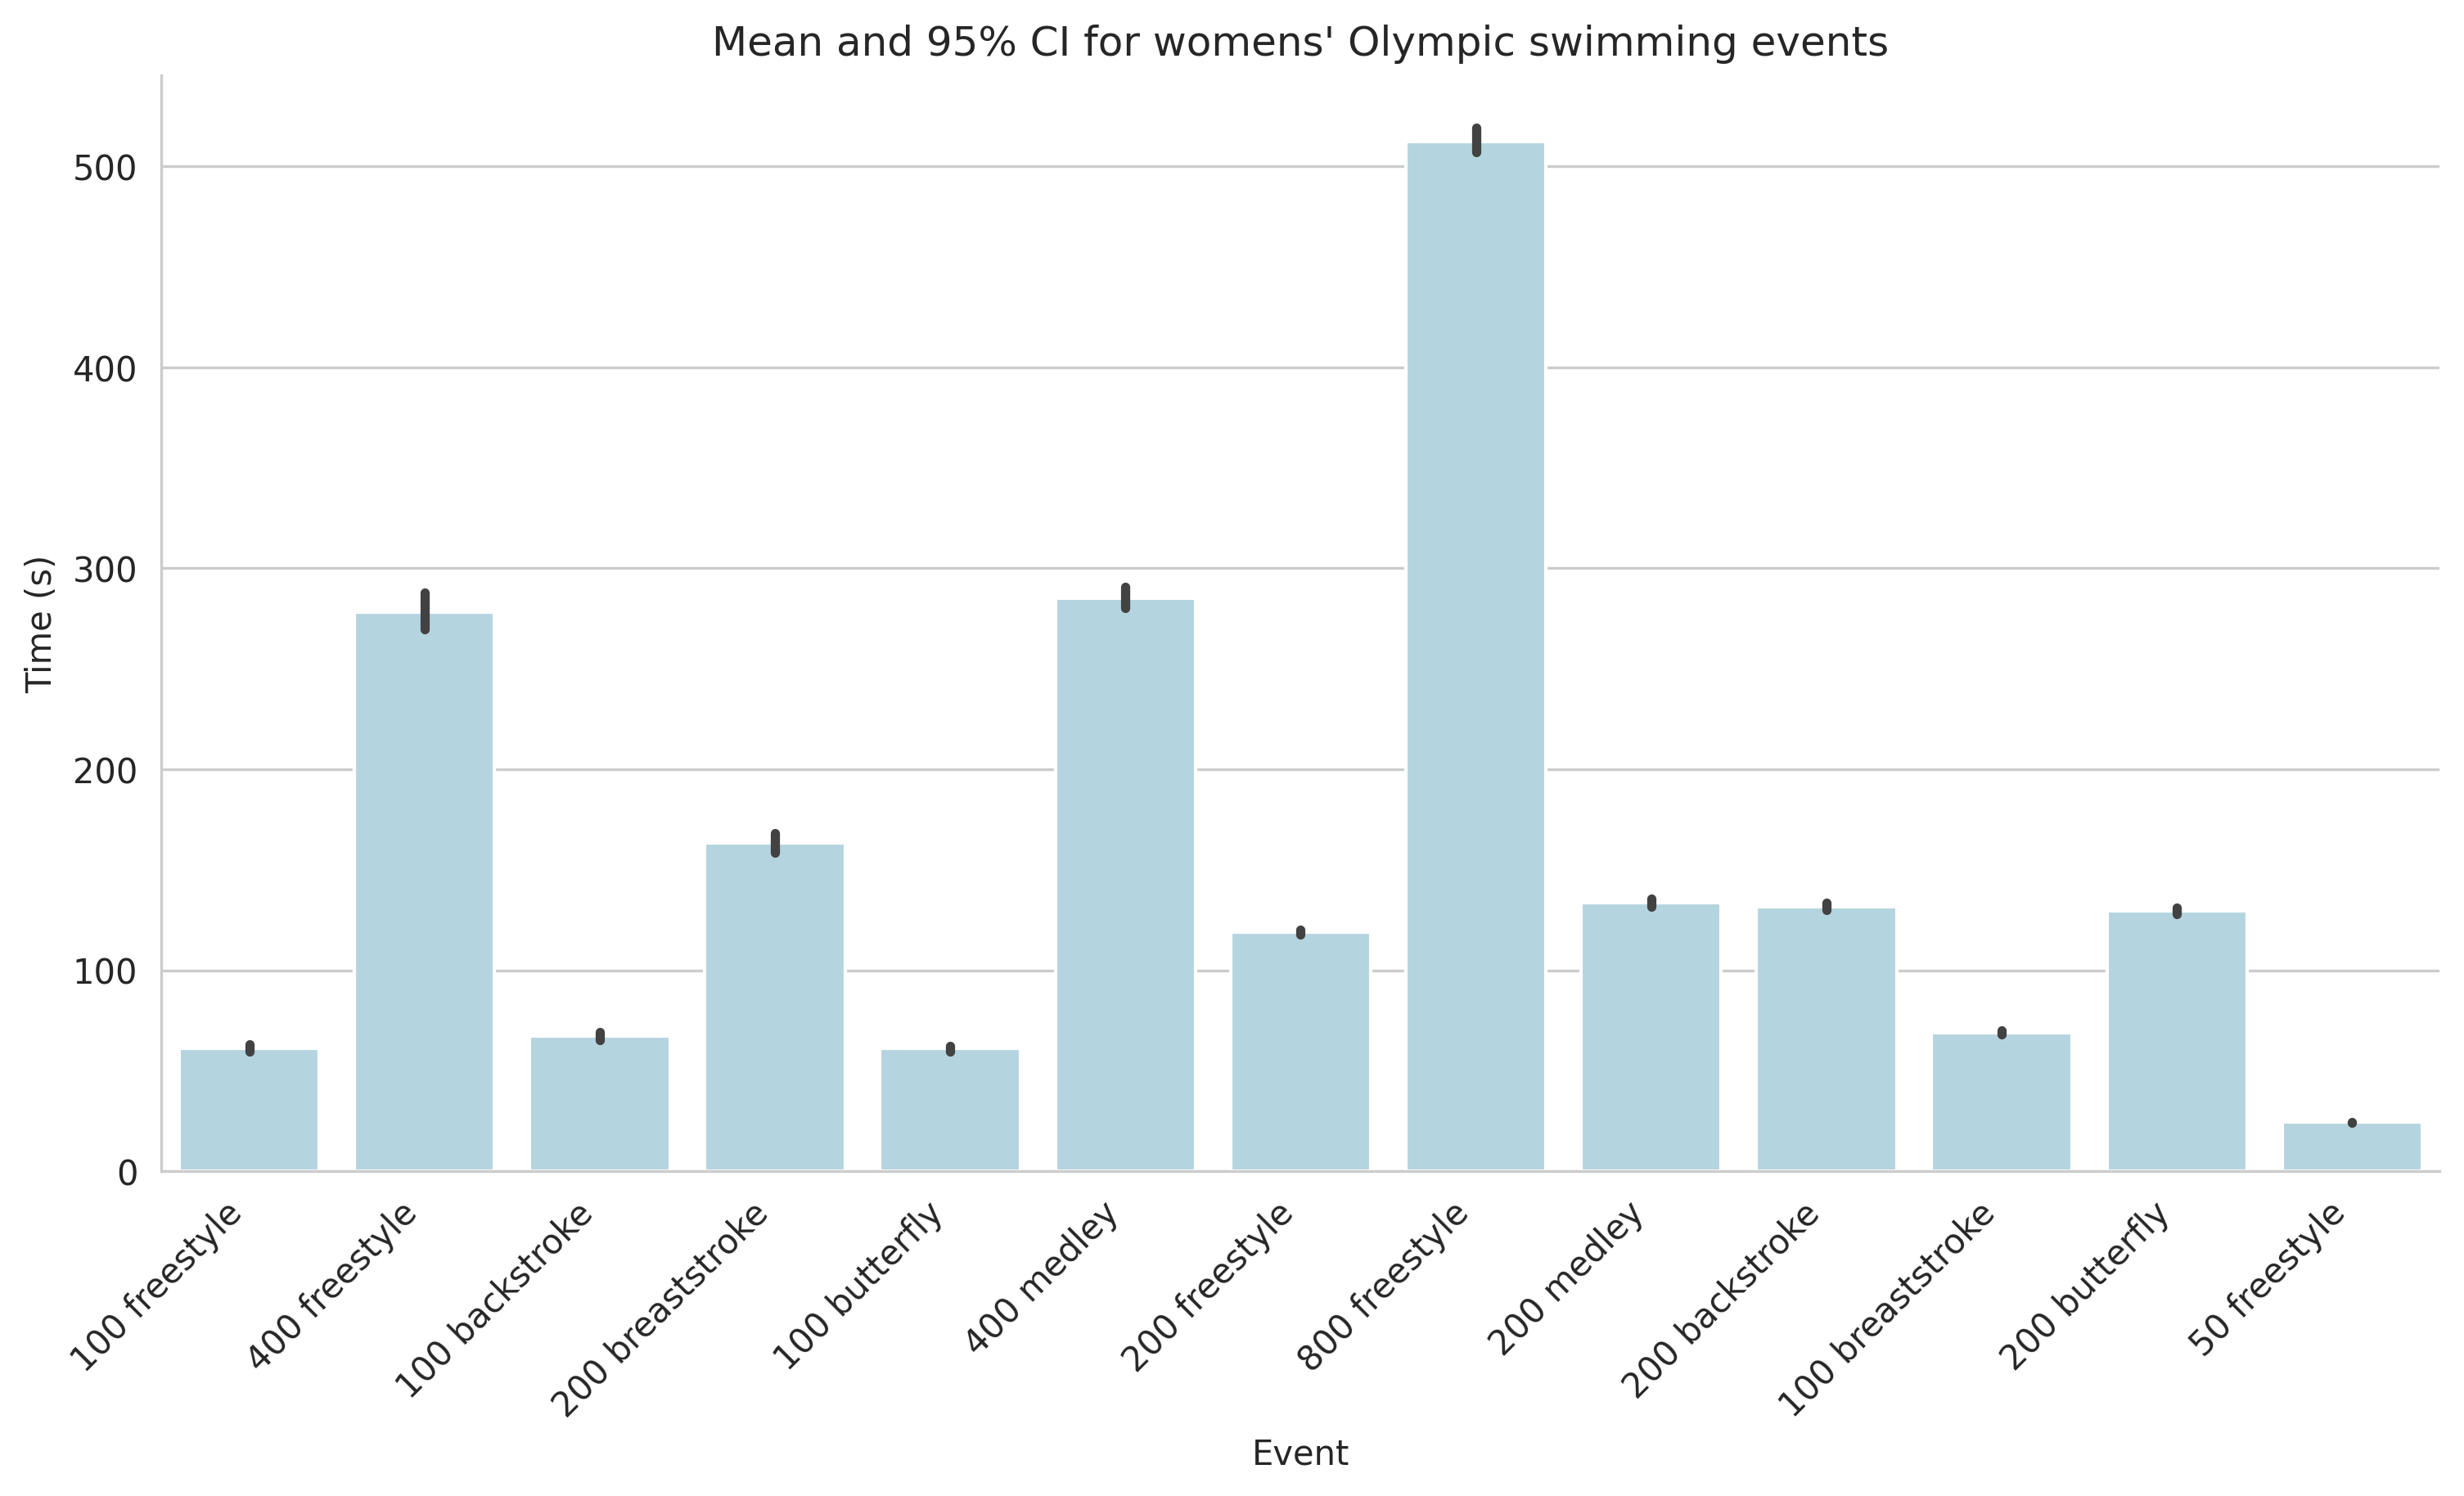

In [35]:
sns.catplot(
    data=women,
    kind="bar",
    x="Event",
    y="Time (s)",
    aspect=2,
    color="lightblue",
    orient="v",
)
plt.title("Mean and 95% CI for womens' Olympic swimming events")
plt.xticks(rotation=45, horizontalalignment="right")

Each event has the stroke as part of its name, and so in principle we could figure out which stoke each bar belongs to by reading its X axis label. It would be much easier, however, if we used color to represent stroke:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '100 freestyle'),
  Text(1, 0, '400 freestyle'),
  Text(2, 0, '100 backstroke'),
  Text(3, 0, '200 breaststroke'),
  Text(4, 0, '100 butterfly'),
  Text(5, 0, '400 medley'),
  Text(6, 0, '200 freestyle'),
  Text(7, 0, '800 freestyle'),
  Text(8, 0, '200 medley'),
  Text(9, 0, '200 backstroke'),
  Text(10, 0, '100 breaststroke'),
  Text(11, 0, '200 butterfly'),
  Text(12, 0, '50 freestyle')])

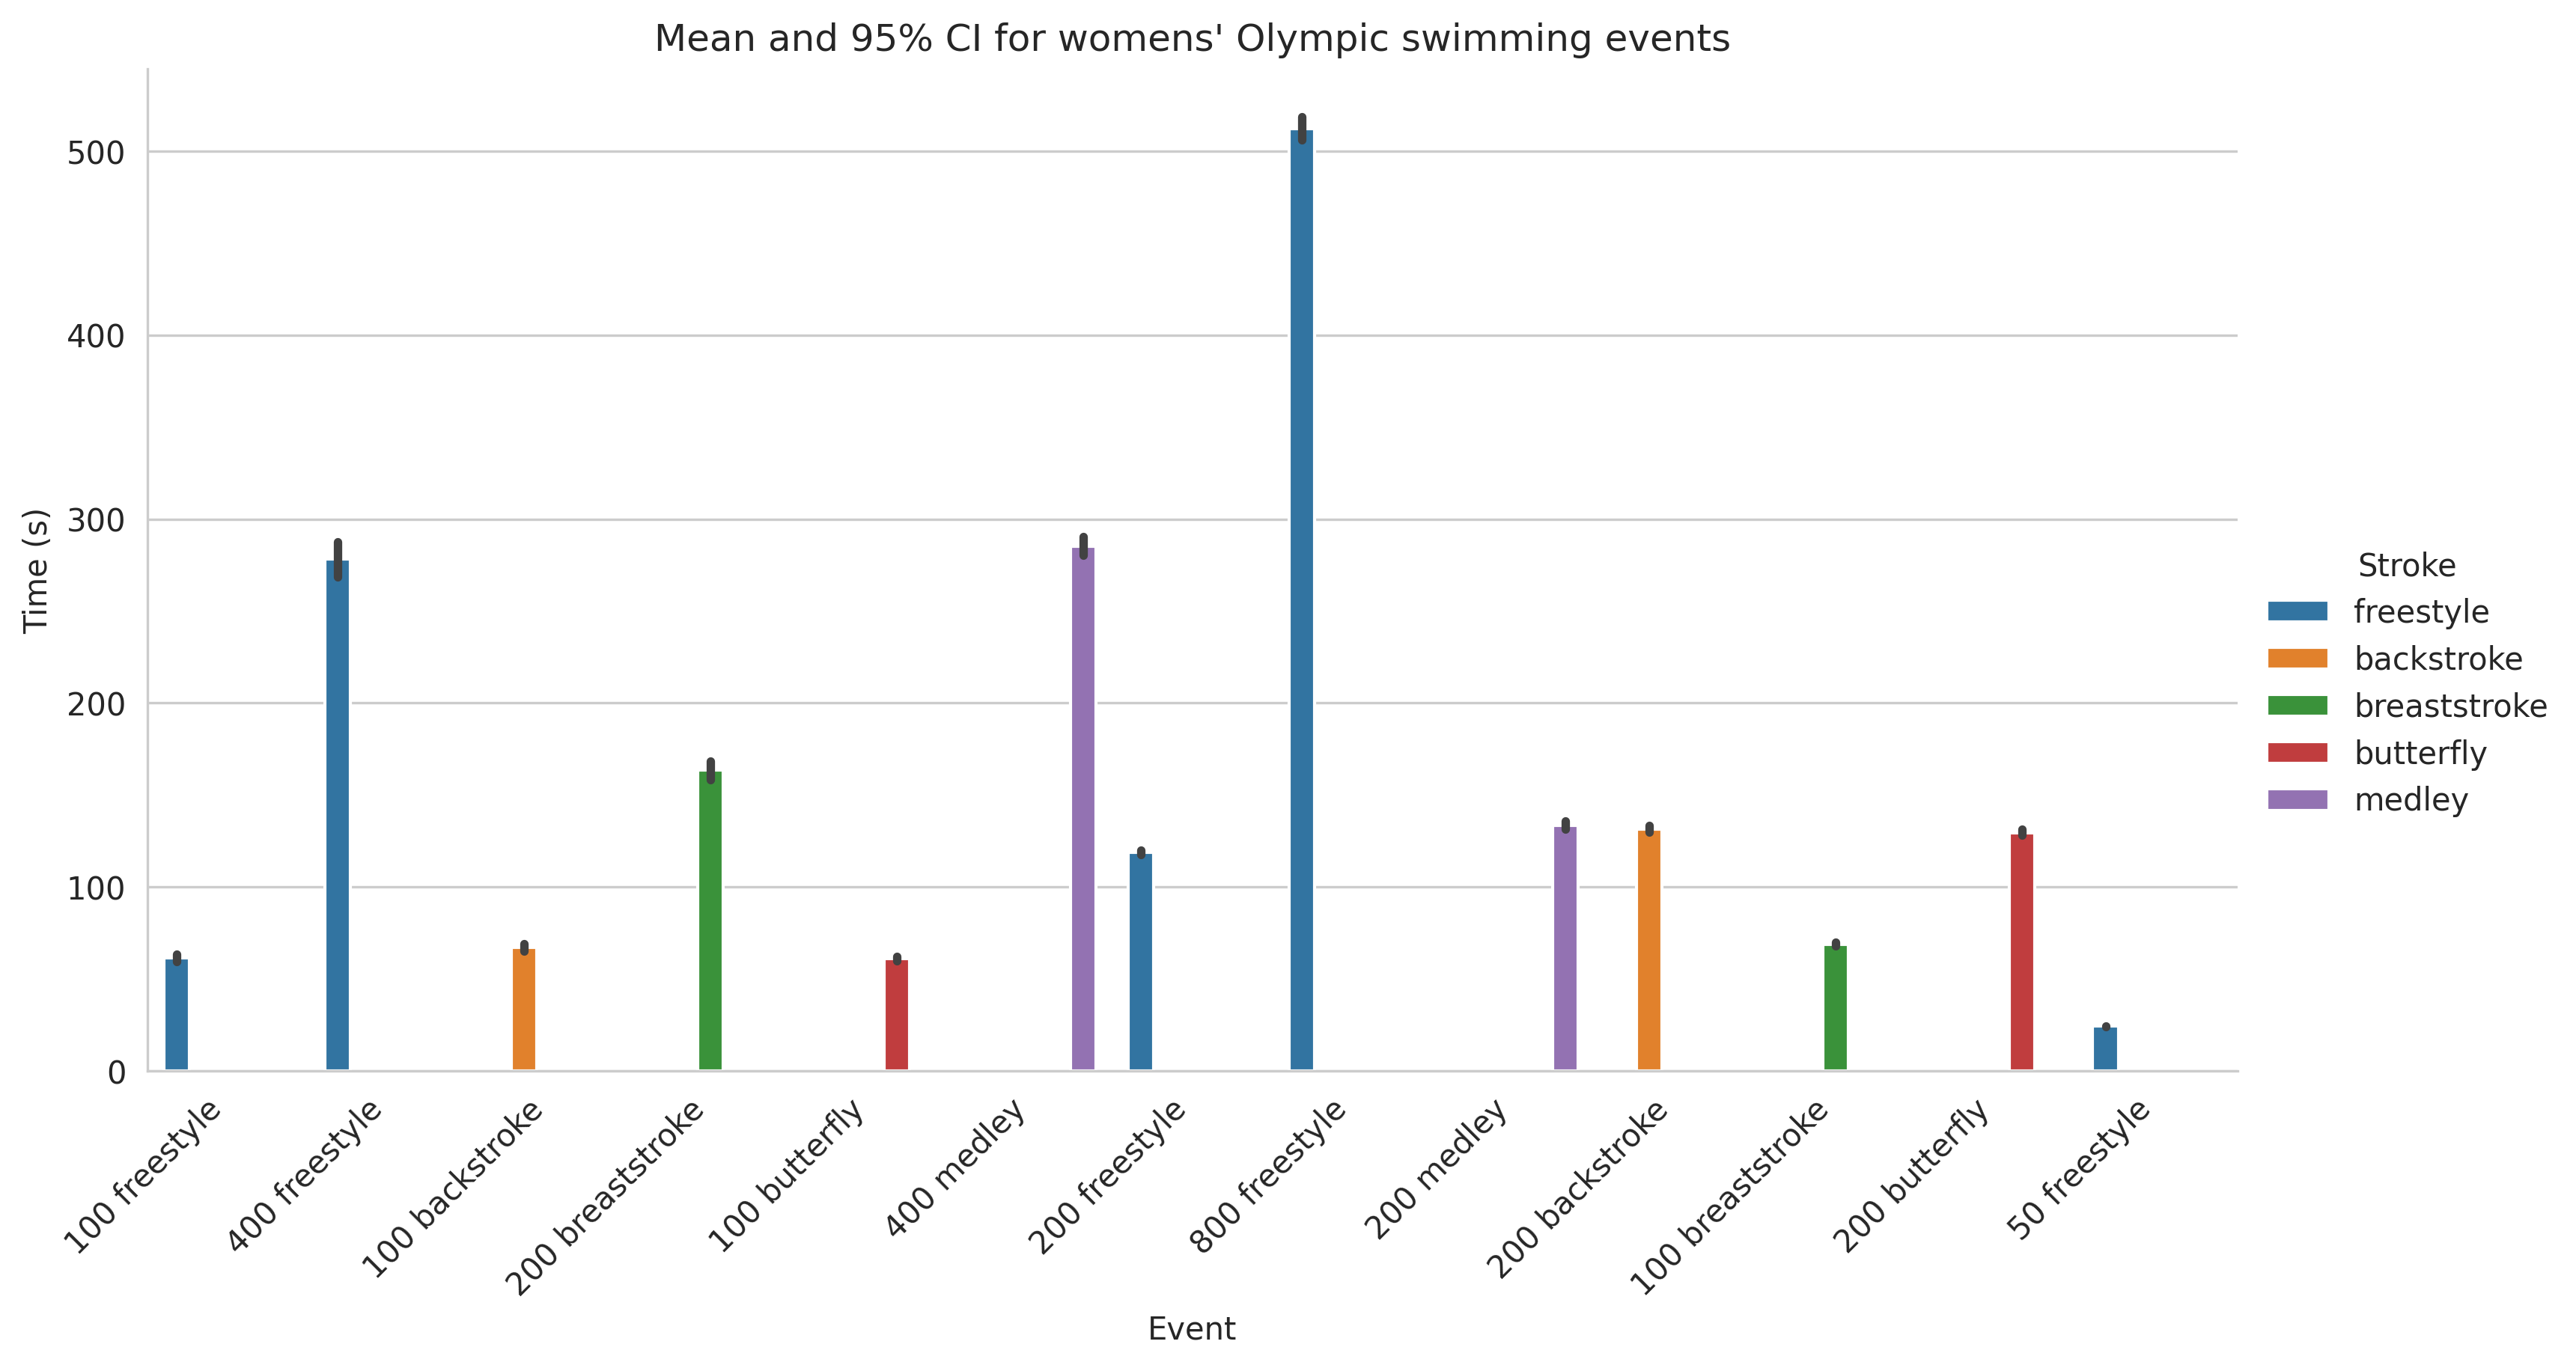

In [36]:
sns.catplot(
    data=women, kind="bar", x="Event", y="Time (s)", aspect=2, hue="Stroke", orient="v",
)
plt.title("Mean and 95% CI for womens' Olympic swimming events")
plt.xticks(rotation=45, horizontalalignment="right")

Notice the problem with this chart: the bars are very narrow and unevenly spaced. This is because seaborn doesn't "know" that each event belongs to one stroke, so it is leaving enough space for 5 bars - one per stroke - at each X axis label. To avoid this, set `dodge` to `False`:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '100 freestyle'),
  Text(1, 0, '400 freestyle'),
  Text(2, 0, '100 backstroke'),
  Text(3, 0, '200 breaststroke'),
  Text(4, 0, '100 butterfly'),
  Text(5, 0, '400 medley'),
  Text(6, 0, '200 freestyle'),
  Text(7, 0, '800 freestyle'),
  Text(8, 0, '200 medley'),
  Text(9, 0, '200 backstroke'),
  Text(10, 0, '100 breaststroke'),
  Text(11, 0, '200 butterfly'),
  Text(12, 0, '50 freestyle')])

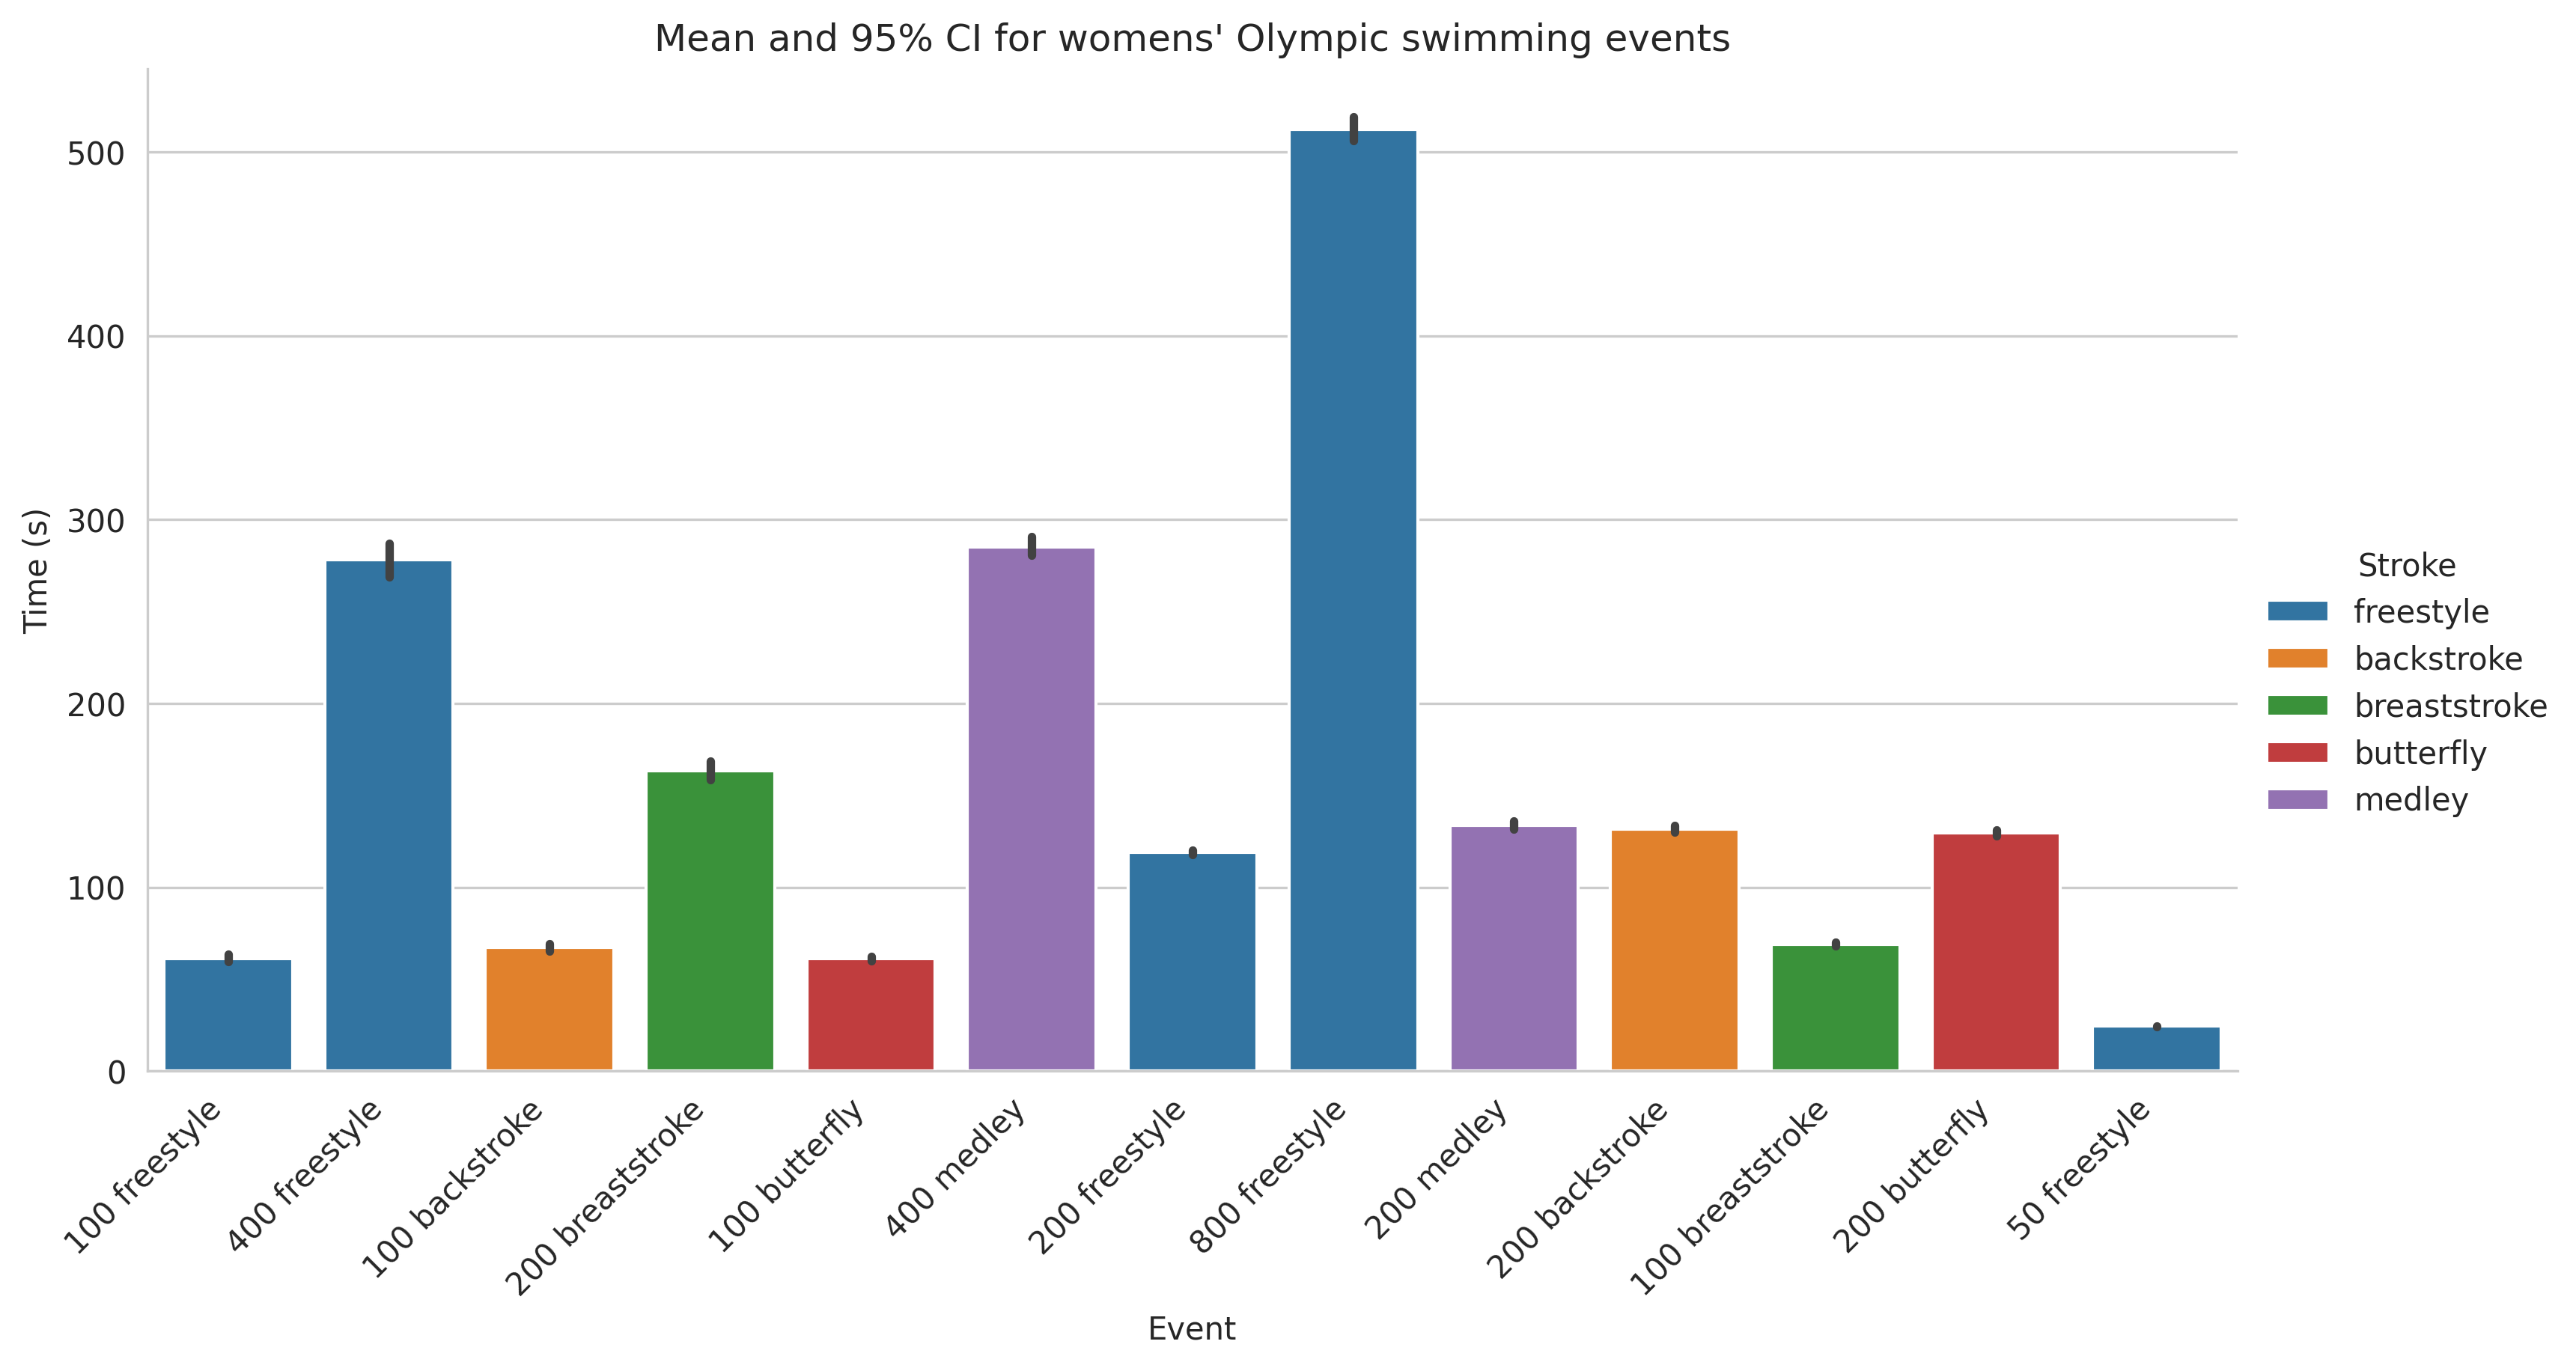

In [37]:
# color_as_category.py

sns.catplot(
    data=women,
    kind="bar",
    x="Event",
    y="Time (s)",
    aspect=2,
    hue="Stroke",
    dodge=False,
    orient="v",
)
plt.title("Mean and 95% CI for womens' Olympic swimming events")
plt.xticks(rotation=45, horizontalalignment="right")

Incidentally, for this chart the default ordering on the X axis make little sense - the events appear simply in the order that they appear in the data. We can specify an order using `order` - for example, we could organize the bars by stroke:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '50 freestyle'),
  Text(1, 0, '100 freestyle'),
  Text(2, 0, '200 freestyle'),
  Text(3, 0, '400 freestyle'),
  Text(4, 0, '800 freestyle'),
  Text(5, 0, '100 backstroke'),
  Text(6, 0, '200 backstroke'),
  Text(7, 0, '100 breaststroke'),
  Text(8, 0, '200 breaststroke'),
  Text(9, 0, '100 butterfly'),
  Text(10, 0, '200 butterfly'),
  Text(11, 0, '200 medley'),
  Text(12, 0, '400 medley')])

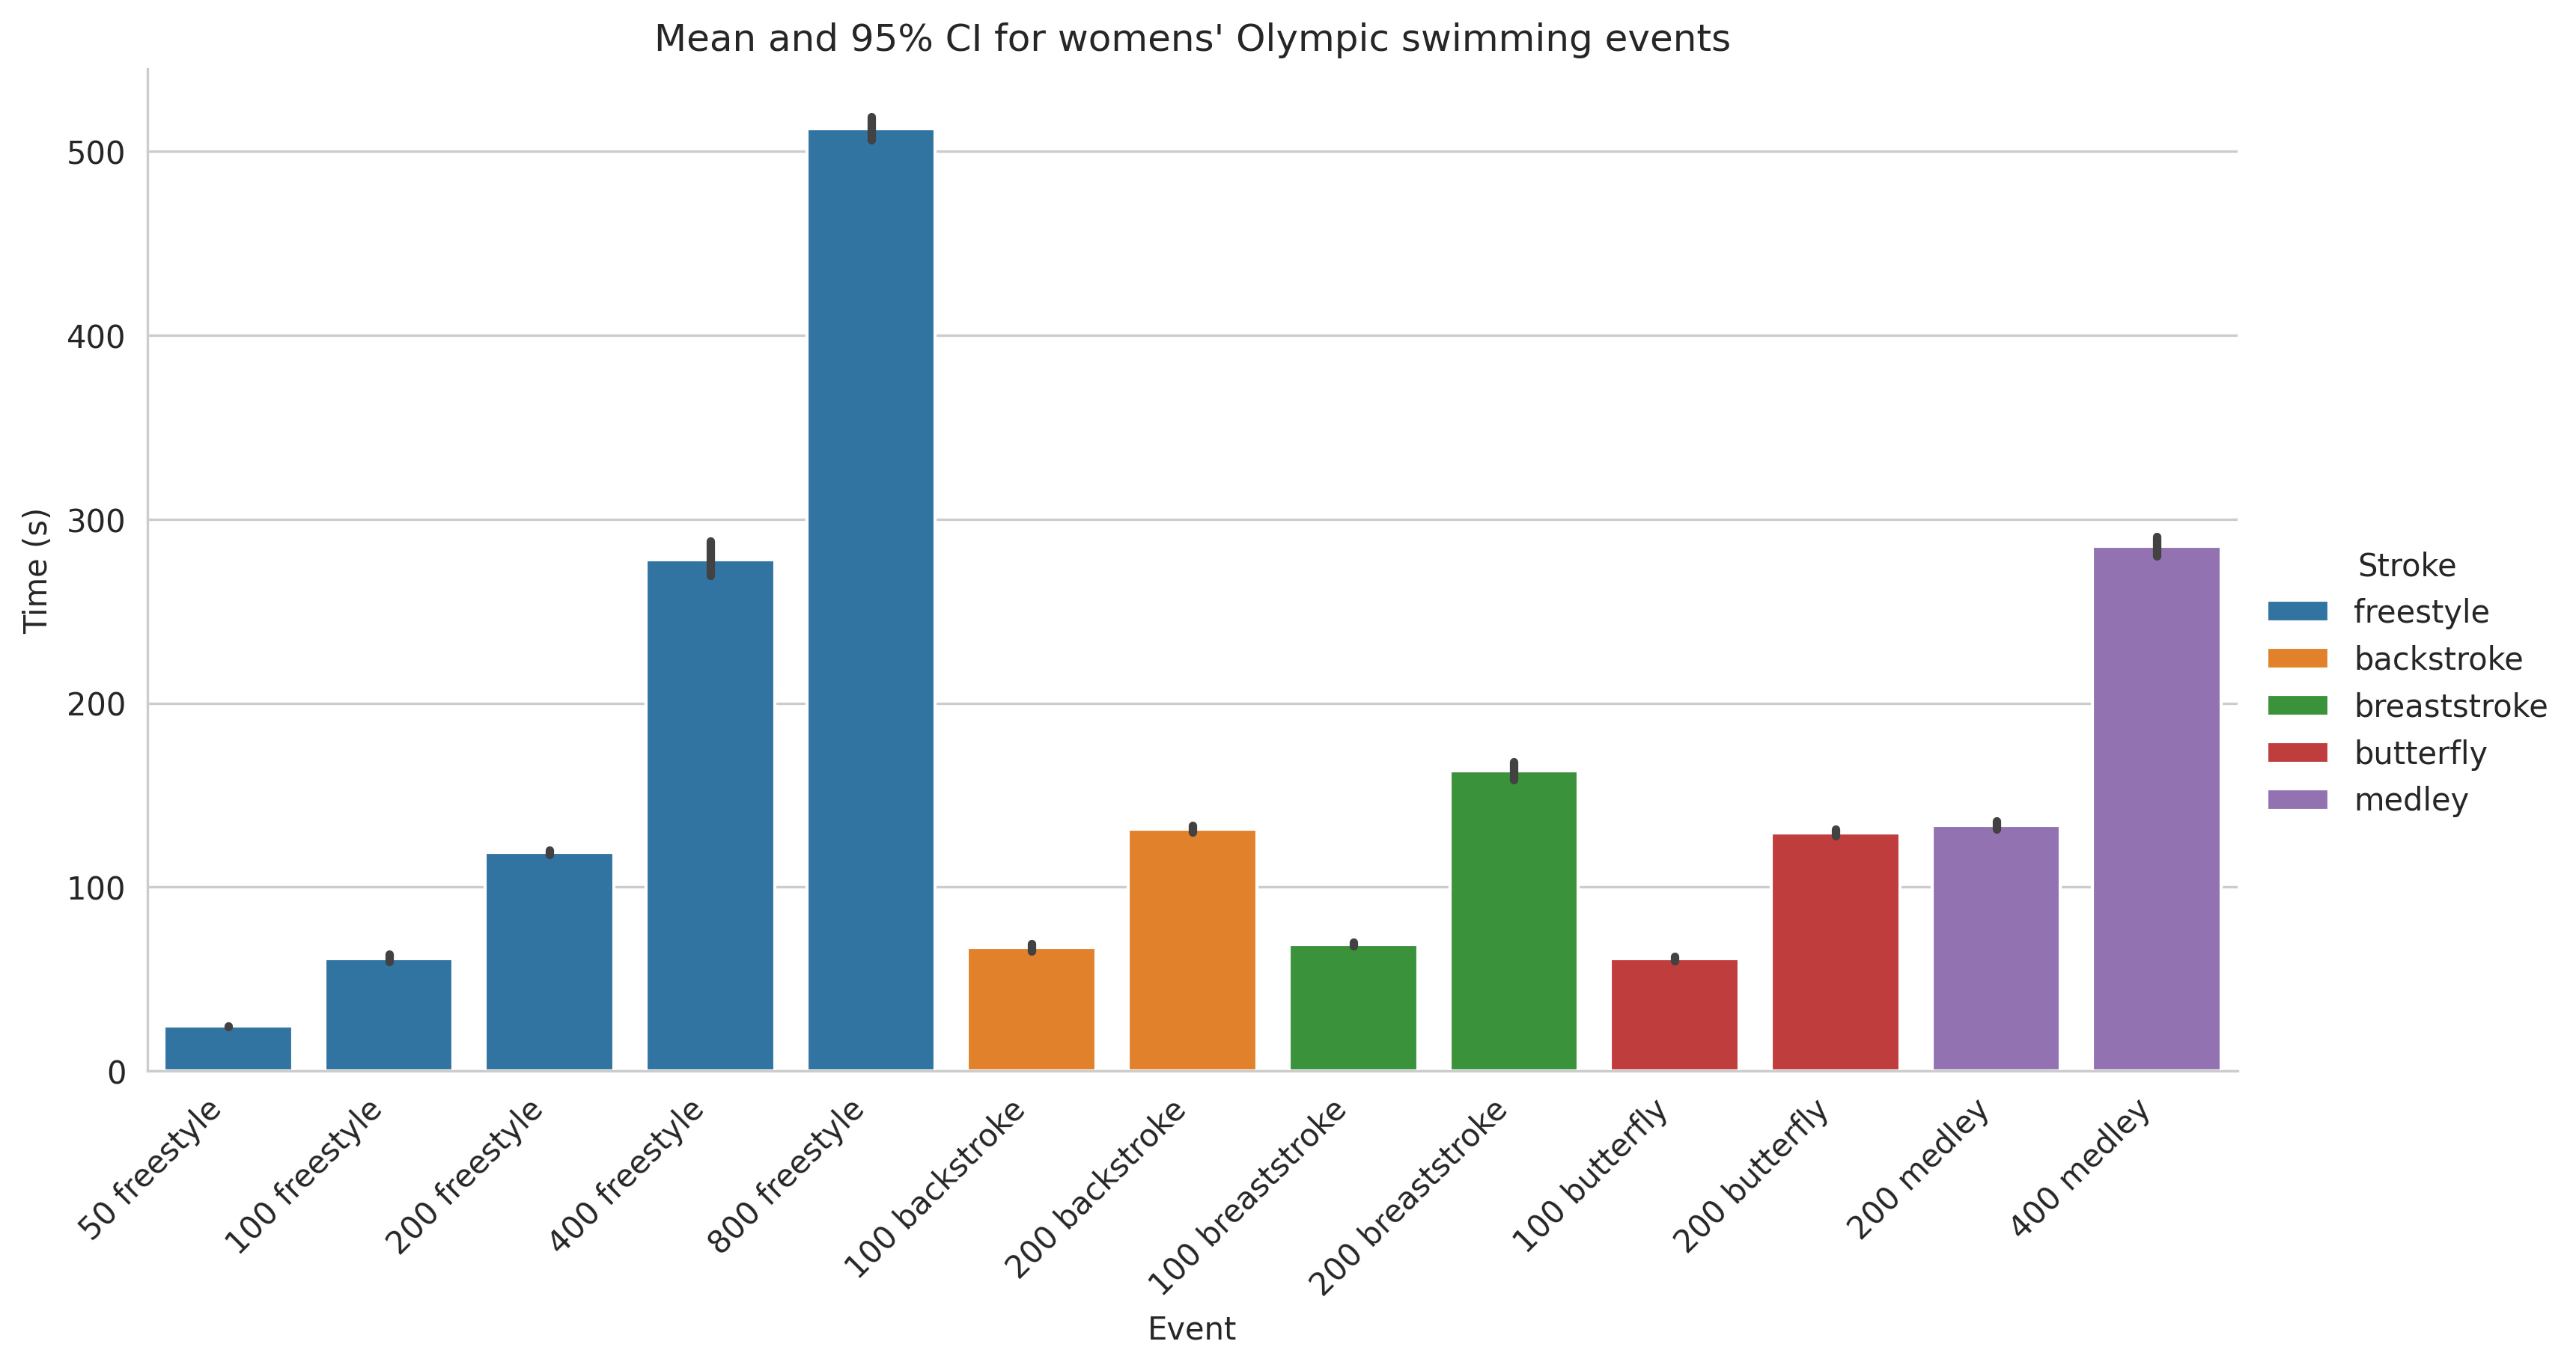

In [38]:
# ordered_labels.py

labels_order = ['50 freestyle','100 freestyle','200 freestyle','400 freestyle','800 freestyle',
                '100 backstroke','200 backstroke',
                '100 breaststroke','200 breaststroke',
                '100 butterfly','200 butterfly',
                '200 medley','400 medley']

sns.catplot(
    data=women,
    kind="bar",
    x="Event",
    y="Time (s)",
    aspect=2,
    hue='Stroke',
    dodge=False,
    orient="v",
    order = labels_order
)

plt.title("Mean and 95% CI for womens' Olympic swimming events")
plt.xticks(rotation=45, horizontalalignment="right")

or arrange the  from highest to lowest mean time. We will see how to do this programatically in a future chapter but for now we will just write a literal list:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '50 freestyle'),
  Text(1, 0, '100 butterfly'),
  Text(2, 0, '100 freestyle'),
  Text(3, 0, '100 backstroke'),
  Text(4, 0, '100 breaststroke'),
  Text(5, 0, '200 freestyle'),
  Text(6, 0, '200 butterfly'),
  Text(7, 0, '200 backstroke'),
  Text(8, 0, '200 medley'),
  Text(9, 0, '200 breaststroke'),
  Text(10, 0, '400 freestyle'),
  Text(11, 0, '400 medley'),
  Text(12, 0, '800 freestyle')])

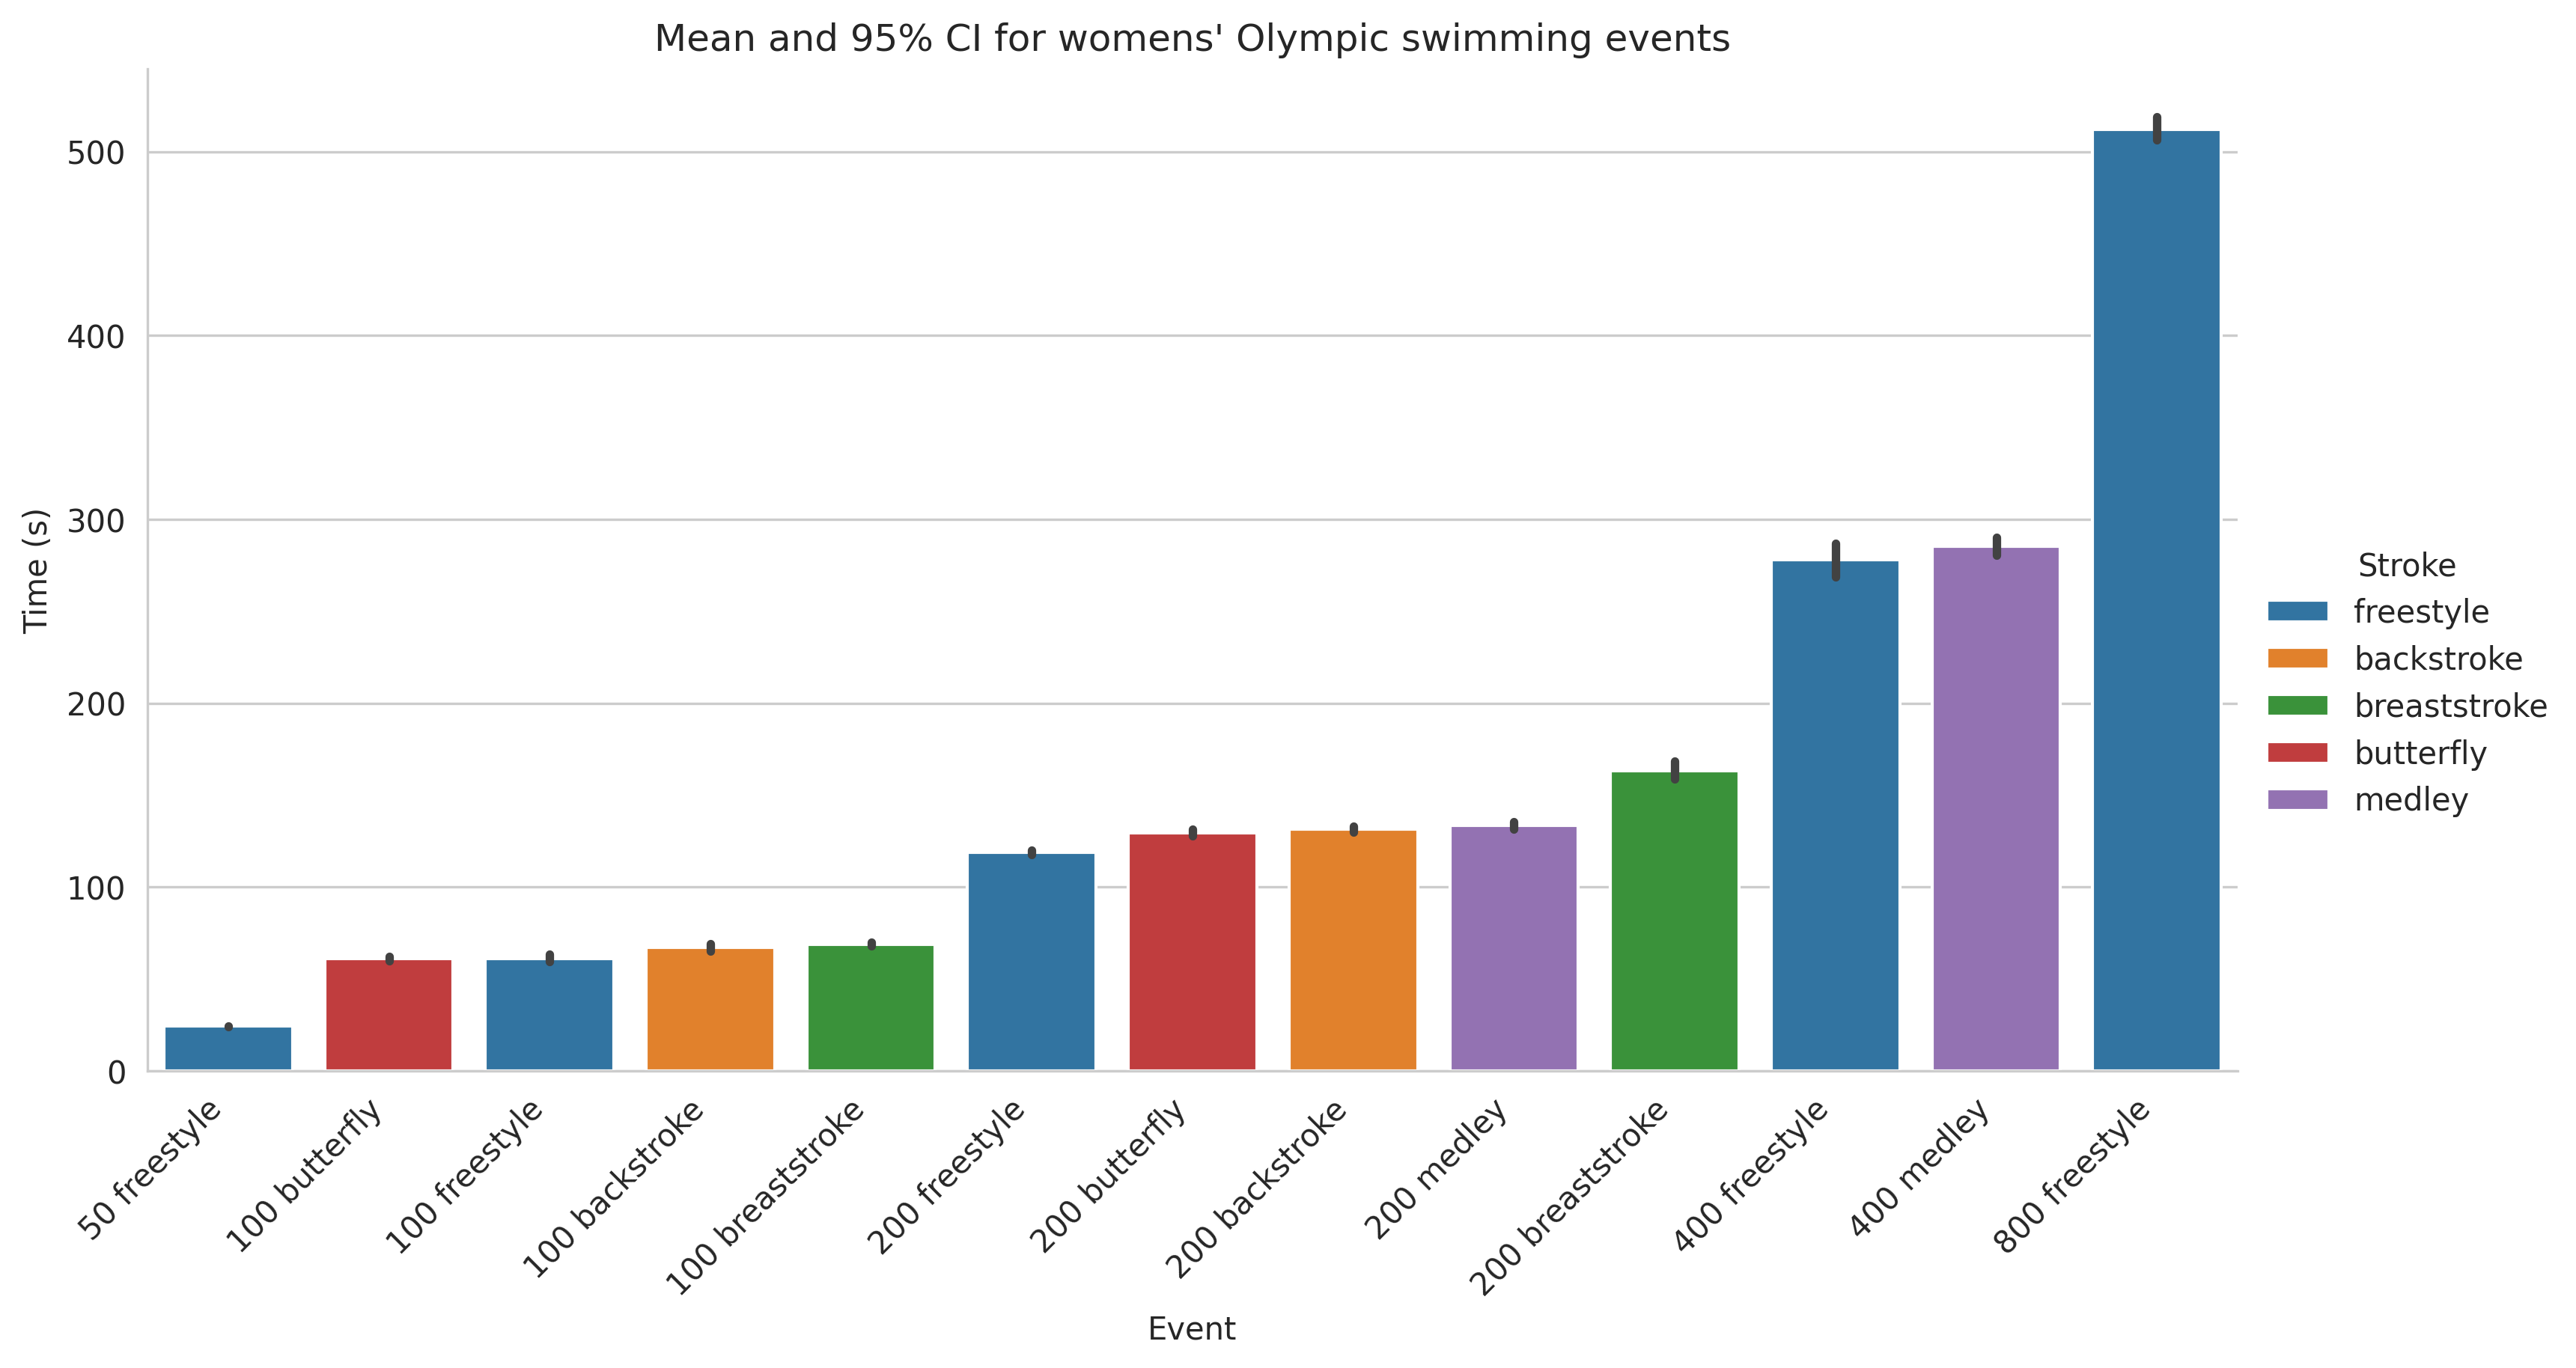

In [39]:
# sorted_labels.py

labels_order = ['50 freestyle', '100 butterfly', '100 freestyle', '100 backstroke',
       '100 breaststroke', '200 freestyle', '200 butterfly', '200 backstroke',
       '200 medley', '200 breaststroke', '400 freestyle', '400 medley',
       '800 freestyle']

sns.catplot(
    data=women,
    kind="bar",
    x="Event",
    y="Time (s)",
    aspect=2,
    hue='Stroke',
    dodge=False,
    orient="v",
    order = labels_order
)


plt.title("Mean and 95% CI for womens' Olympic swimming events")
plt.xticks(rotation=45, horizontalalignment="right")

This technique of using color to show extra information about categories can be very flexible when we combine it with pandas processing. We can add arbitrary categories to our data points, then map those to color. 

For example, let's take our swimming results and classify each event as either long or short. For our purposes, we will arbitrarily say that any event that's at least 400m counts as long. The easiest way to do this is to write a function that will take the a distance and return the answer we want:

In [40]:
def classify_distance(distance):
    if distance >= 400:
        return "Long"
    else:
        return "Short"

and then use `apply` to run it on each of our distance values:

In [41]:
swimming["Distance (m)"].apply(classify_distance)

0       Short
1       Short
2       Short
3       Short
4       Short
        ...  
1304    Short
1305    Short
1306    Short
1307    Short
1308    Short
Name: Distance (m), Length: 1309, dtype: object

Once we have our resulting series of classifications, we can add it as a new column:

In [42]:
women["Race type"] = women["Distance (m)"].apply(classify_distance)
women.head()

Name Country   Age Sex  Height (cm)  ...  Time (s)  \
22       Fanny Durack     ANZ  <NA>   W          NaN  ...      82.0   
23   Wilhelmina Wylie     ANZ    20   W          NaN  ...      85.0   
24    Jennie Fletcher     GBR  <NA>   W          NaN  ...      87.0   
40  Ethelda Bleibtrey     USA  <NA>   W          NaN  ...      73.0   
41        Irene Guest     USA  <NA>   W          NaN  ...      77.0   

   Distance (m)     Stroke          Event  Race type  
22          100  freestyle  100 freestyle      Short  
23          100  freestyle  100 freestyle      Short  
24          100  freestyle  100 freestyle      Short  
40          100  freestyle  100 freestyle      Short  
41          100  freestyle  100 freestyle      Short  

[5 rows x 14 columns]

And now we can use it as a categorical variable. Because all the events with the same distance will obviously have the same race type, we need to use `dodge = False` when using it in conjunction with event as the main variable:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '50 freestyle'),
  Text(1, 0, '100 freestyle'),
  Text(2, 0, '200 freestyle'),
  Text(3, 0, '400 freestyle'),
  Text(4, 0, '800 freestyle'),
  Text(5, 0, '100 backstroke'),
  Text(6, 0, '200 backstroke'),
  Text(7, 0, '100 breaststroke'),
  Text(8, 0, '200 breaststroke'),
  Text(9, 0, '100 butterfly'),
  Text(10, 0, '200 butterfly'),
  Text(11, 0, '200 medley'),
  Text(12, 0, '400 medley')])

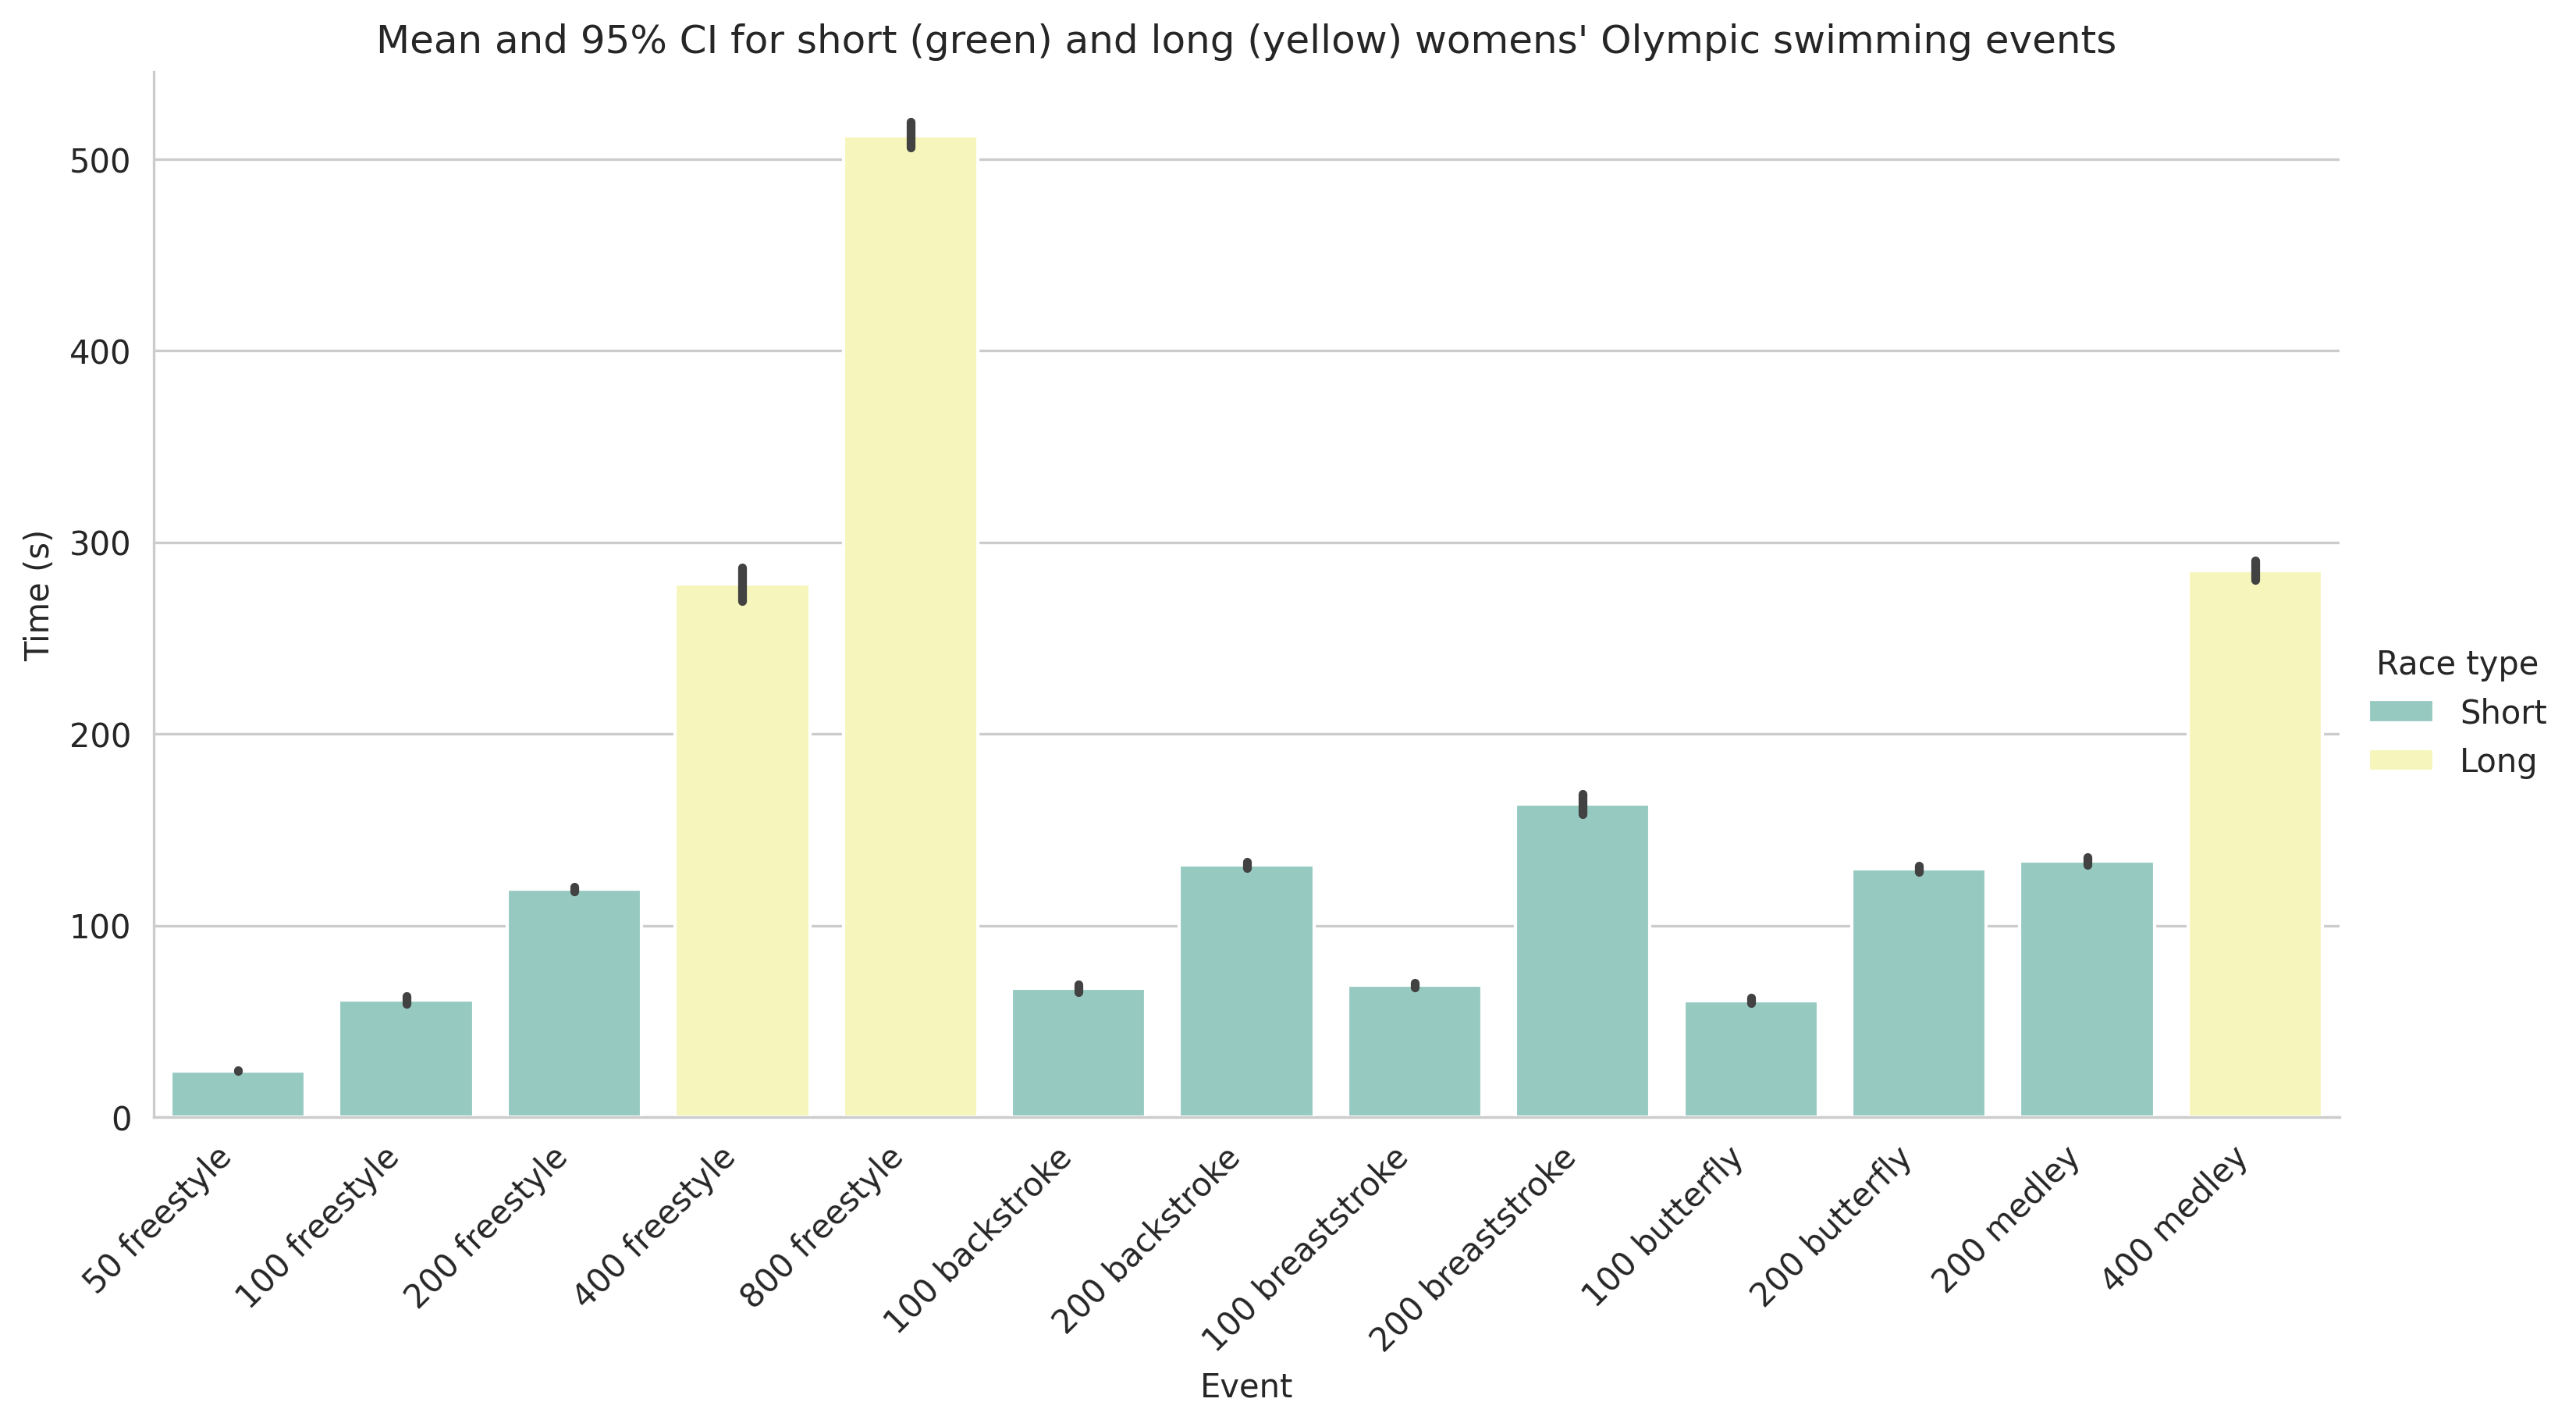

In [43]:
# color_as_metadata.py

labels_order = [
    "50 freestyle",
    "100 freestyle",
    "200 freestyle",
    "400 freestyle",
    "800 freestyle",
    "100 backstroke",
    "200 backstroke",
    "100 breaststroke",
    "200 breaststroke",
    "100 butterfly",
    "200 butterfly",
    "200 medley",
    "400 medley",
]

sns.catplot(
    data=women,
    kind="bar",
    x="Event",
    y="Time (s)",
    aspect=2,
    hue="Race type",
    palette="Set3",
    dodge=False,
    orient="v",
    order=labels_order,
)

plt.title(
    "Mean and 95% CI for short (green) and long (yellow) womens' Olympic swimming events"
)
plt.xticks(rotation=45, horizontalalignment="right")

A similar trick is to highlight a single category by giving it a different color to the rest. We can do this by combinig the `order` and `palette` arguments to `catplot`. Returning to our example where we are drawing a boxplot of times for each stroke, here's how we can highlight butterfly subtly:

Text(0.5, 1.05, 'Distribution of 100m Olympic medal times for different strokes')

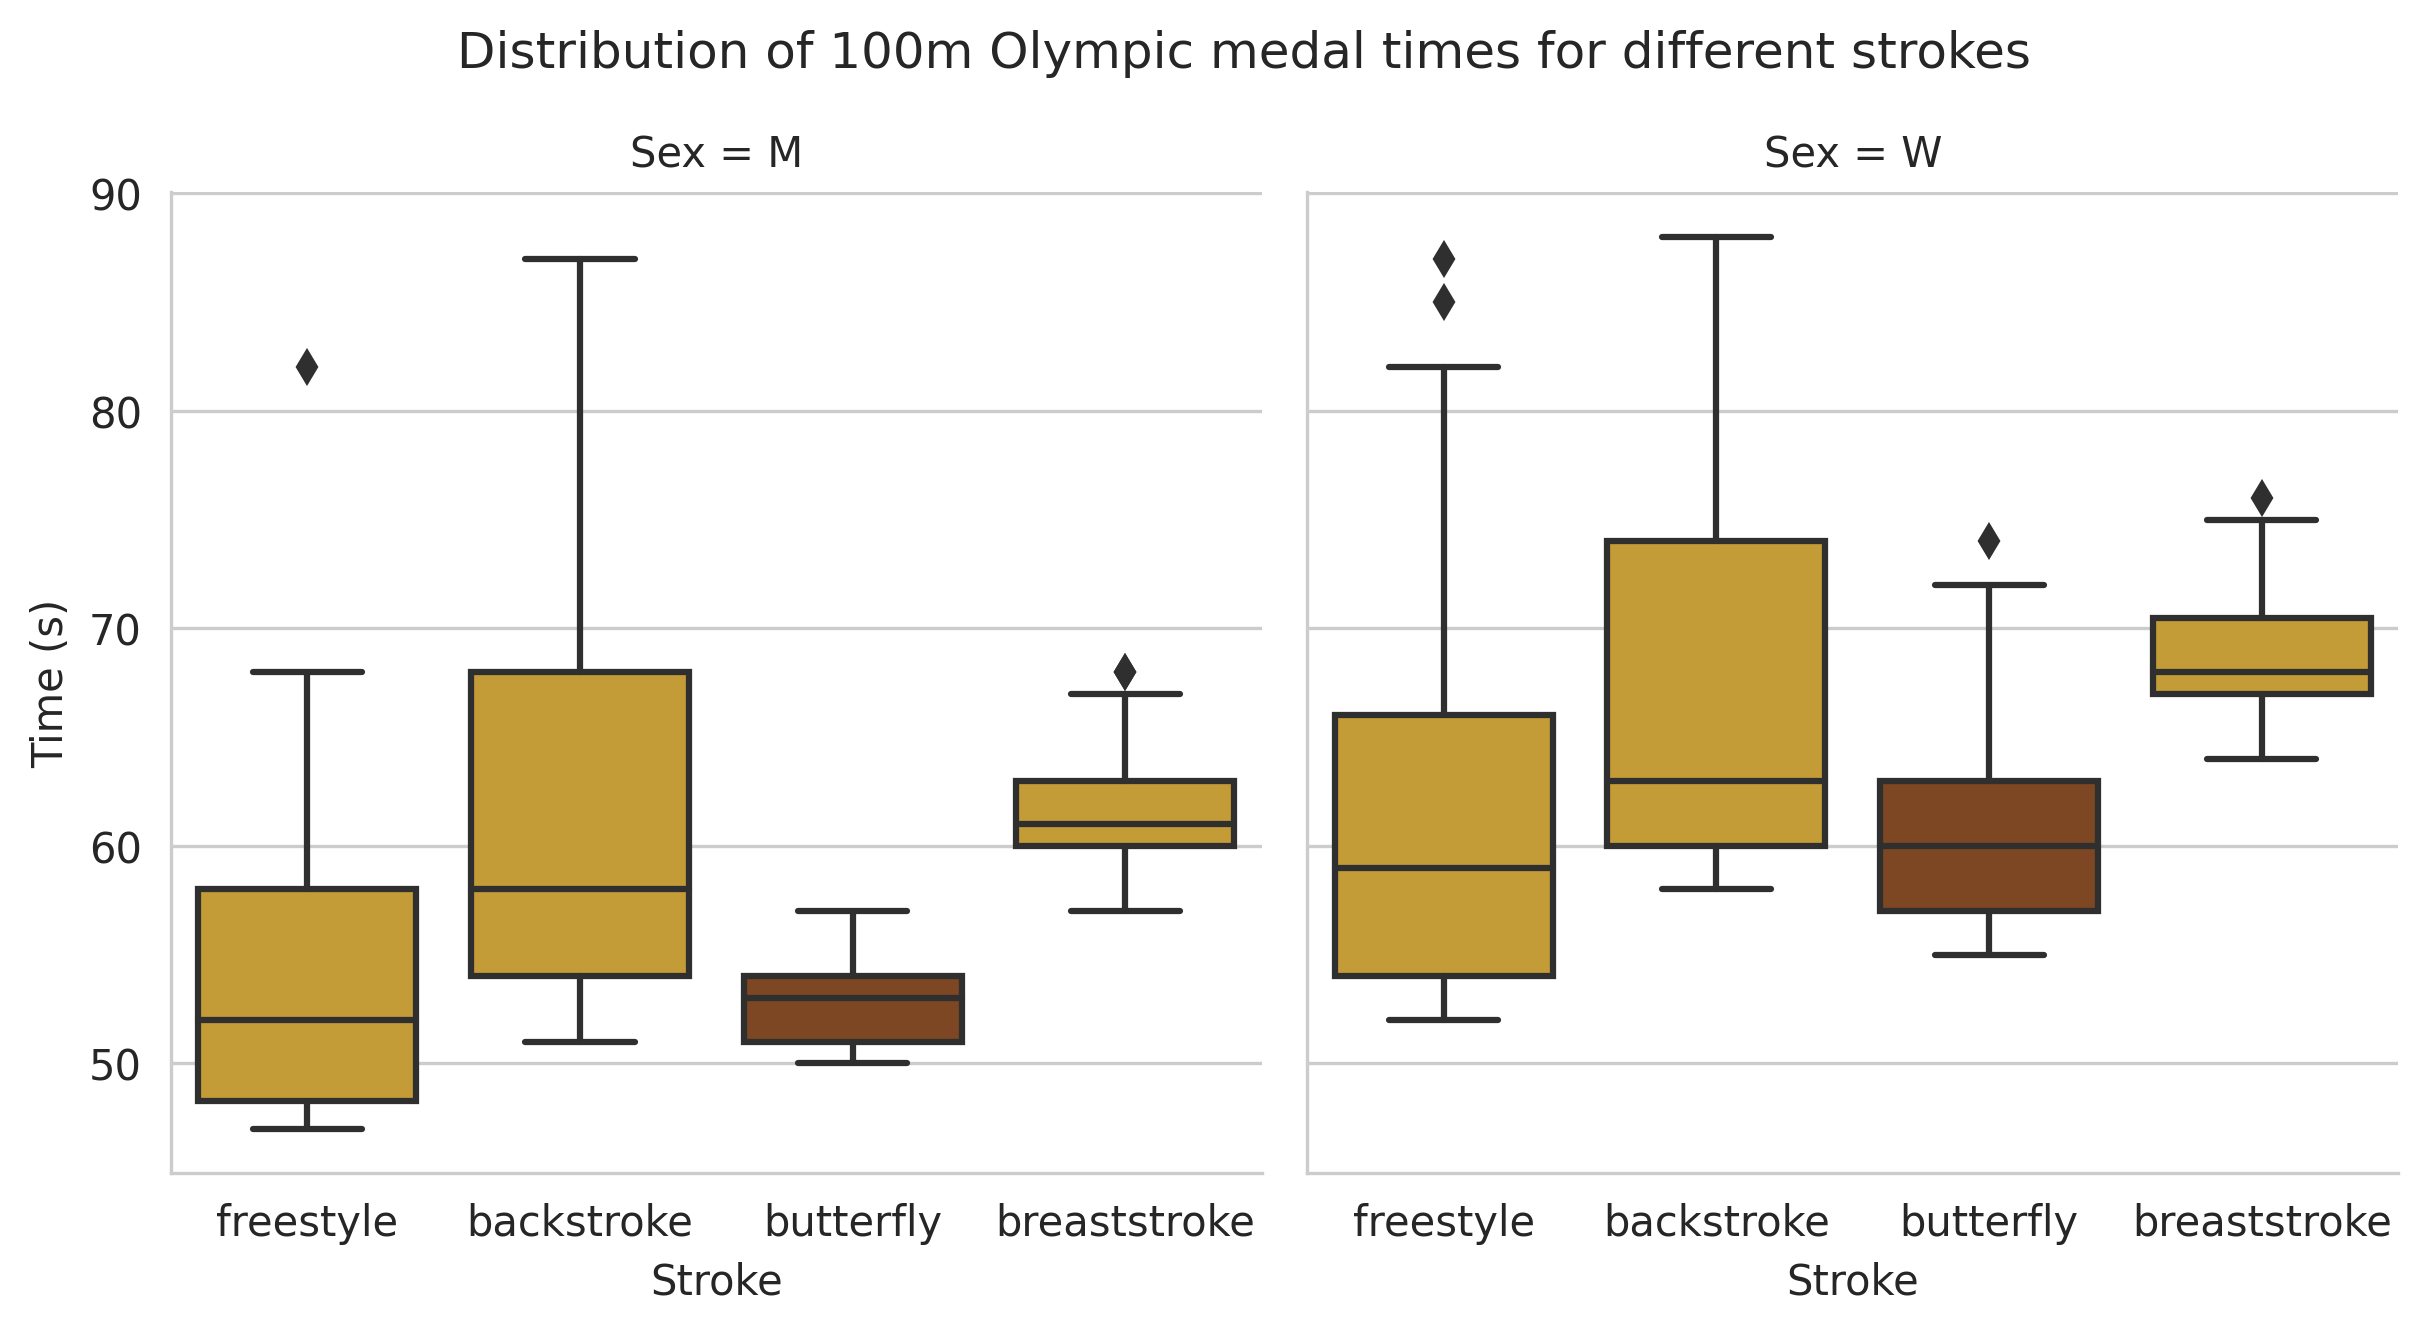

In [44]:
# highlight_subtle.py

g = sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    height=4,
    col="Sex",
    palette=["goldenrod", "goldenrod", "saddlebrown", "goldenrod"],
)
g.fig.suptitle("Distribution of 100m Olympic medal times for different strokes", y=1.05)

or more strikingly:

Text(0.5, 1.05, 'Distribution of 100m Olympic medal times for different strokes')

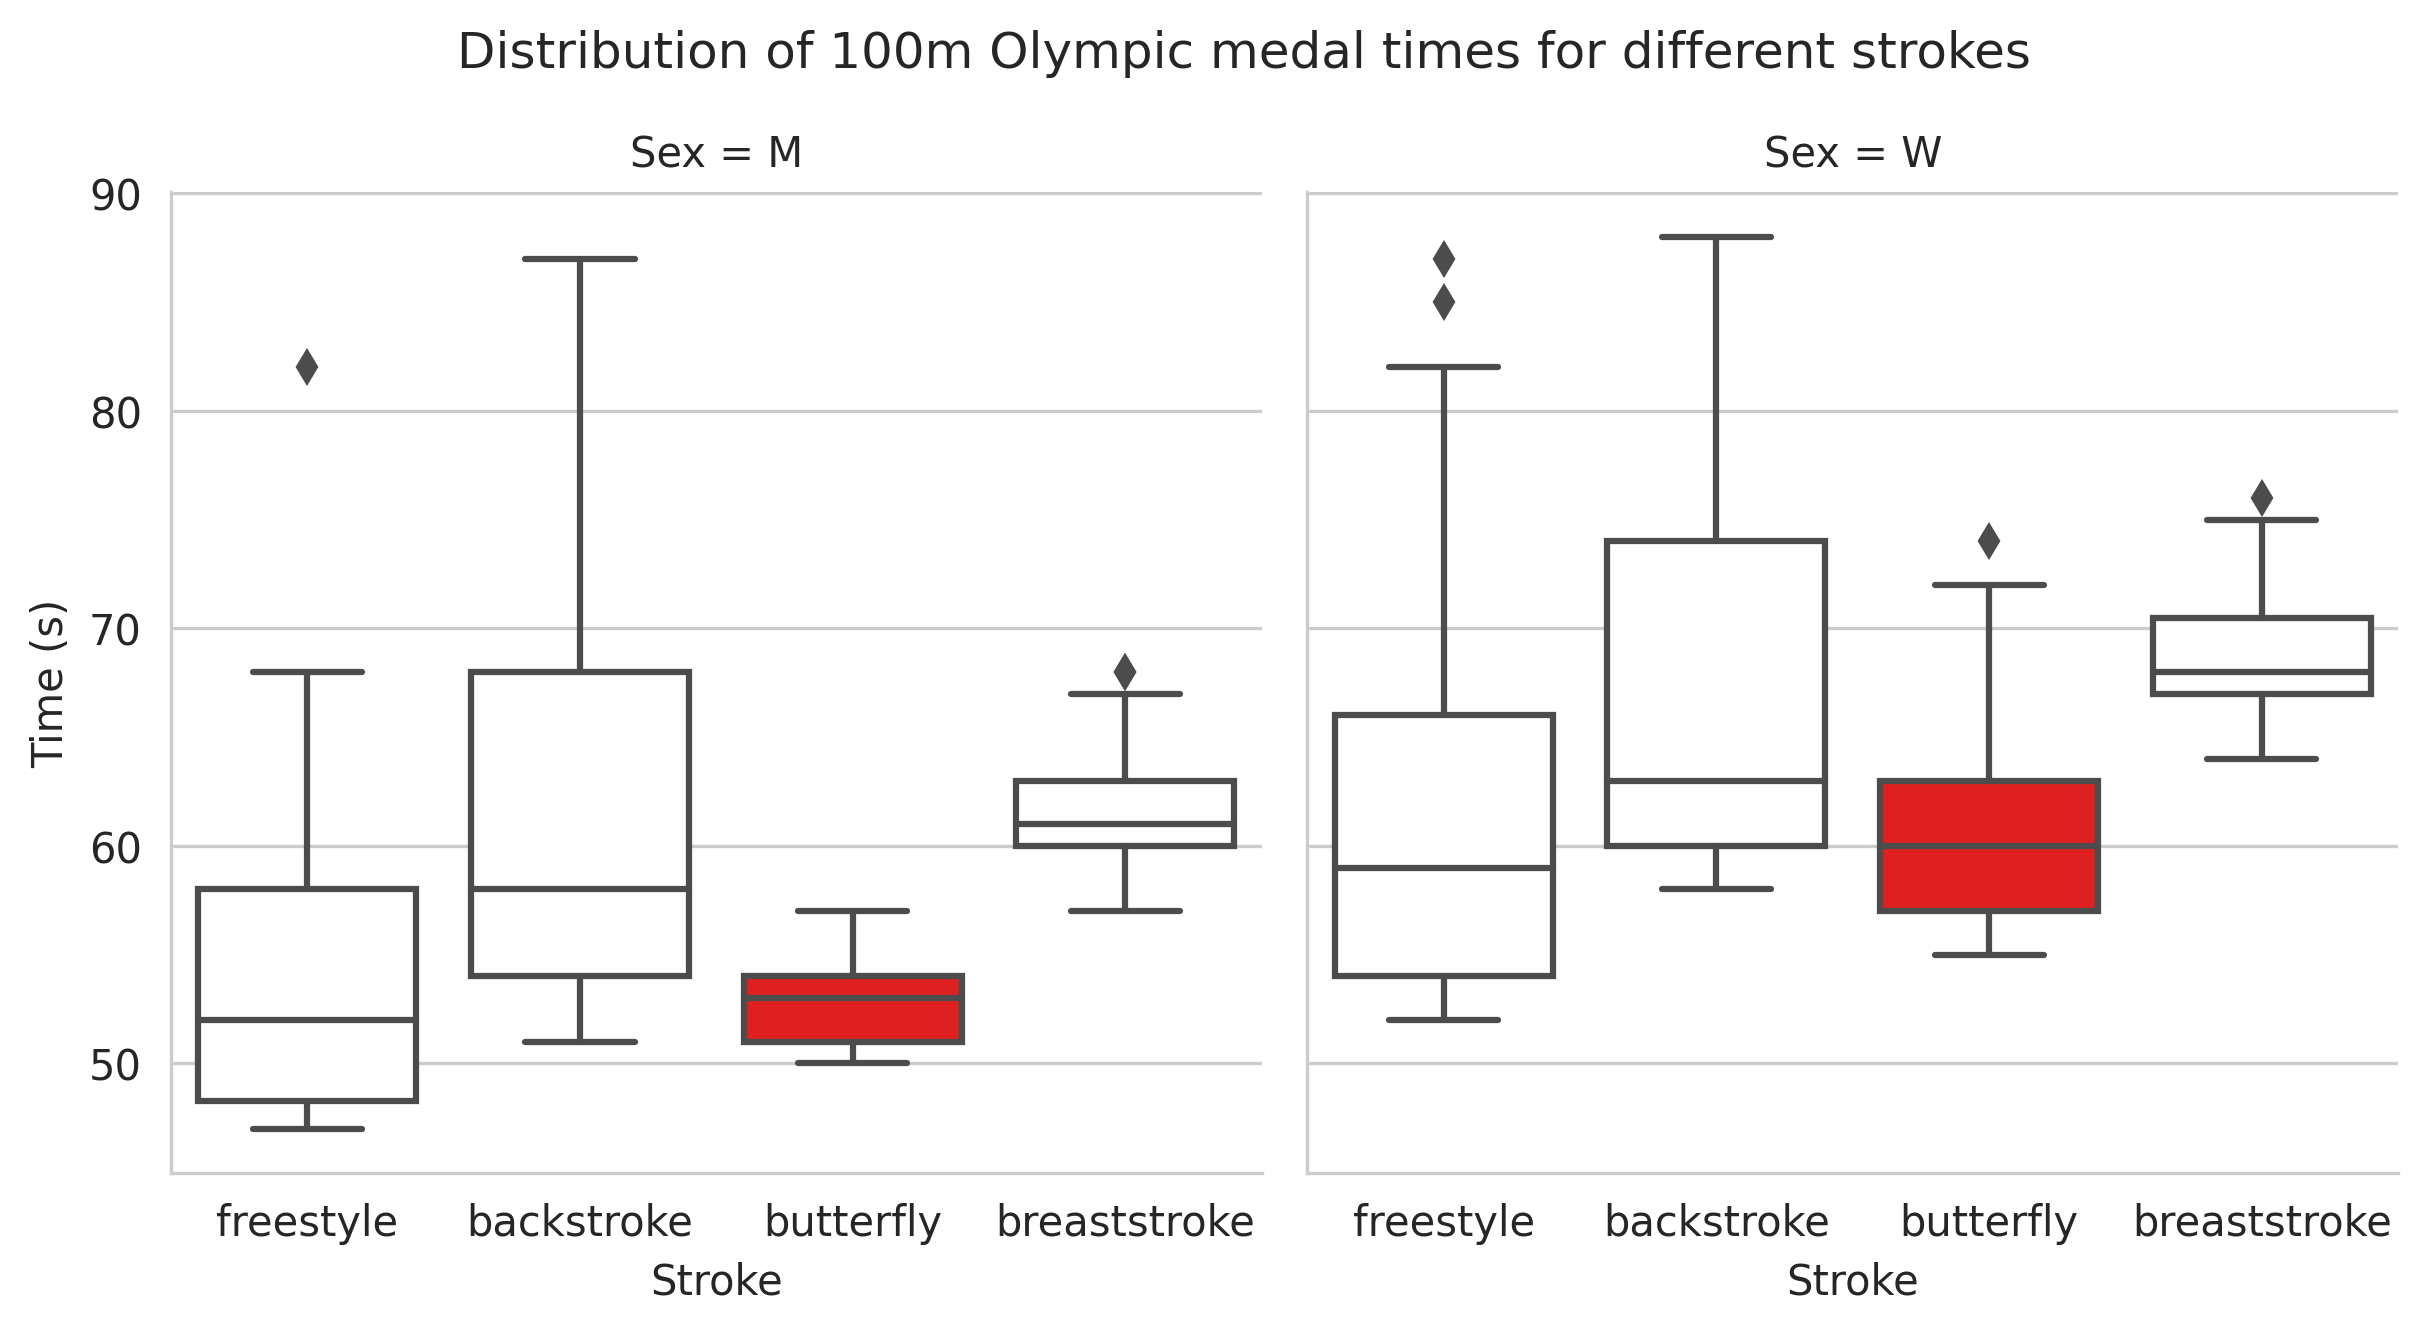

In [45]:
# highlight_bold.py

g = sns.catplot(
    data=swimming[swimming["Distance (m)"] == 100],
    kind="box",
    x="Stroke",
    y="Time (s)",
    height=4,
    col="Sex",
    palette=["white", "white", "red", "white"],
)
g.fig.suptitle("Distribution of 100m Olympic medal times for different strokes", y=1.05)

## Consistency with colors

As we've seen in earlier examples, using colors consistently between charts can be a great aid to interpretation. Conversely, inconsistent use of color can cause all sorts of problems. One trap that we can fall into is to draw two charts with the same categories and palettes, but different category orders. 

Here are two charts that show the distribution of heights of female athletes from a selected list of countries. The first just shows bronze medal winners:

Text(0.5, 1.0, 'Distribution of heights across female Olympic swimming bronze medal winners')

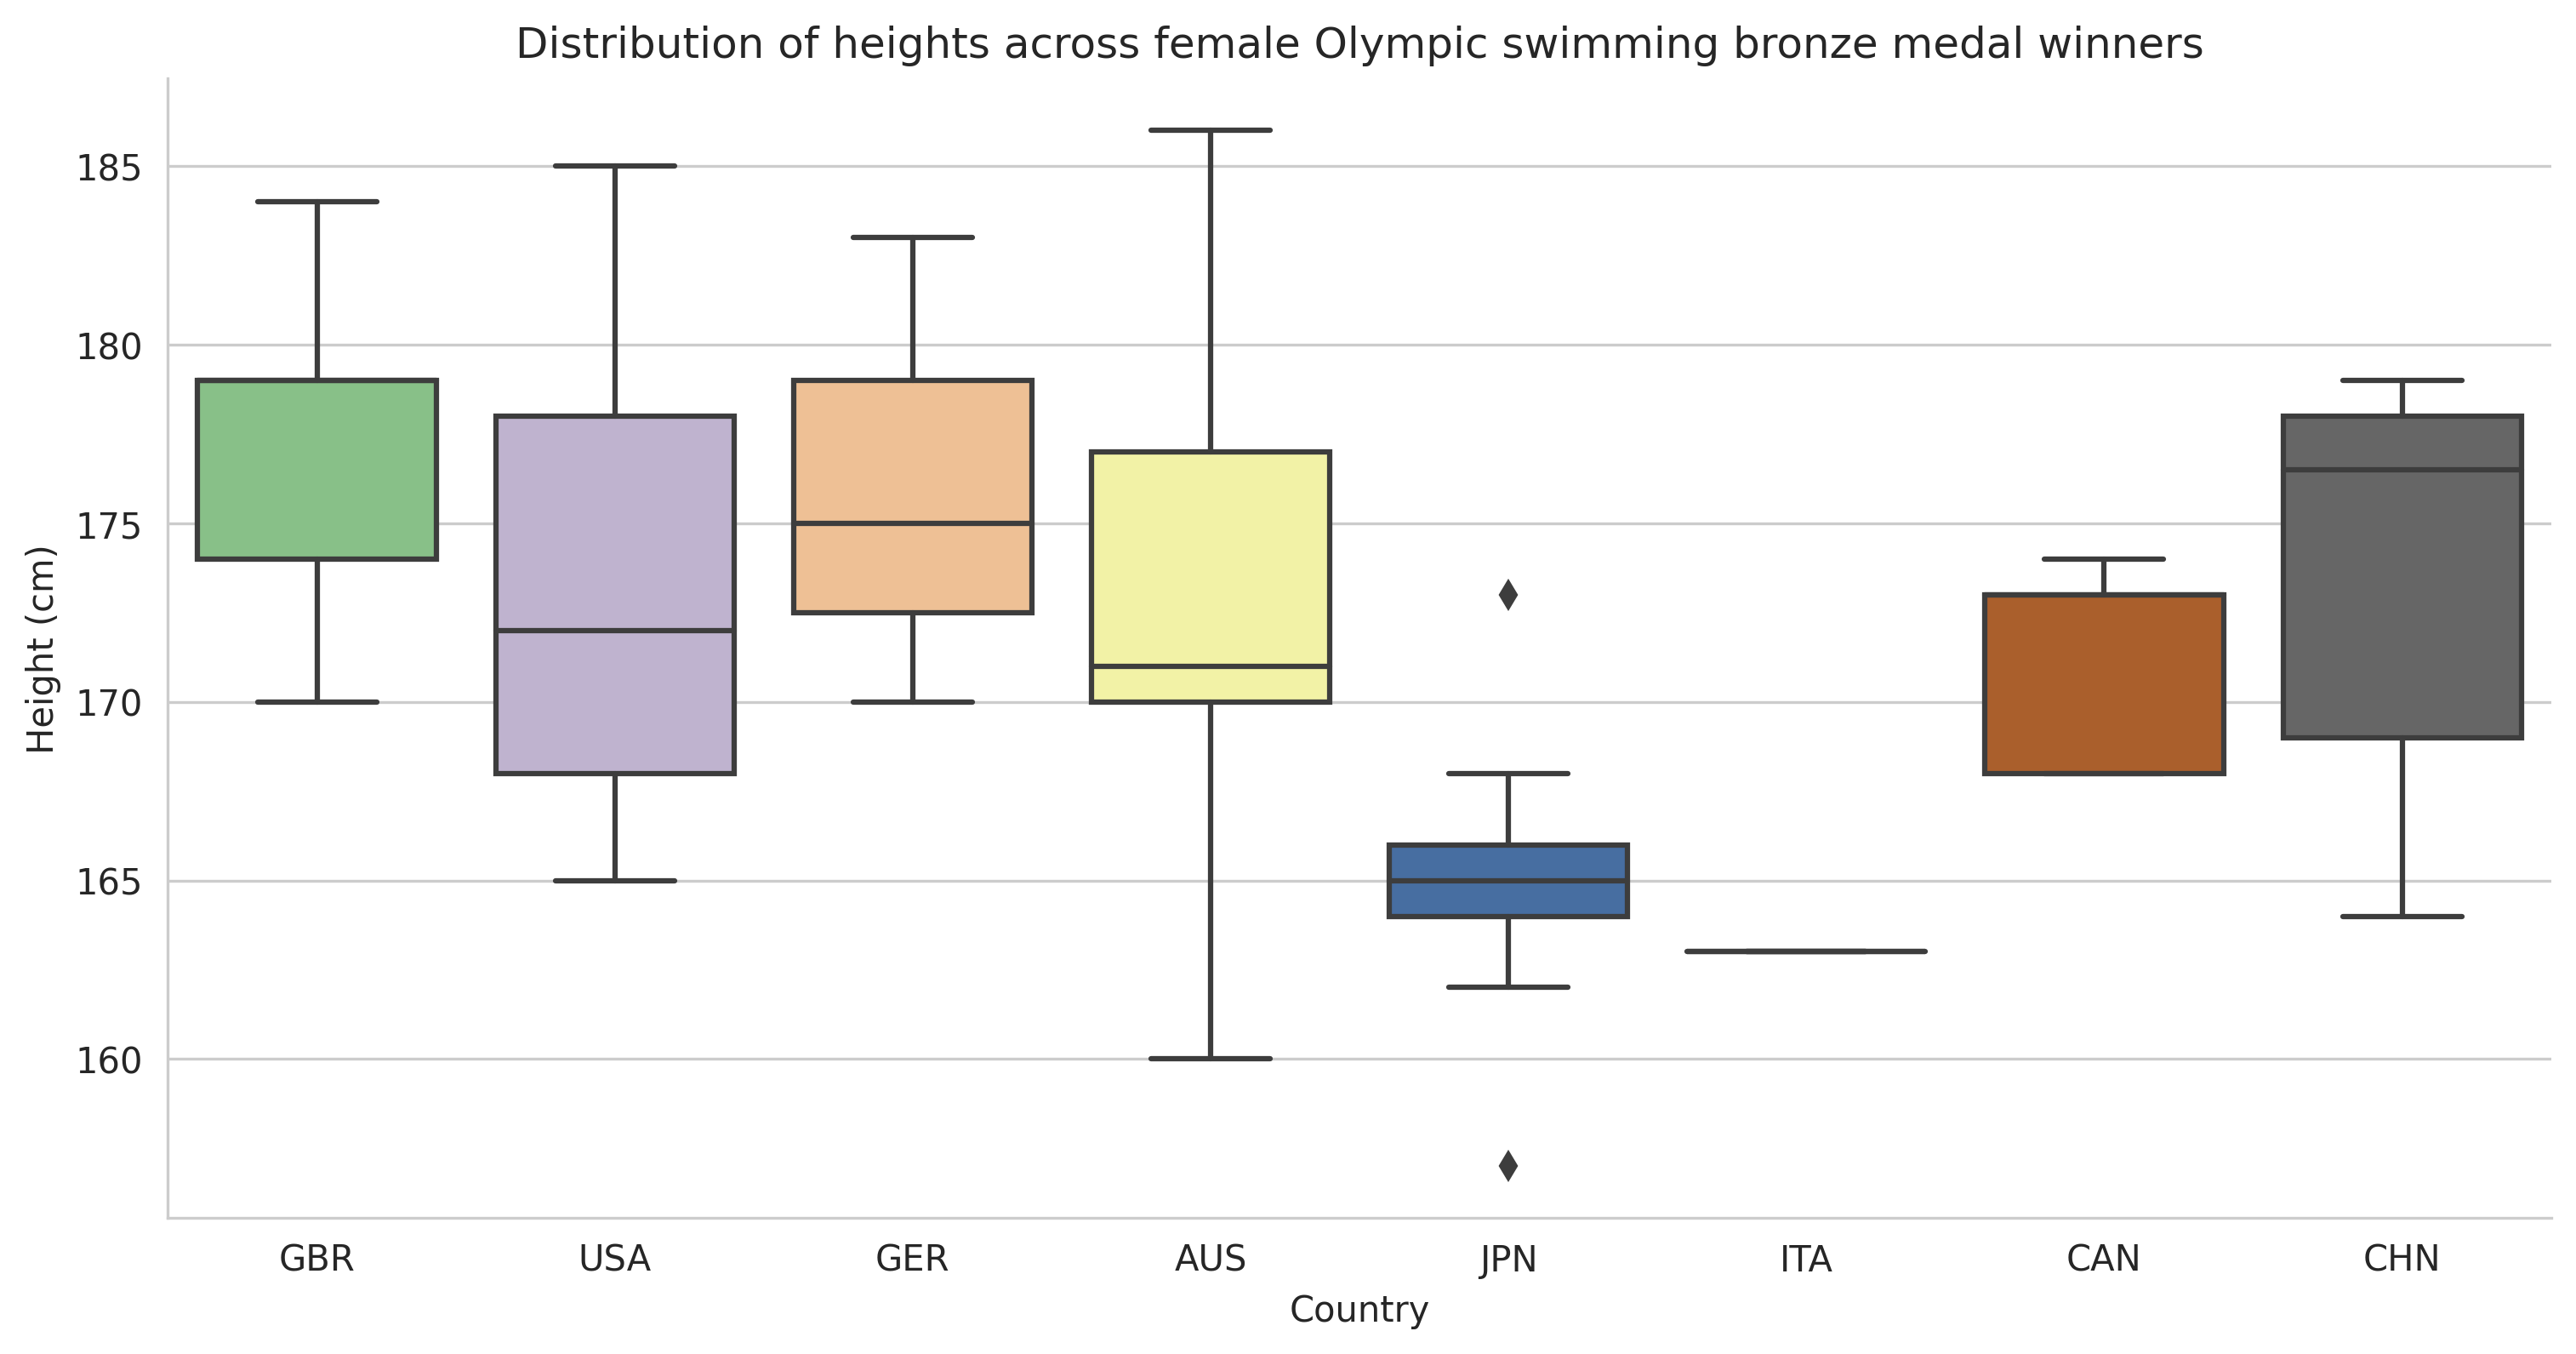

In [46]:
my_countries = ["USA", "AUS", "CHN", "JPN", "GBR", "GER", "ITA", "CAN"]

selected_women = women[women["Country"].isin(my_countries)]

sns.catplot(
    data=selected_women[selected_women["Medal"] == "Bronze"],
    x="Country",
    y="Height (cm)",
    palette="Accent",
    kind="box",
    aspect=2,
)
plt.title("Distribution of heights across female Olympic swimming bronze medal winners")

The second plot shows the same data for gold and silver medal winners:

Text(0.5, 1.0, 'Distribution of heights across female Olympic swimming gold and silver medal winners')

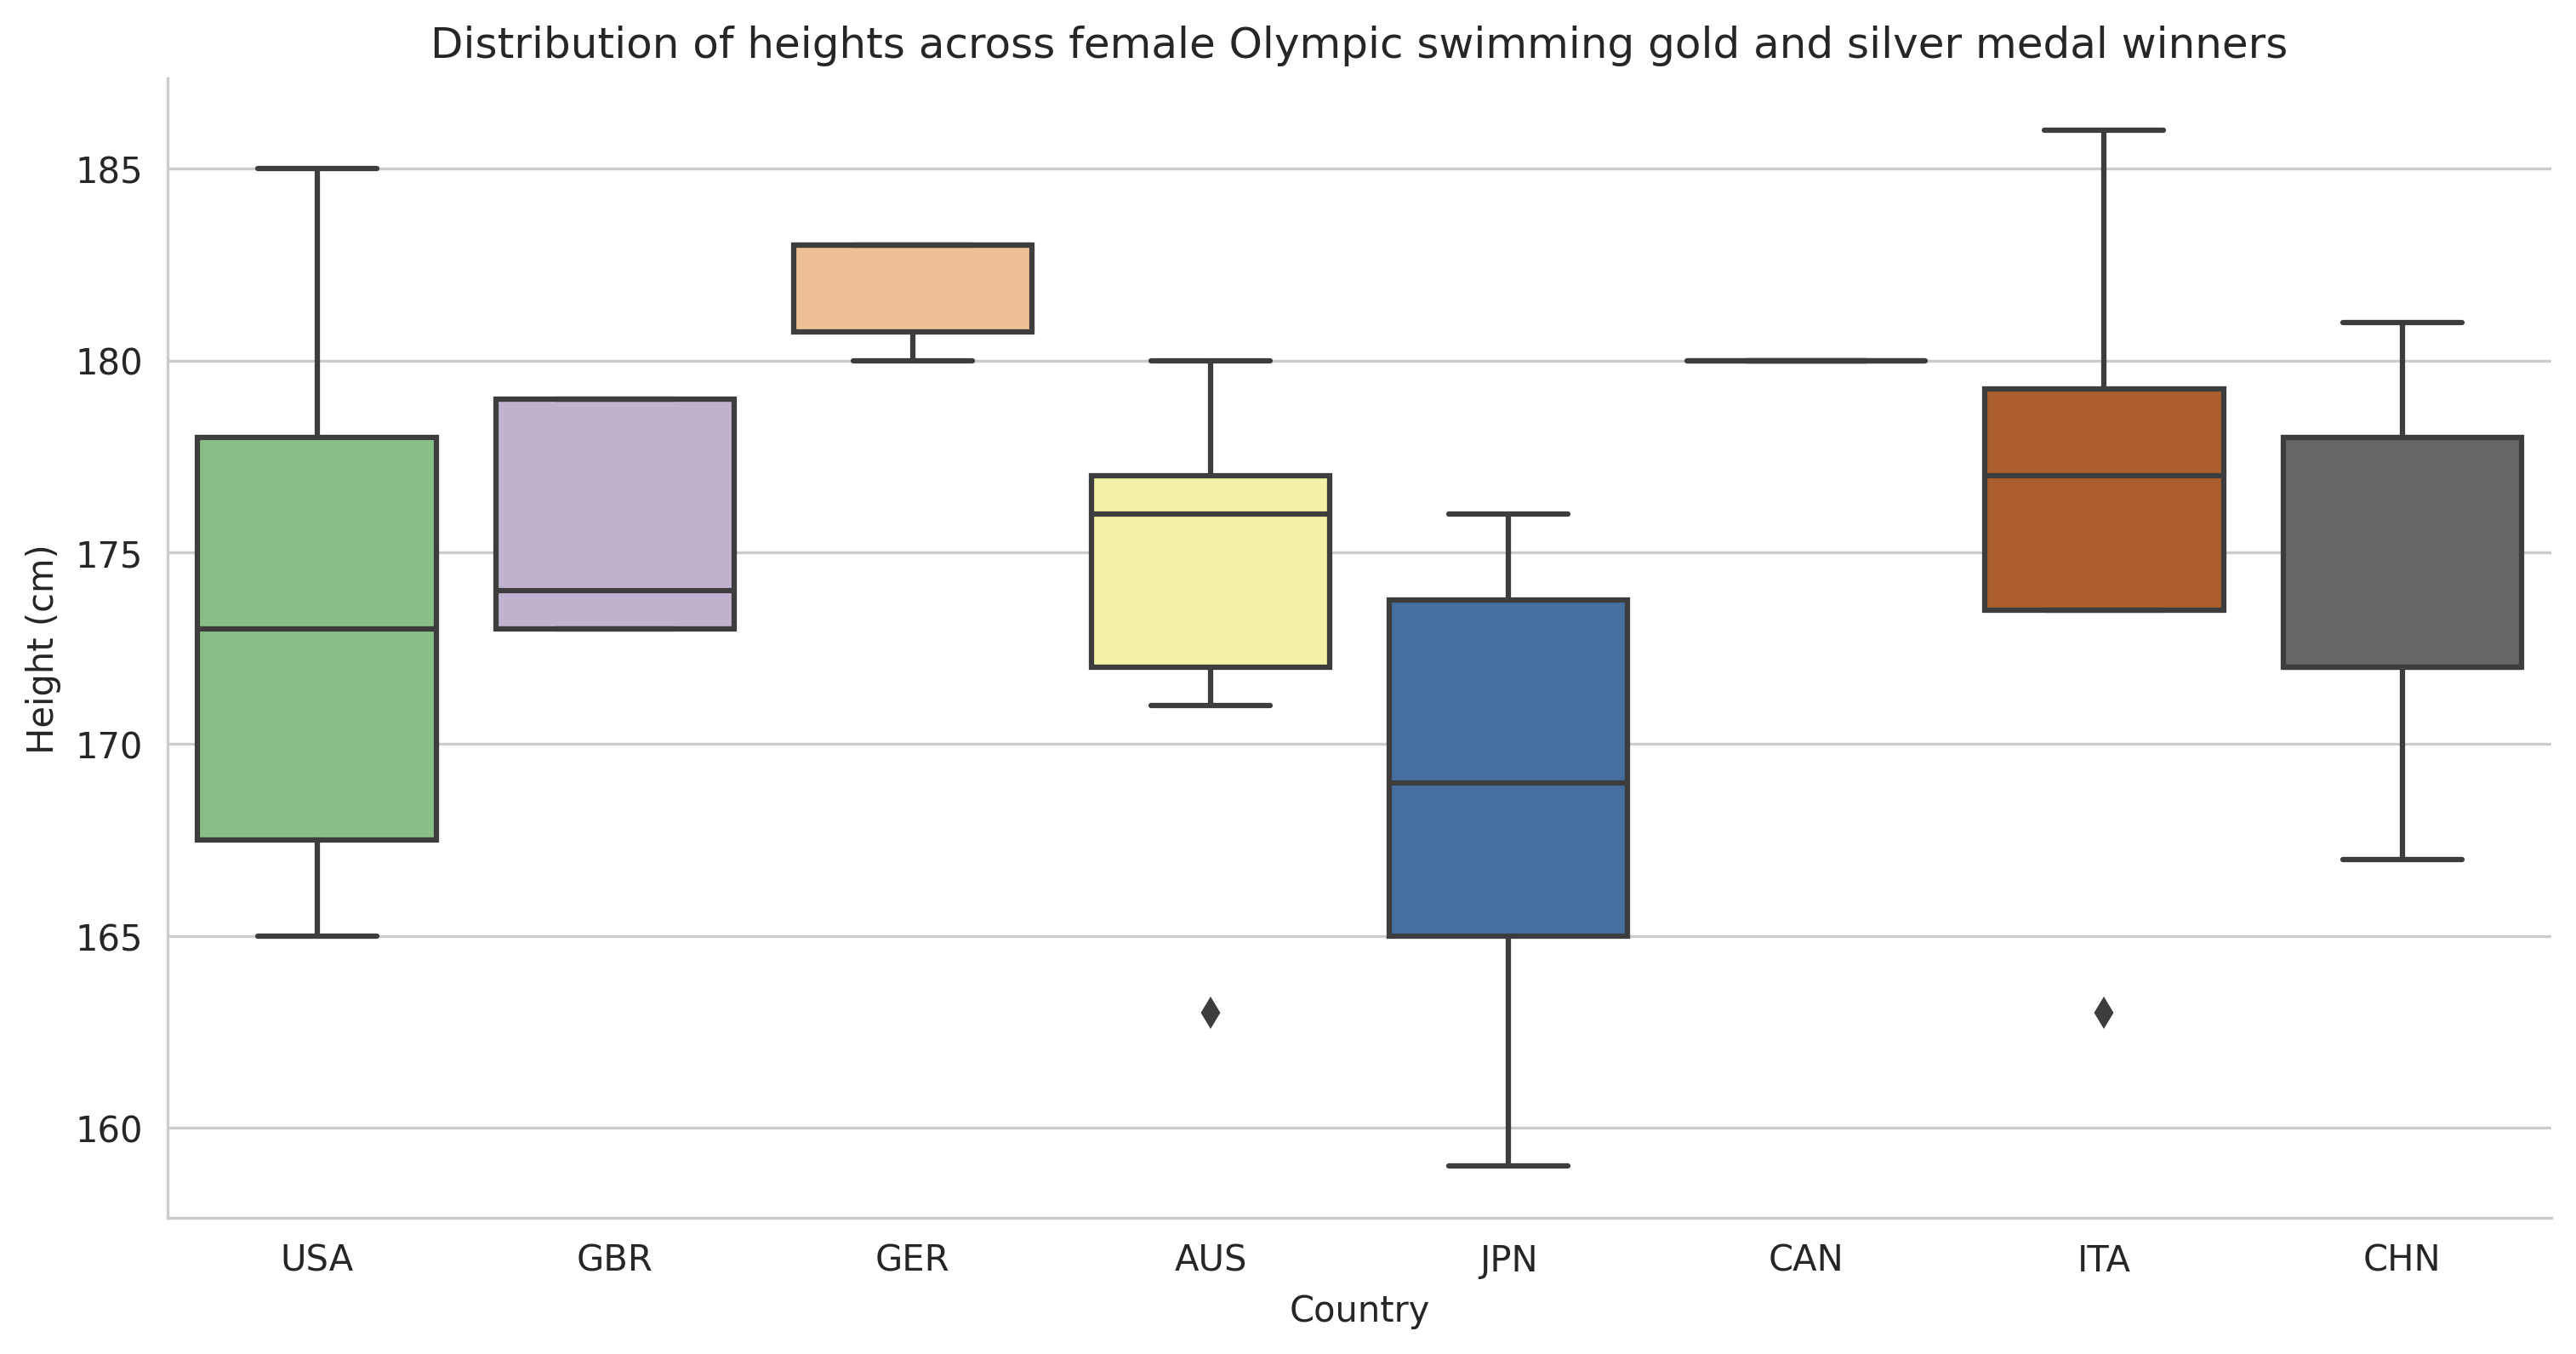

In [47]:
sns.catplot(
    data=selected_women[selected_women["Medal"].isin(["Gold", "Silver"])],
    x="Country",
    y="Height (cm)",
    palette="Accent",
    kind="box",
    aspect=2,
)

plt.title(
    "Distribution of heights across female Olympic swimming gold and silver medal winners"
)

In the above pair of plots we have divided our dataset into two subsets and plotted them separately. Because the order (and hence the color) of the countries is determined by the order that they appear in the data, it's different for each chart. Notice that for the bronze medal plot, the first green box represents Great Britain, but in the gold/silver plot, the green box represents the USA. 

Either chart in isolation would be fine, but together this is a disaster for interpretation - looking at boxes of the same color and position might mean that we are accidentally comparing two different counties.

One solution is to have an explicit order for the countries, which we define once at the start of the project:

In [48]:
my_countries = ["USA", "AUS", "CHN", "JPN", "GBR", "GER", "ITA", "CAN"]

and then reuse each time we draw a chart:

Text(0.5, 1.0, 'Distribution of heights across female Olympic swimming bronze medal winners')

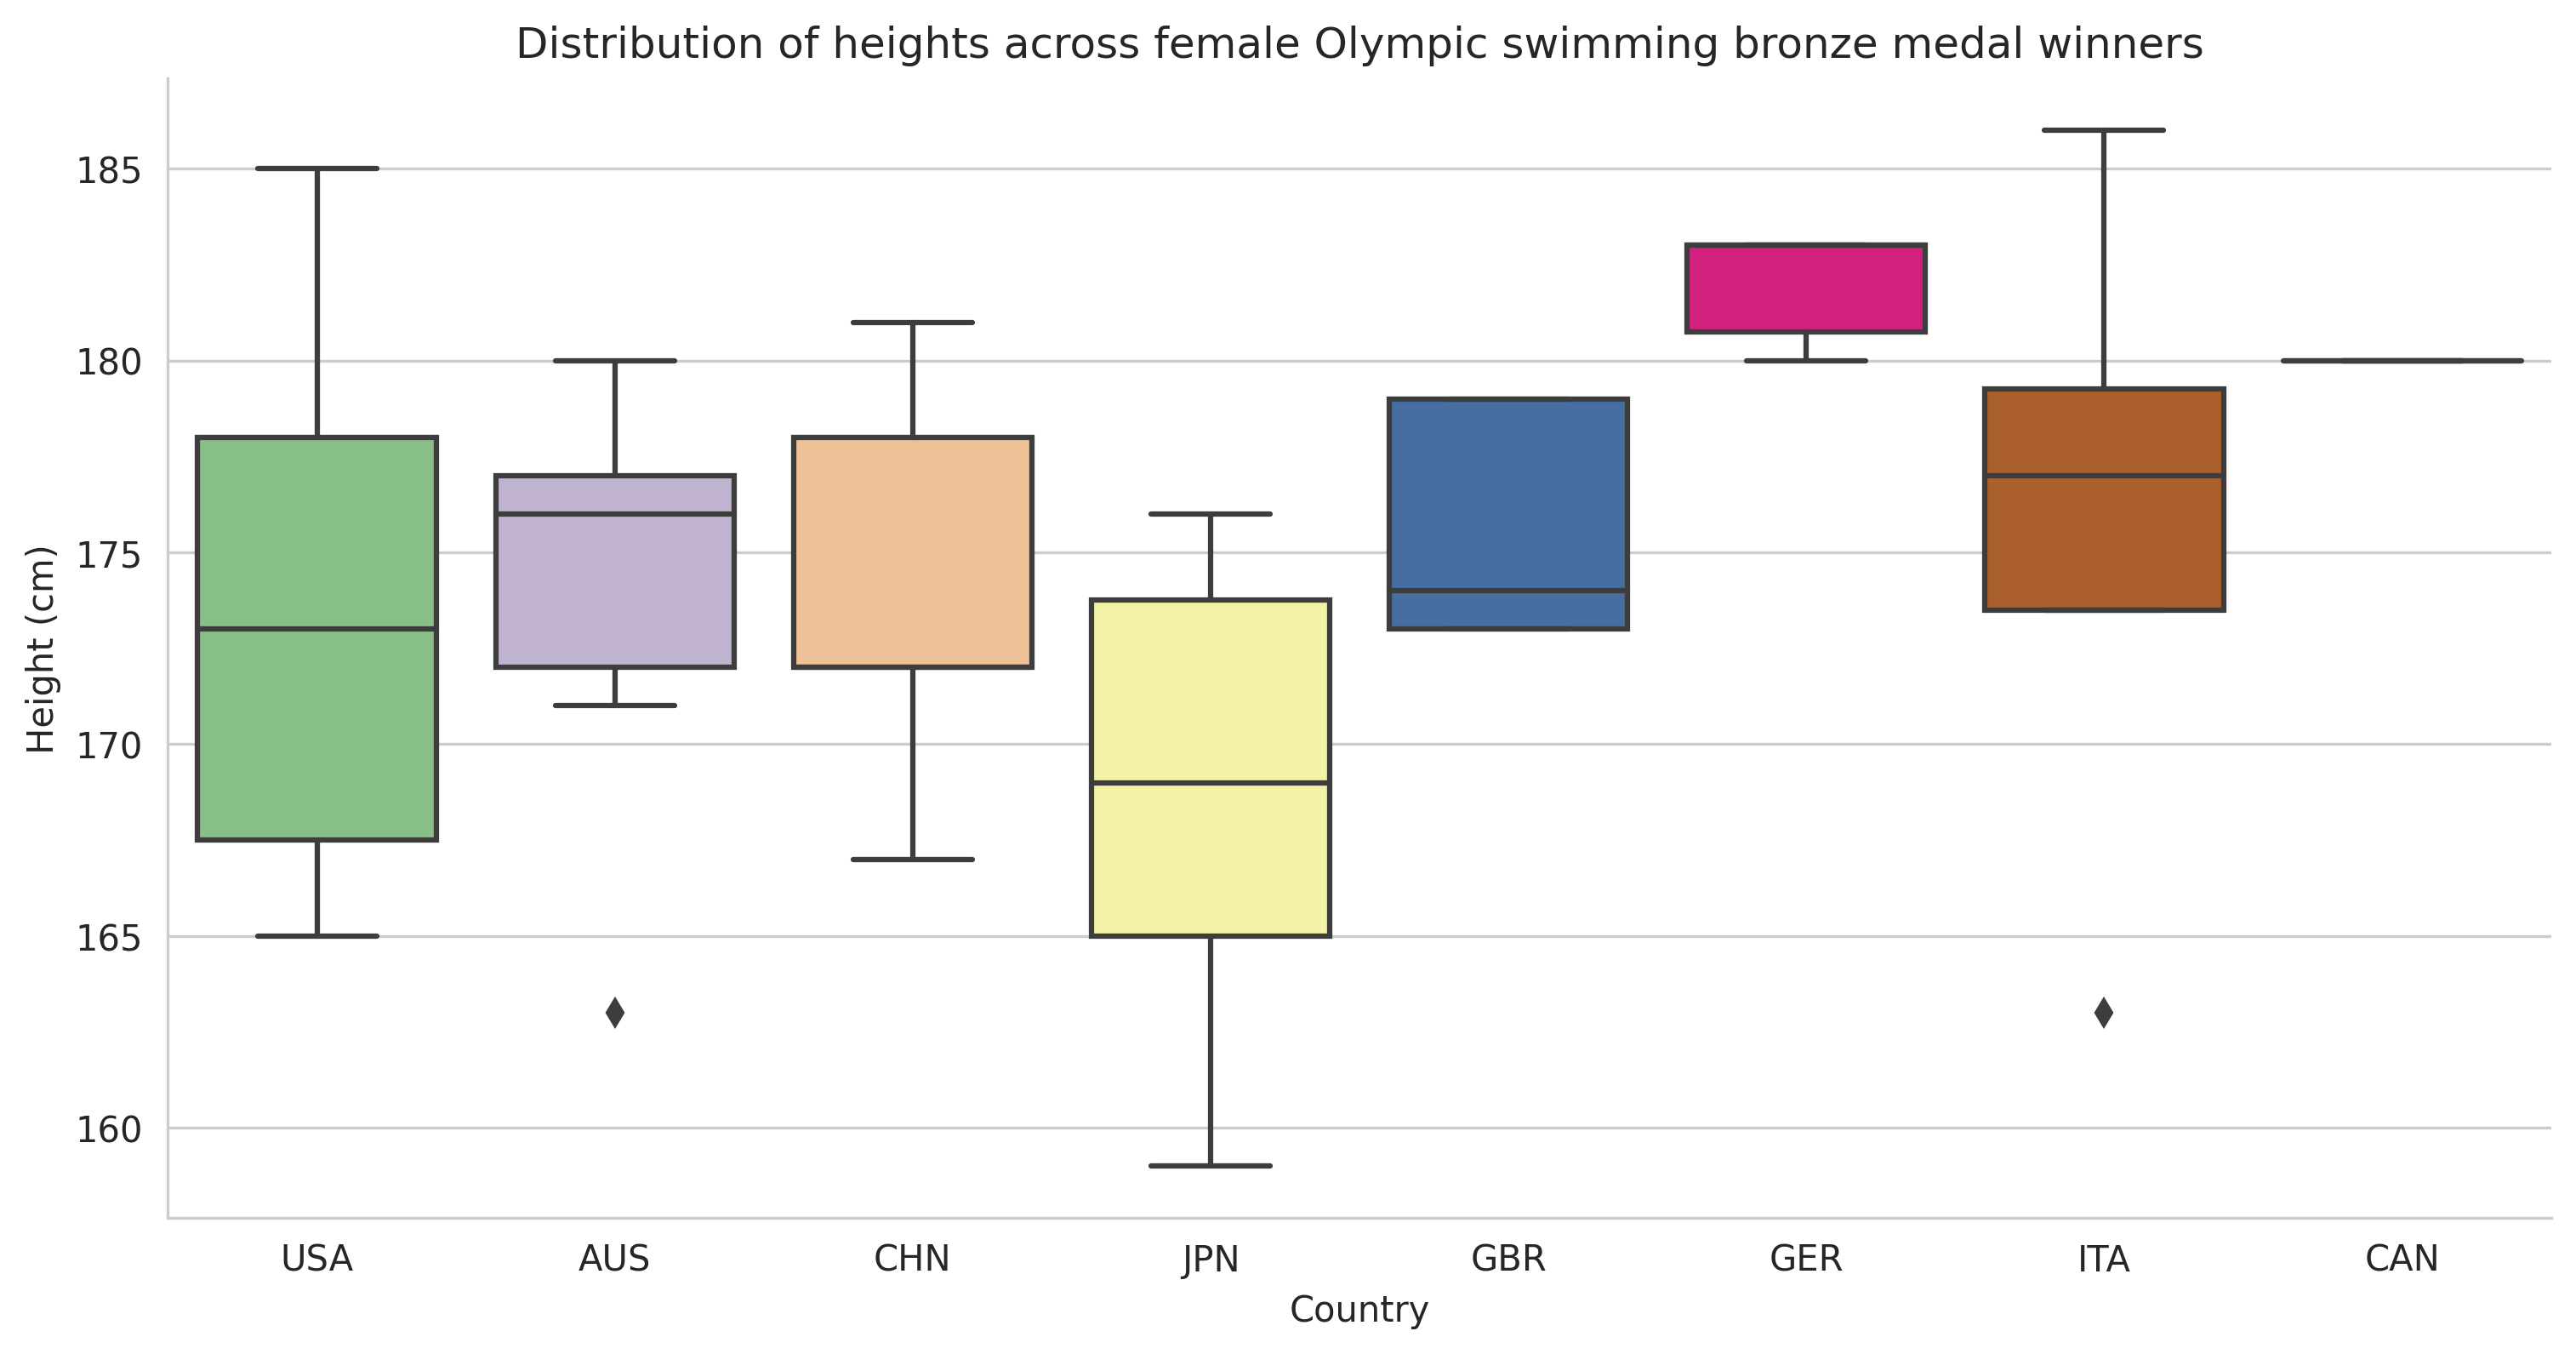

In [49]:
sns.catplot(
    data=selected_women[selected_women["Medal"].isin(["Gold", "Silver"])],
    x="Country",
    y="Height (cm)",
    palette="Accent",
    kind="box",
    aspect=2,
    order=my_countries,
)

plt.title("Distribution of heights across female Olympic swimming bronze medal winners")

This forces a consistent order. Another option would be to make a new categorical column containing the property that we want to use to split the data up. This is covered in detail in the chapter on binning, so we'll do it briefly here:

In [50]:
# make a new column to hold medal type

selected_women["Medal type"] = selected_women["Medal"].apply(
    lambda m: "Gold and Silver" if m in ["Gold", "Silver"] else "Bronze"
)
selected_women.head()

Name Country   Age Sex  Height (cm)  ...  Distance (m)  \
24    Jennie Fletcher     GBR  <NA>   W          NaN  ...           100   
40  Ethelda Bleibtrey     USA  <NA>   W          NaN  ...           100   
41        Irene Guest     USA  <NA>   W          NaN  ...           100   
42    Frances Schroth     USA    27   W        168.0  ...           100   
58       Ethel Lackie     USA  <NA>   W          NaN  ...           100   

       Stroke          Event Race type       Medal type  
24  freestyle  100 freestyle     Short           Bronze  
40  freestyle  100 freestyle     Short  Gold and Silver  
41  freestyle  100 freestyle     Short  Gold and Silver  
42  freestyle  100 freestyle     Short           Bronze  
58  freestyle  100 freestyle     Short  Gold and Silver  

[5 rows x 15 columns]

Now we can use `catplot` to separate out the two categories in a single chart, and it will take care of enforcing a consistent order between the individual plots:

Text(0.5, 1.05, 'Distribution of heights across female Olympic swimming medal winners from different countries')

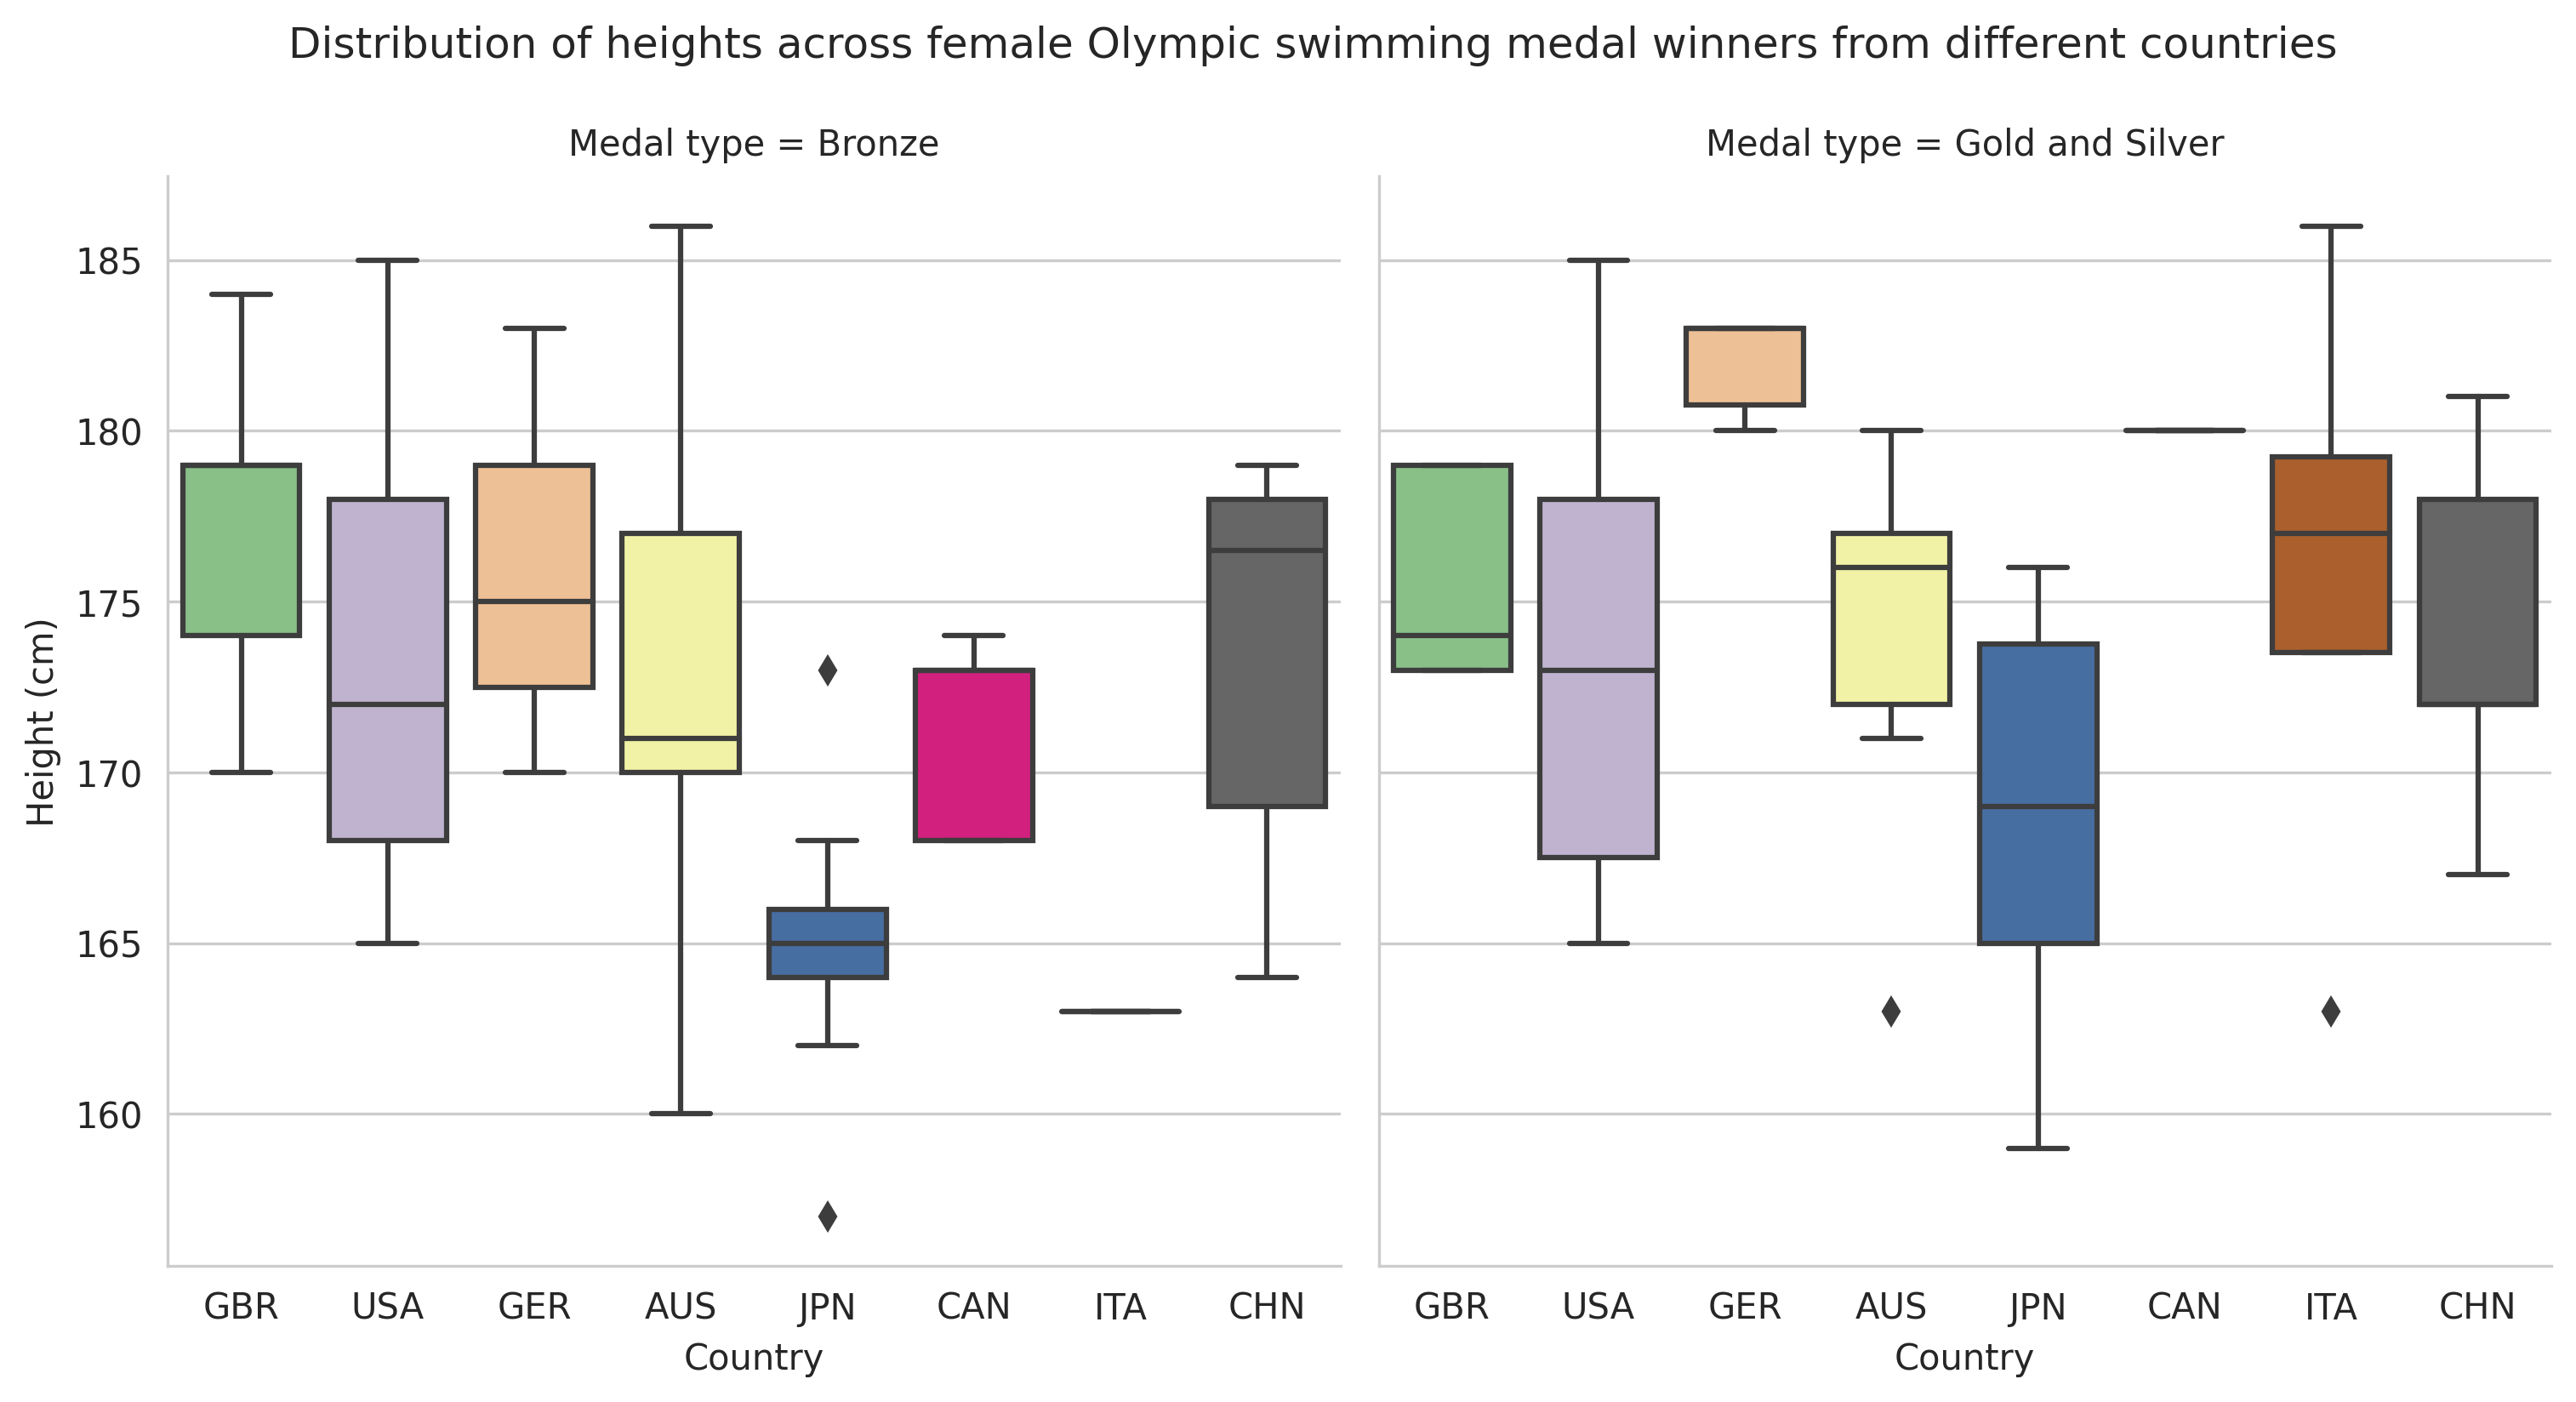

In [51]:
# simple_binning.py


g = sns.catplot(
    data=selected_women,
    x="Country",
    y="Height (cm)",
    palette="Accent",
    kind="box",
    aspect=1,
    col="Medal type",
)
g.fig.suptitle(
    "Distribution of heights across female Olympic swimming medal winners from different countries",
    y=1.05,
)

The final approach to ensure consistency between charts would be to make the **Country** column an ordered category. We'll discuss this in a later chapter.

### Reusing palettes for different categories

Another problem that's easy to run into is accidentally using the same palettes for different categories. Let's say we start a project by looking at the distribution of female athlete heights for all medal winners, using a similar chart to the examples above:

Text(0.5, 1.0, 'Distribution of heights\nof female Olympic swimming medal winners')

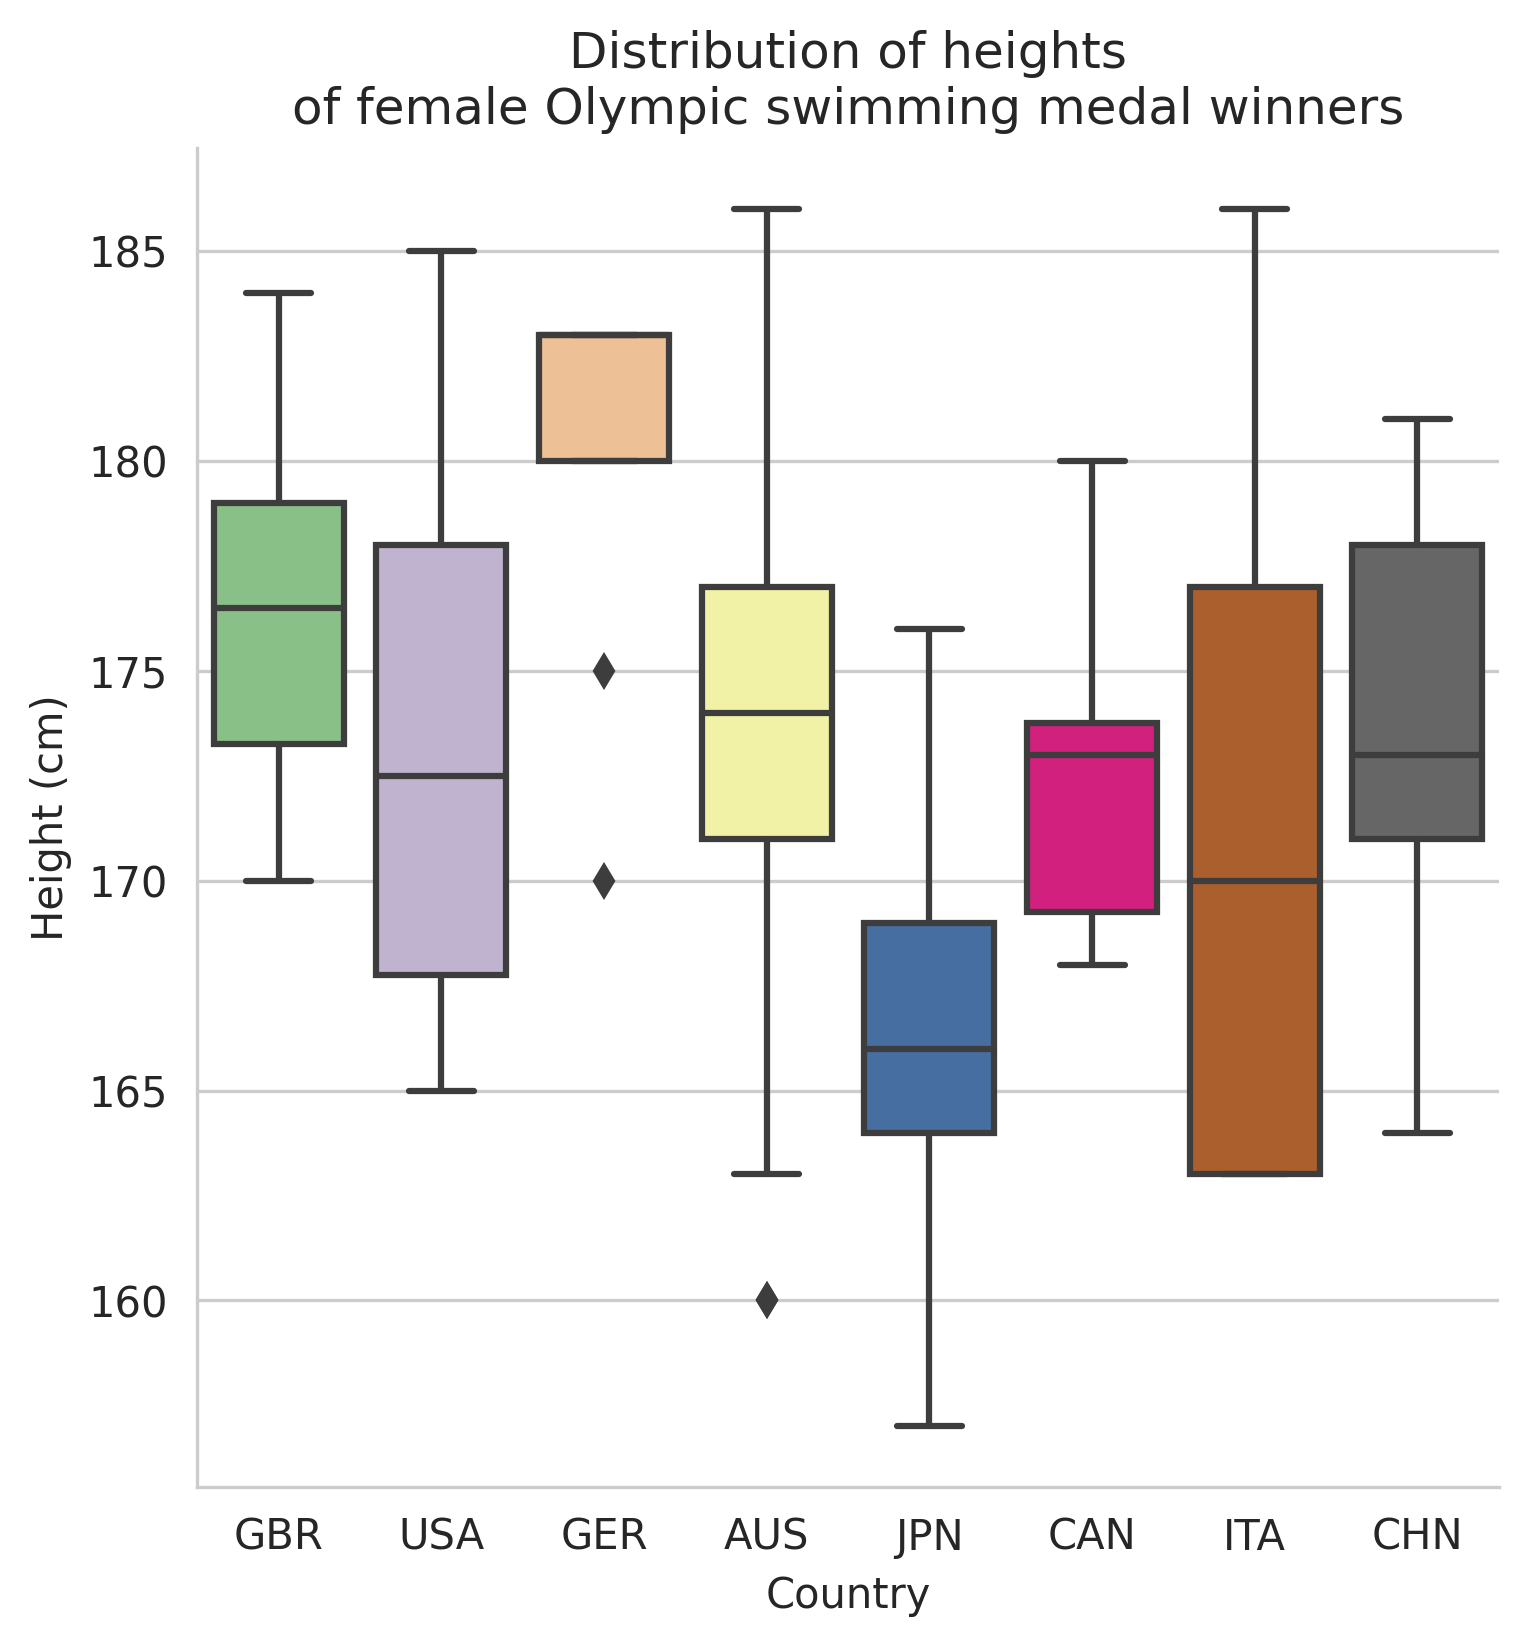

In [52]:
g = sns.catplot(
    data=selected_women, x="Country", y="Height (cm)", palette="Accent", kind="box",
)
plt.title("Distribution of heights\nof female Olympic swimming medal winners")

Then later we draw another chart that uses color to represent a different category:

Text(0.5, 1.0, 'Height vs weight for female Olympic swimmers competing in different strokes')

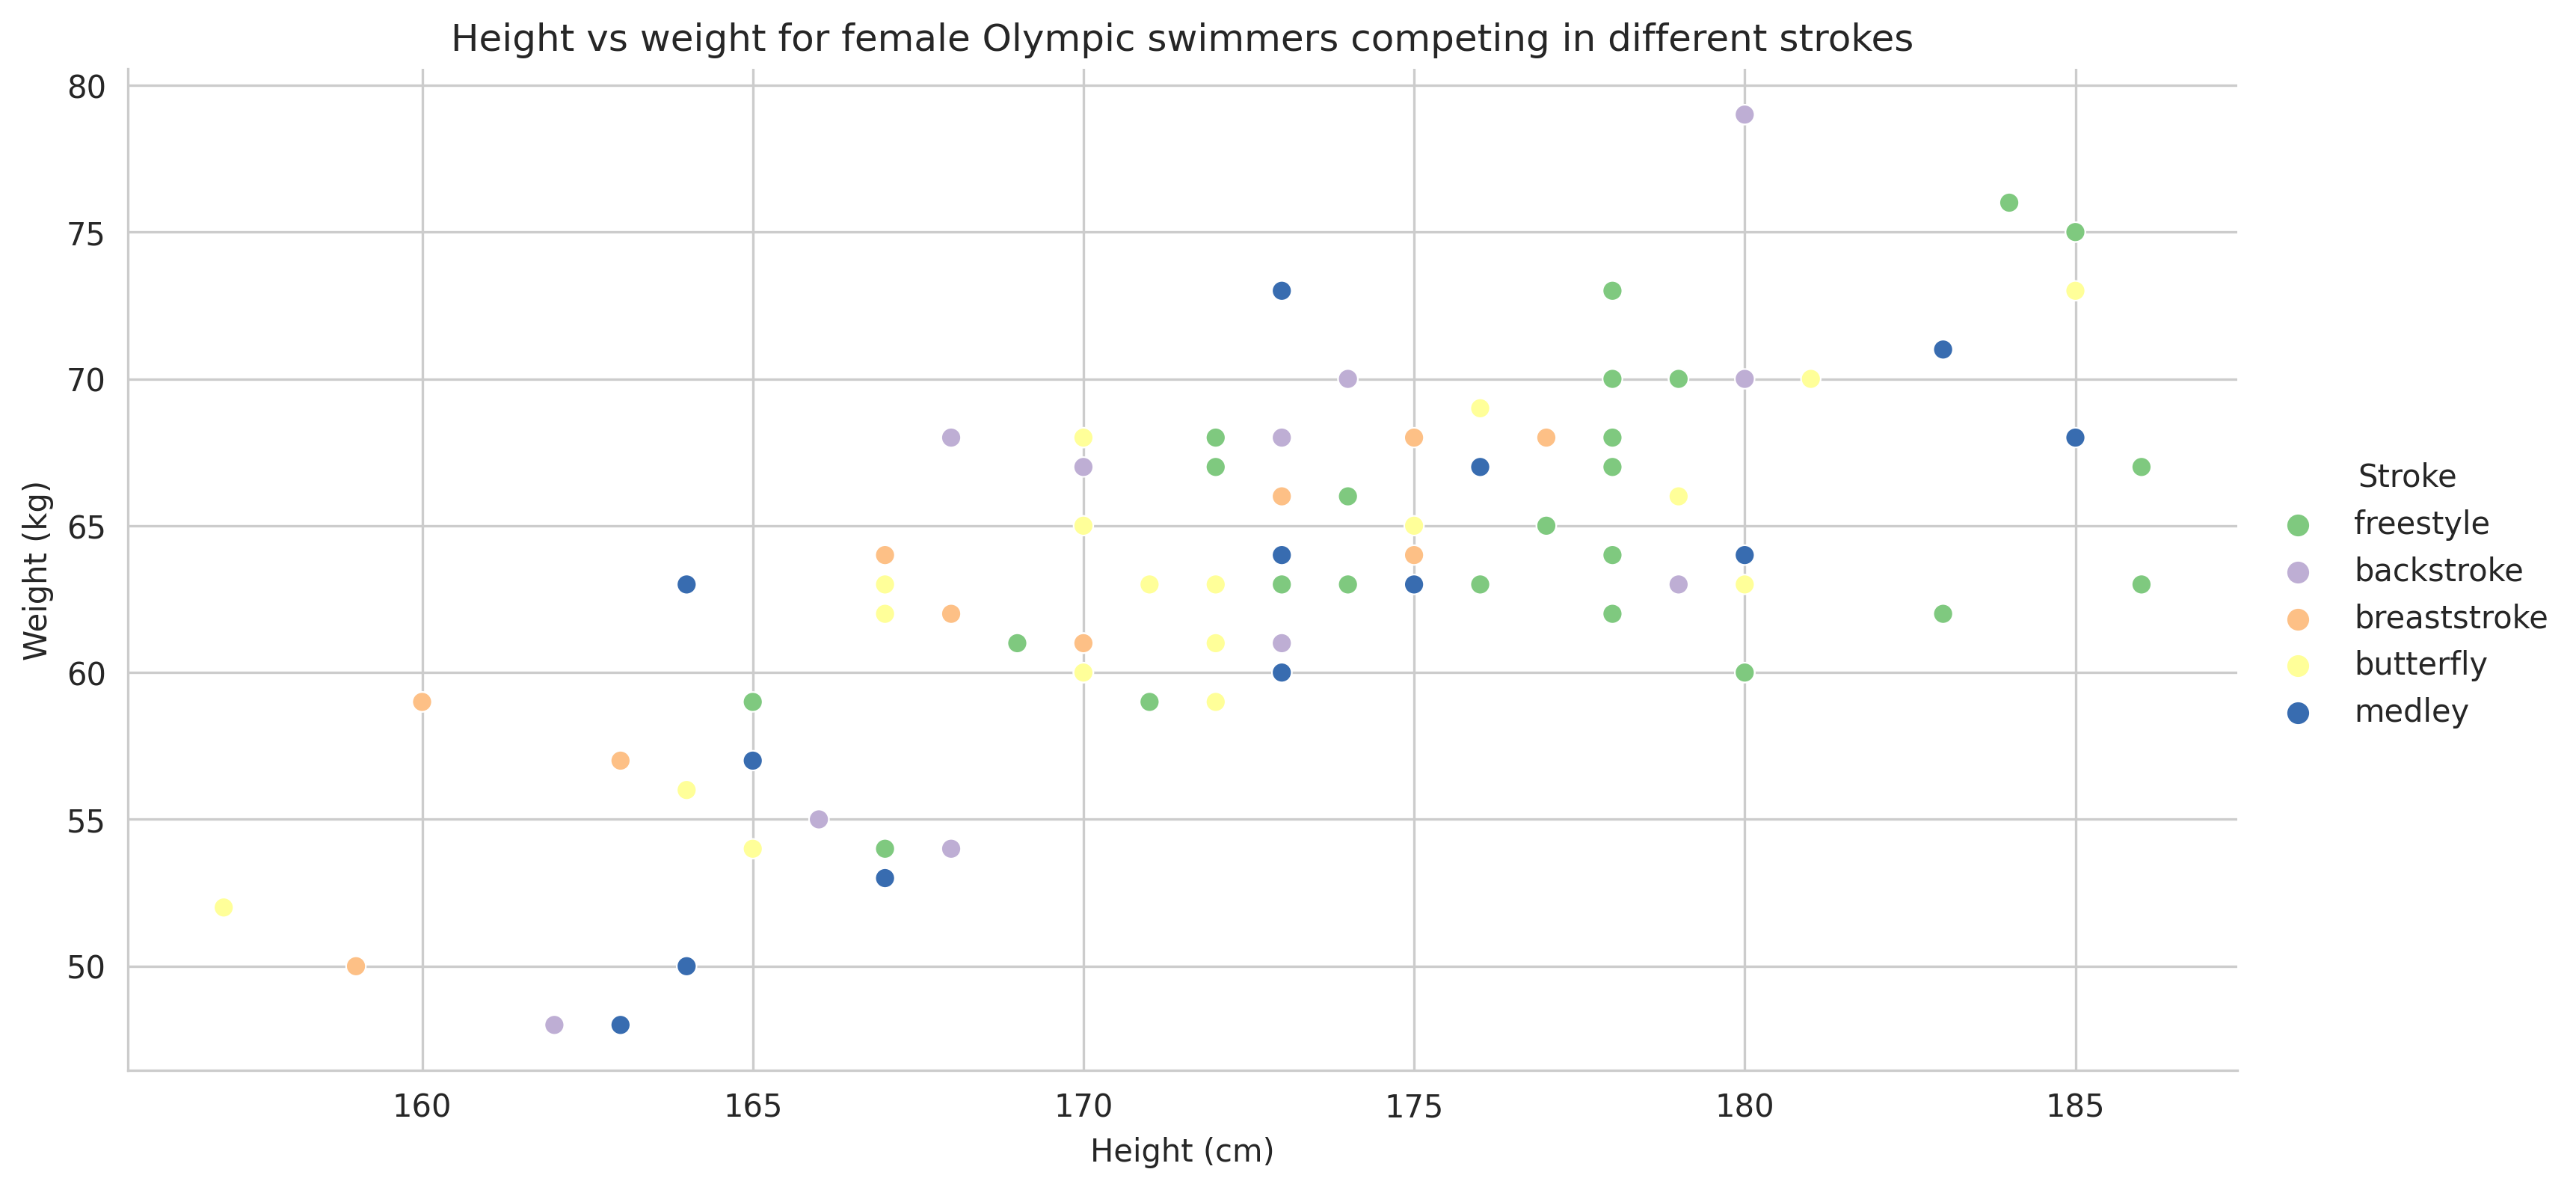

In [53]:
sns.relplot(
    data=selected_women,
    x="Height (cm)",
    y="Weight (kg)",
    hue="Stroke",
    palette="Accent",
    aspect=2,
    s=40,
)
plt.title("Height vs weight for female Olympic swimmers competing in different strokes")

When interpreting these two charts, it's going to be very tempting to assume that the dark blue points in the scatter plot correspond to the dark blue box in the box plot. Of course, this is misleading as the two charts are grouping the athletes in completely different ways. Dark blue in the scatter plot represents medley, whereas dark blue in the box plot represents Japan.

The easiest way to avoid this is to simply use a different palette for one of the charts:

Text(0.5, 1.0, 'Height vs weight for female Olympic swimmers competing in different strokes')

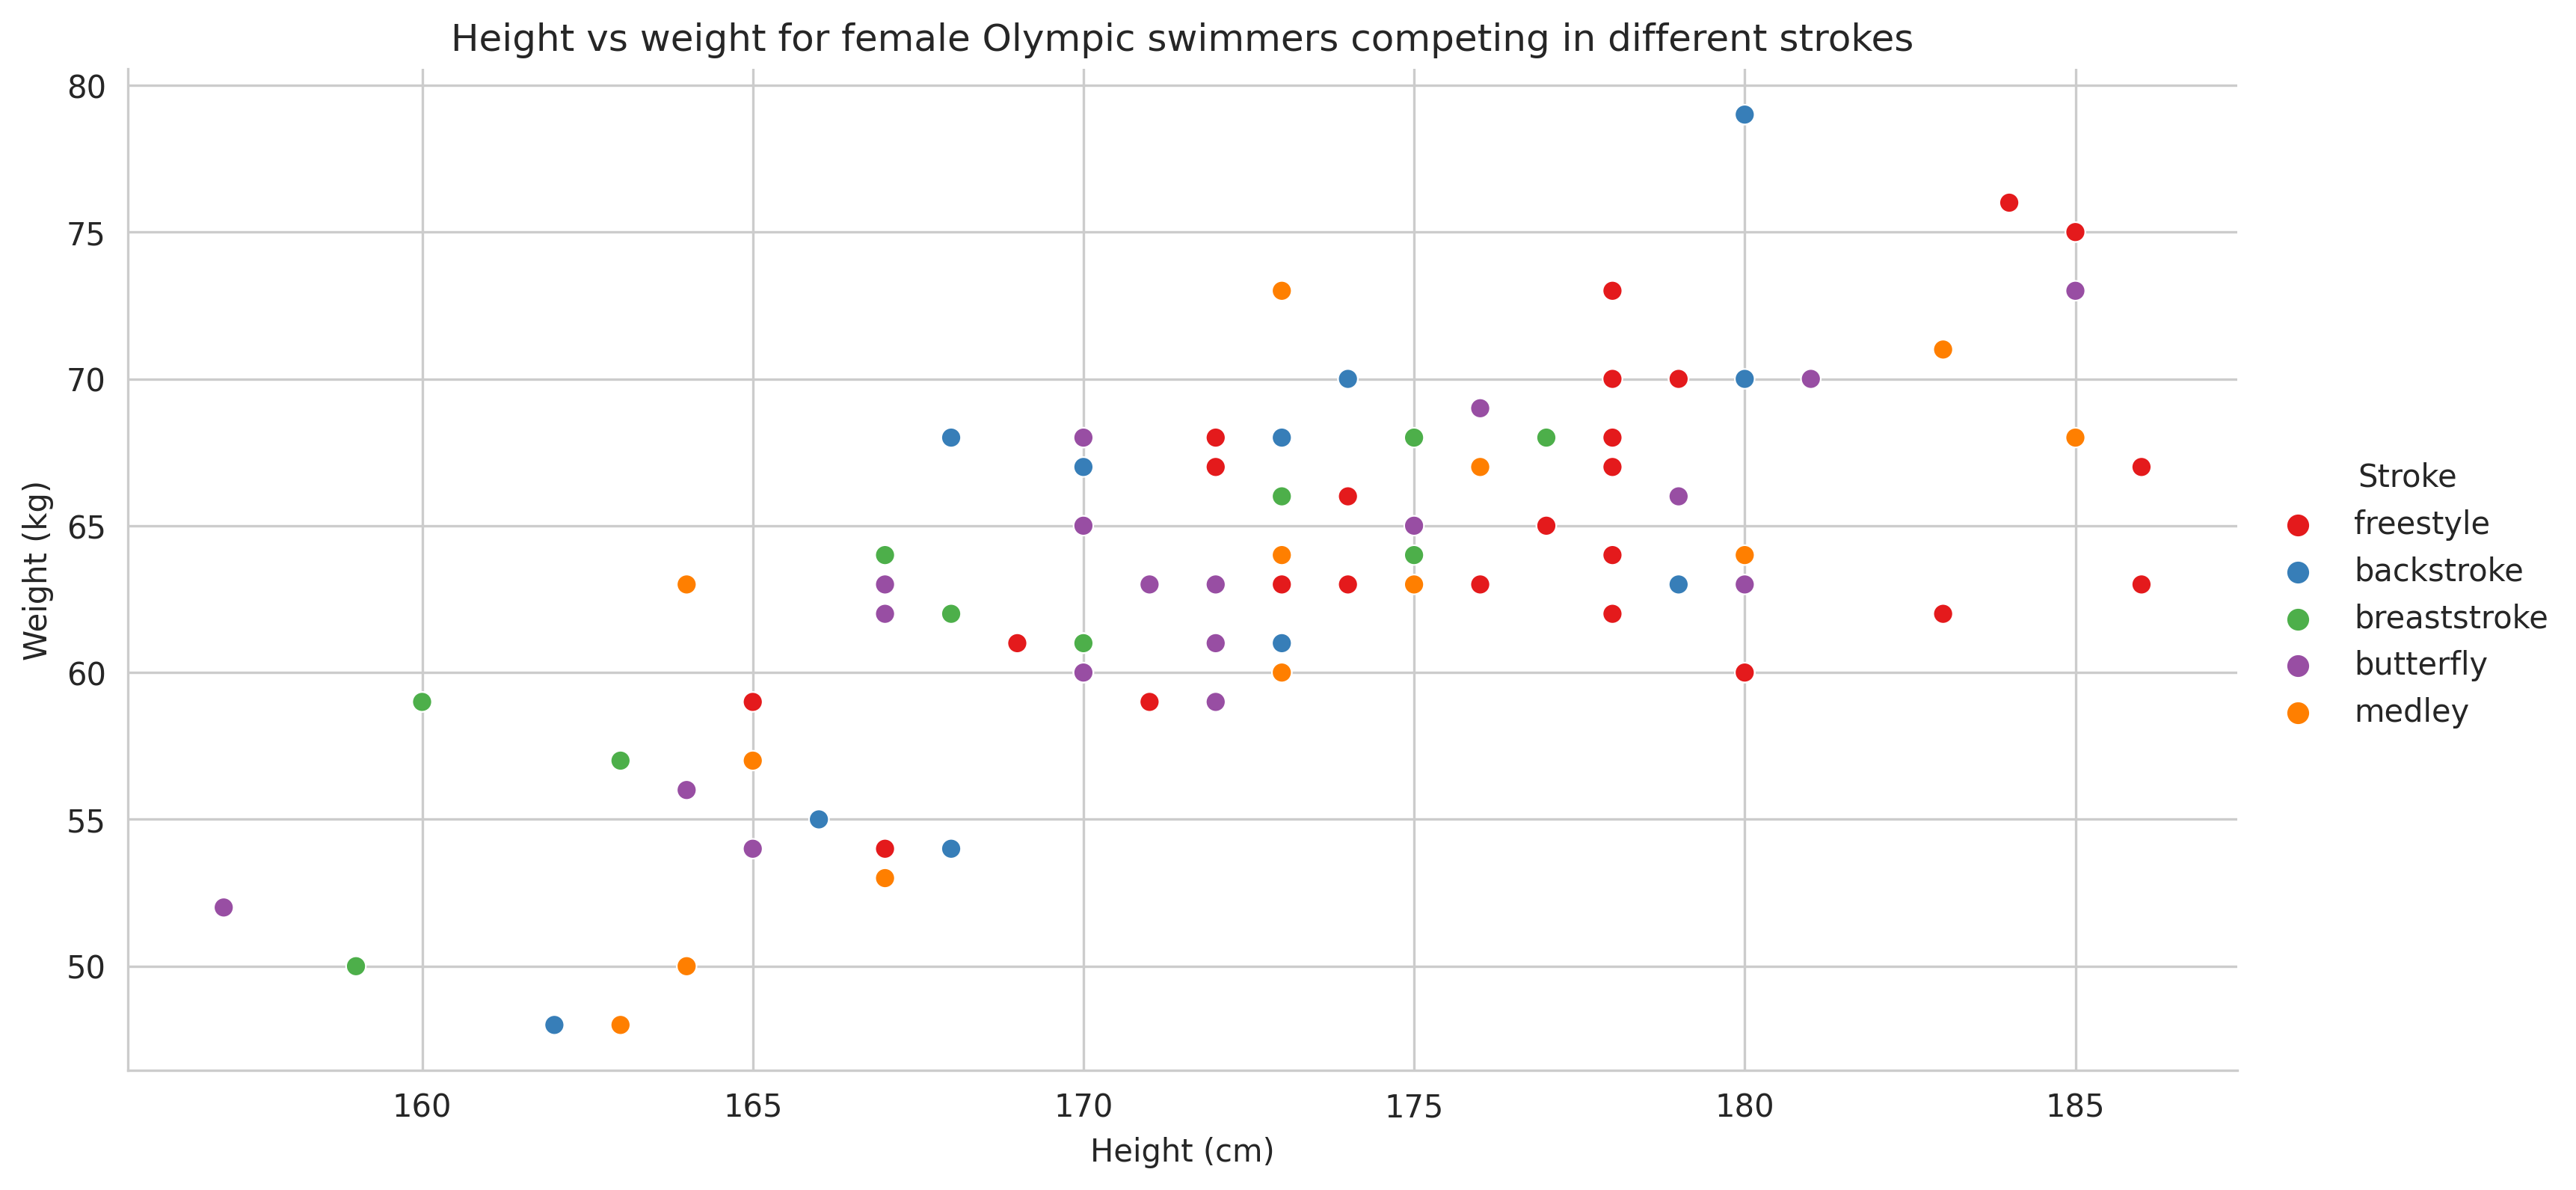

In [54]:
sns.relplot(
    data=selected_women,
    x="Height (cm)",
    y="Weight (kg)",
    hue="Stroke",
    palette="Set1",
    aspect=2,
    s=40,
)
plt.title("Height vs weight for female Olympic swimmers competing in different strokes")

In fact, it's a good idea to get into the habit of always specifying a palette when using `hue`, even if it's just to pick the default (`'Set1'`).